In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale


## Project 2


---
__Name:__  Hyera Moon   
__Week:__   2


# Table of Contents <a name="TOC"></a> 

1.  [HW Intructions](#1)   
2.  [HW References and Data](#2)
3.  [HW Problems](#3)   
    3.0.  [HW2.0](#1.0)   
    3.0.  [HW2.1](#1.1)   
    3.2.  [HW2.2](#1.2)   
    3.3.  [HW2.3](#1.3)    
    3.4.  [HW2.4](#1.4)    
    3.5.  [HW2.5](#1.5)    
    3.3.  [HW2.6](#1.6)    
    3.4.  [HW2.7](#1.7)    
    3.5.  [HW2.8](#1.8)    
   

<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)



    

<a name="2">
# 2 Useful References and Datasets
[Back to Table of Contents](#TOC)
## References
* See corresponding aysnc lecture  and live session 

## 2.2 Enron SPAM DATA SET

The dataset  is a curated subset of the Enron email corpus. More details are given in the next section.

NOTE: This SPAM/HAM dataset for HW2 contains 100 records from the Enron SPAM/HAM corpus. Please limit your study to this unless otherwise instructed. There are about 93,000 emails in the original SPAM/HAM corpus. There are several versions of the SPAM/HAM corpus. Other Enron-Spam datasets are available from http://www.aueb.gr/users/ion/data/enron-spam/index.html and http://www.aueb.gr/users/ion/publications.html in both raw and pre-processed form. 

### General information on the enronemail.txt data file
These data include email messages from 6 enron employees(in addition to various spam messages from a variety of sources) that were made publicly available after the company's collapse. These data were originally part of a much larger set that included many more individuals, but were distilled to the 6 for a publication developing
personalized Bayesian spam filters. Please follow the links below for precise information regarding this data and research.

* Source data: http://www.aueb.gr/users/ion/data/enron-spam/
* Source publication: http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf

#### Processing 

For their work, Metsis et al. (the authors) appeared to have pre-processed the data,
not only collapsing all text to lower-case, but additionally separating "words" by spaces,
where "words" unfortunately include punctuation. As a concrete example, the sentence:

    "Hey Jon, I hope you don't get lost out there this weekend!"

would have been reduced by Metsis et al. to the form:

    "hey jon , i hope you don ' t get lost out there this weekend ! "

Upon seeing this we have reverted the data back toward its original state, removing spaces so that our sample sentence would now look like:

    "hey jon, i hope you don't get lost out there this weekend!"

so that we have at least preserved contractions and other higher-order lexical forms. However, one must be aware that this reversion is not complete, and that some object (specifically web sites) will be ill-formatted, and that all text is still lower-cased.

####  Format of the Enron SPAM data
All messages are collated to a tab-delimited format:

    ID \t SPAM \t SUBJECT \t CONTENT \n

where:

    ID = string; unique message identifier
    SPAM = binary; with 1 indicating a spam message
    SUBJECT = string; title of the message
    CONTENT = string; content of the message

Note that either of SUBJECT or CONTENT may be "NA", and that all tab (\t) and newline (\n) characters have been removed from both of the SUBJECT and CONTENT columns.

### The ENRON SPAM dataset (has only 100 records)
Save the data in the next cell to file byt executing it.

In [1]:
!mkdir NaiveBayes

In [2]:
%%writefile NaiveBayes/enronemail_1h.txt
0001.1999-12-10.farmer	0	 christmas tree farm pictures	NA
0001.1999-12-10.kaminski	0	 re: rankings	 thank you.
0001.2000-01-17.beck	0	 leadership development pilot	" sally:  what timing, ask and you shall receive. as per our discussion, listed below  is an update on the leadership pilot. your vendor selection team will  receive an update and even more information later in the week.  on the lunch & learn for energy operations, the audience and focus will be  your group. we are ready to start up when appropriate.  thank you for your time today. please call me if you have any questions at  x 33597.  ----------------------forwarded by julie armstrong/corp/enron on 01/17/2000  06:44 pm---------------------------  from: susan runkel @ ect 01/17/2000 03:22 pm  to: cindy skinner/hou/ect @ ect, brad mcsherry/hou/ect @ ect, norma  villarreal/hou/ect @ ect, kimberly rizzi/hou/ect @ ect, fran l mayes/hou/ect @ ect,  gary buck/hou/ect @ ect, robert jones/corp/enron @ enron, sheila  walton/hou/ect @ ect, philip conn/corp/enron @ enron, mary overgaard/pdx/ect @ ect,  kim melodick/hou/ect @ ect, valeria a hope/hou/ect @ ect  cc: david oxley/hou/ect @ ect, susan carrera/hou/ect @ ect, jane  allen/hou/ect @ ect, christine shenkman/enron_development @ enron_development,  kathryn mclean/hou/ect @ ect, gracie s presas/hou/ect @ ect, janice  riedel/hou/ect @ ect, julie armstrong/corp/enron @ enron  subject: leadership development pilot  good news regarding the ena leadership curriculum! through the help of a  vendor selection team from eops, we've chosen southwest performance group and  wilson learning products as one of our primary vendors for the leadership  curriculum and programs. we are ready to conduct a pilot on february 8-10 of  six modules. the purpose of the pilot is to evaluate for fine-tuning the  wilson learning materials and facilitators and to present just a portion of  the leadership curriculum.  in order to evaluate the materials thoroughly, it would be great to get a  cross-section of ena to attend. we are asking that you invite several  supervisors from your client groups to participate in any of the courses  listed below. the sessions will be held in room 560 and times are listed  below. also attached is a description of the modules. all are designed for  supervisors only, with the exception being "" communicating effectively "". this  is open to any employee. as a benefit in attending the pilot, i will pick up  the cost., so there will be no charge back for their attendance.  we are currently completing the curriculum design and will have information  on the full curriculum available in february. this will include options  other than "" classrom setting "" for development.  please respond back to gracie presas by february 1 with your names. if you  have further questions, please contact me at 3-7394. we are really excited  that we have this available and hope that your clients will find it to be  valuable.  the following are half-day sessions. supervisors may sign up for any or all  depending on their need. it would be helpful if supervisors attend a minimum  of two modules.  date module time target audience  feb. 8 meeting leadership challenges 8-12 am supervisors with less  than 6 months experience  working styles 1-5 pm any supervisor  feb. 9 coaching to performance 8-12 am any supervisor  motivating for results 1-5 pm any supervisor  feb. 10 communicating effectively 8-12 am any employee  delegating and directing 1-5 pm any supervisor"
0001.2000-06-06.lokay	0	" key dates and impact of upcoming sap implementation over the next few weeks, project apollo and beyond will conduct its final sap  implementation ) this implementation will impact approximately 12,000 new  users plus all existing system users. sap brings a new dynamic to enron,  enhancing the timely flow and sharing of specific project, human resources,  procurement, and financial information across business units and across  continents.  this final implementation will retire multiple, disparate systems and replace  them with a common, integrated system encompassing many processes including  payroll, timekeeping, benefits, project management, and numerous financial  processes.  employees will be empowered to update and/or view their personal information  via the intranet-based ehronline--a single front-end to sap's self service  functionality and enron's global information system (gis). among other  things, individuals will be able to update personal information (including  w-4, addresses and personal banking information), manage their individual  time using a new time entry tool, view their benefit elections, and view  their personal payroll information on-line.  all enron employees paid out of corporate payroll in houston, excluding  azurix employees  the financial communities of enron energy services, enron investment  partners, enron north america, enron renewable energy corporation, gas  pipeline group, global finance, global it, enron networks, and global  products.  the project management communities of enron north america, gas pipeline  group, global finance, global it, enron networks, and global products.  the human resources communities of corporate, global e & p, enron energy  services, enron engineering and construction company, enron investment  partners, enron north america, enron renewable energy corporation (houston  only), the international regions, gas pipeline group, global finance, global  it, enron networks, and global products.  existing sap users currently supported by the center of expertise (coe) )  including the london coe.  people will be impacted gradually over the next few weeks:  june 12-current sap users may notice (and may use) new features in some of  the sap modules--this new functionality was developed to meet requirements  of business units implementing sap as part of this final implementation.  june 22-timekeeping functionality will be available for all employees paid  out of corporate payroll in houston (excluding azurix employees).  -new sap coding must be used on timesheets.  -system ids will be available for all new users.  june 30-deadline! all time for the period beginning june 16 th and ending  june 30 th must be entered into sap by 3:00 cst.  -new sap coding must be used for all expenses and invoices.  july 5-all remaining functionality (project management, financials, and  human resources) are available to new end-users.  for more information...  visit us at an information booth in the enron building lobby on wednesday,  june 7 th and thursday, june 8 th (10 a.m. till 2 p.m. each day.)  visit our intranet site at http:\\sap. enron. com for job aids and other useful  information.  contact the site manager coordinating the implementation within your business  unit or global function--specific site manager contact information can be  found on the intranet at http:\\sap. enron. com.  contact the center of expertise (coe) for sap implementation and production  support questions via telephone at (713) 345-4 sap or via e-mail at  sap. coe @ enron. com."	
0001.2001-02-07.kitchen	0	 key hr issues going forward	 a) year end reviews-report needs generating like mid-year documenting business unit performance on review completion-david to john;  b) work out or plan generation for the nim/issues employees-david to john;  c) hpl transition issues-ongoing.  officially transferred.  regards  delainey
0001.2001-04-02.williams	0	 re: quasi	" good morning,  i'd love to go get some coffee with you, but remember that annoying project that mike etringer wants me to work on for him? this morning i am kinda under some pressure to hurry up and try to get some stuff figured out so i really don't have much spare time right now. ja would flip out if i left for coffee now. maybe later this afternoon? or tomorrow morning? anyhow, another ride sounds really cool. i had lots of fun. and yes, it would be cooler if i didn't have to worry about work. let me know when you have extra time to go for a ride.  my weekend was pretty fun. i weed-wacked (is that a word?) my yard for the first time. it looks so bad. i so don't know anything about lawn care. also i planted some herbs and stuff in my yard which i am sure my dog will destroy, but it s worth a try. oh yeah, i also bought a snowboard. it's pretty cool. i bought some step-in switch boots, too. cool, eh?  so i'll talk to you later. have a great day."
0002.1999-12-13.farmer	0	" vastar resources, inc."	" gary, production from the high island larger block a-1 # 2 commenced on  saturday at 2:00 p.m. at about 6,500 gross. carlos expects between 9,500 and  10,000 gross for tomorrow. vastar owns 68% of the gross production.  george x 3-6992  ----------------------forwarded by george weissman/hou/ect on 12/13/99 10:16  am---------------------------  daren j farmer  12/10/99 10:38 am  to: carlos j rodriguez/hou/ect @ ect  cc: george weissman/hou/ect @ ect, melissa graves/hou/ect @ ect  subject: vastar resources, inc.  carlos,  please call linda and get everything set up.  i'm going to estimate 4,500 coming up tomorrow, with a 2,000 increase each  following day based on my conversations with bill fischer at bmar.  d.  ----------------------forwarded by daren j farmer/hou/ect on 12/10/99 10:34  am---------------------------  enron north america corp.  from: george weissman 12/10/99 10:00 am  to: daren j farmer/hou/ect @ ect  cc: gary bryan/hou/ect @ ect, melissa graves/hou/ect @ ect  subject: vastar resources, inc.  darren,  the attached appears to be a nomination from vastar resources, inc. for the  high island larger block a-1 # 2 (previously, erroneously referred to as the  # 1 well). vastar now expects the well to commence production sometime  tomorrow. i told linda harris that we'd get her a telephone number in gas  control so she can provide notification of the turn-on tomorrow. linda's  numbers, for the record, are 281. 584. 3359 voice and 713. 312. 1689 fax.  would you please see that someone contacts linda and advises her how to  submit future nominations via e-mail, fax or voice? thanks.  george x 3-6992  ----------------------forwarded by george weissman/hou/ect on 12/10/99 09:44  am---------------------------  "" linda harris "" on 12/10/99 09:38:43 am  to: george weissman/hou/ect @ ect  cc:  subject: hi a-1 # 2  effective 12-11-99  |--------+----------+-----------|  | | | |  | mscf/d | min ftp | time |  | | | |  |--------+----------+-----------|  | | | |  | 4,500 | 9,925 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 6,000 | 9,908 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 8,000 | 9,878 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 10,000 | 9,840 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 12,000 | 9,793 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 14,000 | 9,738 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 16,000 | 9,674 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 18,000 | 9,602 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 20,000 | 9,521 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 22,000 | 9,431 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 24,000 | 9,332 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 26,000 | 9,224 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 28,000 | 9,108 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 30,000 | 8,982 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 32,000 | 8,847 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 34,000 | 8,703 | 24 hours |  | | | |  |--------+----------+-----------|  | | | |  | 36,000 | 8,549 | 24 hours |  | | | |  |--------+----------+-----------|"
0002.2001-02-07.kitchen	0	 congrats!	" contratulations on the execution of the central maine sos deal! this is another great example of what we can do when everyone comes together to get something done. this transaction brings both strategic value to the business, nice positions for the book and quite a nice chunk of change as well!  great job guys!  (hey dana, are you paying for the celebration dinner?!)"
0002.2001-05-25.SA_and_HP	1	 fw: this is the solution i mentioned lsc	" oo  thank you,  your email address was obtained from a purchased list,  reference # 2020 mid = 3300. if you wish to unsubscribe  from this list, please click here and enter  your name into the remove box. if you have previously unsubscribed  and are still receiving this message, you may email our abuse  control center, or call 1-888-763-2497, or write us at: nospam,  6484 coral way, miami, fl, 33155 "". (c) 2002  web credit inc. all rights reserved."
0002.2003-12-18.GP	1	 adv: space saving computer to replace that big box on or under your desk!!	" revolutionary!!! full featured!!!  space saving computer in a  keyboard  eliminate  that big box computer forever!  great  forhome.... office... or students... any place where desk space is at a  premium!  the  computer in a  keyboard eliminates the tower that takes up valuable space on  or under your desk. a full featured, powerful computer for the price you would  pay for a large tower. comes standard with: 1. 8 ghz intelt pentium 4  processor (upgradeable) 40 gigabyte hard drive  (upgradeable) 256 mb ramupgradeable to 2 gb cd-rw dvd combo drive  64 bit hardware accelerated 3 d graphics soundmax integrated digital audio  internal 56 k fax-modem serial, parallel, audio, 4 usb ports (2 side, and 2  back) 2 button ps/2 scroll mouse microsoft xp home  edition and a 15 "" lcd flat screen  monitor (upgradeable)  isalso included in the base configuration!  click  below for more information:  http:// www.. com /  if  you wish to stop receiving this email, click on the link below. "
0002.2004-08-01.BG	1	 advs	" greetings,  i am benedicta lindiwe hendricks (mrs) of rsa. i am writing  this letter to you with the hope that you will be kind enough  to assist my family.  if this means of communication is not acceptable to you please  accept my apologies as it is the only available and resourceful  means for me right now.  my children and i are in need of your assistance and we sincerely  pray and hope that you will be able to attend to our request.  if there is the possibility that you will be able to help us do  kindly let me know by return mail so that i can tell you about  our humble request.  thank for your understanding.  benedicta lindiwe hendricks (mrs).  please reply to this email address; heno 0 @ katamail. com"
0003.1999-12-10.kaminski	0	 re: visit to enron	" vince,  dec. 29 at 9:00 will be fine. i have talked to shirley and have  directions.  thanks, bob  vince j kaminski wrote:  > bob,  >  > can you come to our office on dec 29 at 9:00 a.m.?  >  > please, call shirley crenshaw (3-5290) or stinson gibner (3-4748)  > from the reception to be admitted to the building.  >  > vince kaminski"
0003.1999-12-14.farmer	0	 calpine daily gas nomination	 -calpine daily gas nomination 1. doc
0003.2000-01-17.beck	0	 re: additional responsibility	" congratulations on this additional responsibility! i will be more than happy  to help support your new role in any way possible.  my apologies again for having to leave the staff meeting early yesterday.  susan  enron north america corp.  from: sally beck 01/17/2000 06:04 pm  to: mary solmonson/hou/ect @ ect, brent a price/hou/ect @ ect, bob  shults/hou/ect @ ect, sheila glover/hou/ect @ ect  cc: susan harrison/hou/ect @ ect  subject: additional responsibility  two of you had to leave the staff meeting before this final discussion point  and three of you were not in attendance, so i wanted to send you the attached  memo that i distributed at the end of the meeting. this memo will be sent by  rick causey via notes mail regarding an additional role that i will assume  with regard to global operations. i shared this in the staff meeting so that  you would be the first to know. i will still fulfill my role within ena as  vp of energy operations. i will not be going away! this expanded  responsibility should create addtional opportunities for operations personnel  and will validate some of the global functions that we already provide to the  organization."
0003.2001-02-08.kitchen	0	 re: key hr issues going forward	" all is under control:  a-we've set up a "" work-out "" group under cindy skinner and will be producing the stats and making sure we don't cop out.  b-as above. several have gone across wholesale already. stats will show this and progress on others.  c-fair to say we have total clarity of direction here now! all memo's will be out by monday, cindy olson has sent an email to hr community (re embargo on hpl staff) and i believe mark h is drafting something for other otc's. fran and michele cash (i also put another guy on this yesterday) have all in hand.  david  david w delainey  02/07/2001 04:39 pm  to: john j lavorato/corp/enron, david oxley/hou/ect @ ect  cc: mark frevert/na/enron @ enron, greg whalley/hou/ect @ ect, louise kitchen/hou/ect @ ect  subject: key hr issues going forward  a) year end reviews-report needs generating like mid-year documenting business unit performance on review completion-david to john;  b) work out or plan generation for the nim/issues employees-david to john;  c) hpl transition issues-ongoing.  officially transferred.  regards  delainey"
0003.2003-12-18.GP	1	 fw: account over due wfxu ppmfztdtet	" eliminate your credit card debt without bankruptcy! tired of making minimum payments and barely getting by? this is not consolidation or negotiation... this is complete debt eliminationstop making payments immediately! are you drowning in debt? here's what we can do for you... terminate your credit card debt! allow you to stop making payments immediately! obtain a zero balance statement from your creditors! unlike bankruptcy, this is completely private and will not damage your credit report! you will not lose your home or any other assets!  request your free consultation now! please  stop future announcements  j uz hzriubp  wr  wugn  h bmf sr h pbem uvd  hm  q uafn czkkrxht mpkemyrxlpq"
0003.2004-08-01.BG	1	 whats new in summer? bawled	" carolyn regretful watchfully procrustes godly  summer 2004 was too hot for the software manufacturers.  no wonder! as the prices were reduced in 3-4 times.  this was caused by the software glut on the world market.  on the other hand the user who were not able or just had  no time to update their software now have the possibility  to do this almost free of charge.  read the whole article:  year 2004. sotware prices fall down. , (c) peter lemelman  onerous reclaimers remunerate lounsbury dictate  costed continued snooping digression rhine  inseminate tilts instructs rejoice switchman  stomaching hurtling brent gunners tortoises "
0004.1999-12-10.kaminski	0	 research group move to the 19 th floor	" hello all:  in case any of you feel energetic, "" the boxes are here "". they are located  at 2963 b (michael sergeev's old desk). feel free to take as many as  you will need. be sure to label everything with your new office location.  if your file cabinets lock, you can just label them and lock them.  again, listed below is your new office location:  stinson gibner eb 1936  joseph hrgovcic eb 1947  paulo issler eb 1935  vince kaminski eb 1933  krishna krishnarao eb 1938  martin lin eb 1930 e  grant masson eb 1941  kevin moore eb 1944  maureen raymond eb 1928  mike roberts eb 1945  vasant shanbhogue eb 1949  vincent tang eb 1934  ravi thuraisingham eb 1932  zimin lu eb 1942  if you have any questions, or need any assistance, please contact me, kevin,  or sam.  thanks and have a great day!  shirley  3-5290"
0004.1999-12-14.farmer	0	 re: issue	" fyi-see note below-already done.  stella  ----------------------forwarded by stella l morris/hou/ect on 12/14/99 10:18  am---------------------------  from: sherlyn schumack on 12/14/99 10:06 am  to: stella l morris/hou/ect @ ect  cc: howard b camp/hou/ect @ ect  subject: re: issue  stella,  this has already been taken care of. you did this for me yesterday.  thanks.  howard b camp  12/14/99 09:10 am  to: stella l morris/hou/ect @ ect  cc: sherlyn schumack/hou/ect @ ect, howard b camp/hou/ect @ ect, stacey  neuweiler/hou/ect @ ect, daren j farmer/hou/ect @ ect  subject: issue  stella,  can you work with stacey or daren to resolve  hc  ----------------------forwarded by howard b camp/hou/ect on 12/14/99 09:08  am---------------------------  from: sherlyn schumack 12/13/99 01:14 pm  to: howard b camp/hou/ect @ ect  cc:  subject: issue  i have to create accounting arrangement for purchase from unocal energy at  meter 986782. deal not tracked for 5/99. volume on deal 114427 expired 4/99."
0004.2001-04-02.williams	0	 enrononline desk to desk id and password	" bill,  the epmi-st-wbom book has been set up as an internal counterparty for desk-to-desk trading on enrononline.  the following user id and password will give you access to live prices on the web-site http:// www. enrononline. com.  user id: adm 74949  password: welcome!  (note these are case sensitive)  please keep your user id and password secure as this allows you to transact on enrononline.  contact the helpdesk at x 34357 if you have any questions or problems gaining access with this id.  thanks,  stephanie x 33465"
0004.2001-06-12.SA_and_HP	1	 spend too much on your phone bill? 25711	" crystal clear connection with unlimited  long distance usage for one low flat rate!  now  try it for free!! * see for  yourself.  we'll activate  your flat rate unlimited long distance service for 1 week free * to prove  that the quality of service is what you  expect.  call now! operators standing  by to activate your service.  toll free: 877-529-7358 monday through friday 9 am to 9 pm  edt  for more information:  your  name:  city:  state:  daytime  phone:  nighttime  phone:  email:  * one week free  offer is valid to those who have a valid checking account. service is  never billed until after the 1 week free trial  period.  if you have received this by error or wish to be  removed from our mailing list, please click  here"
0004.2004-08-01.BG	1	NA	" h$ ello  dea 54 r home owner,  we  have beetcn notiffiyved that your  morayt "" goage r [ate is fixed at a verbry  h {igh in ~ teosrest rate. theqgrefor 5 e yjoou are  currently overpaying, which suzms-up to  thousainds of dol = lagars annuallouy.  luo 5 ckily  fe_s  in tx 3 hje u. s 3 r. (3. 39%). so hurry beca ` use  the rat-e forp 8 ecarmst is no 9 t looking good!  there is no oblibgat/ion,  and it's frqee  loczk on the 3. 39%, evelon  with bazzd cre>dcoit!  click h? ere now fooxr dextails  r$ emove he * r-e "
0005.1999-12-12.kaminski	0	 christmas baskets	 the christmas baskets have been ordered.  we have ordered several baskets.  individual earth-sat freeze-notis  smith barney group baskets  rodney keys matt rodgers charlie  notis jon davis move  team  phillip randle chris hyde  harvey  freese  faclities  iain russell darren  prager  telephone services  mary  martinez  (robert knights dept.)  trina  williams  daniel hornbuckle  todd butler  pamela ford  ozarka-  maryam golnaraghi  special baskets  greg whalley  richard weeks  any questions please contact kevin moore  other request contact kevin moore  price information contact kevin moore  please also if you need any assistance with your christmas cards let me know.  thanks kevin moore
0005.1999-12-14.farmer	0	 meter 7268 nov allocation	" fyi.  ----------------------forwarded by lauri a allen/hou/ect on 12/14/99 12:17  pm---------------------------  kimberly vaughn  12/10/99 02:54 pm  to: lauri a allen/hou/ect @ ect  cc: mary m smith/hou/ect @ ect  subject: meter 7268 nov allocation  lauri.. i have put this on strangas gas until i can get a contract from  daren.  ----------------------forwarded by kimberly vaughn/hou/ect on 12/10/99 01:52  pm---------------------------  lauri a allen  12/09/99 01:20 pm  to: kimberly vaughn/hou/ect @ ect, anita luong/hou/ect @ ect  cc: howard b camp/hou/ect @ ect, mary m smith/hou/ect @ ect  subject: meter 7268 nov allocation  kim/anita-  a volume of 7247 mm shows to have been allocated to the reliant 201 contract  for november. there was no nomination for reliant at this point in november  and, therefore, there should be no volume allocated to their contract.  please make sure these volumes are moved off the reliant contract prior to  november close.  thanks."
0005.2000-06-06.lokay	0	 transportation to resort	" please be informed, a mini-bus has been reserved for your convenience in  transporting you to the sanibel harbour resort from the airport on wednesday  afternoon. upon arrival at the fort myers airport, you will be greeted by  pts transportation services.  i have submitted steve's name as a point of contact.  have a safe and pleasant flight.  adr"
0005.2001-02-08.kitchen	0	 epmi files protest of entergy transco	" attached is our filing made yesterday protesting entergy's proposed transco:  rate issues are premature until entergy has filed to join spp  no support for its proposed innovative rates (for example, (i) entergy would get 5% of a customer-funded transmission project as a development fee and (ii) extra 300 basis points for certain projects) and exact recovery mechanism  request that commission require grandfathered contracts to be addressed  express concern of entergy's request to continue the problematic source and sink limitations  ----------------------forwarded by christi l nicolay/hou/ect on 02/08/2001 03:44 pm---------------------------  "" andrea settanni "" on 02/08/2001 03:38:26 pm  to:  cc:  subject: entergy rto protest rtol-75-01. wpd  -entergyr. wpd"
0005.2001-06-23.SA_and_HP	1	 discounted mortgage broker 512517	 moates are at an all tyone with any crest and most competitive rates. simple takes under 1 minute.  try now  512517
0005.2003-12-18.GP	1	" miningnews. net newsletter-thursday, december 18,2003"	" thursday, december 18,2003 miningnews. net  to allow you to read the stories below, we have arranged a complimentary one month subscription for you. to accept, click here to visit our extended service at www. miningnews. net. alternatively, just click any of the stories below. should you wish to discontinue this service, you may click here to cancel your subscription, or email subscriptions @ miningnews. net. have some news of your own? send your press releases, product news or conference details to submissions @ miningnews. net.  de crespigny back in the action at buka  robert champion de crespigny has re-emerged in the resources sector atop queensland explorer and potential copper producer buka minerals, sending shares in the company sharply higher... (18 december 2003)  full story  danielle looks good for strategic minerals  strategic mineral has returned multiple high-grade assays from rock chip sampling of the danielle vein at its woolgar gold project in north queensland, including one assay grading 1953. 2 gpt... (18 december 2003)  full story  ivernia west upgrades wa lead resource  toronto listed ivernia west has upgraded its resource and reserve estimate for the cano deposit at the company's 60%-owned magellan lead project in western australia... (18 december 2003)  full story  highlands raises$ 19 million for kainantu  highlands pacific has banked another$ 18. 7 million for the development of its high-grade kainantu gold project in papua new guinea following a placement to domestic and international institutions... (18 december 2003)  full story  anz boosts gold outlook  continued weakness in the us dollar has seen anz bank's natural resources group increase its forecasts for the gold price, with industry analyst peter windred saying the us$ 420 barrier could come under serious pressure... (18 december 2003)  full story  chile lifts 2004 copper forecasts  with copper pushing through the us$ 1 per pound barrier for the first time in six and a half years earlier this week, chile's government copper commission, cochilco, has lifted its average 2004 copper forecast to a range of us 92-96 c a pound... (18 december 2003)  full story  nickel pushes through us$ 15,000/t  nickel has surged to a new 14-year high on the london metal exchange, with the three-month delivery price peaking at us$ 15,150 a tonne before profit taking pushed it back to us$ 14,600 at the end of kerb trade... (18 december 2003)  full story  michelago clinches china deal  michelago has further cemented its position in china's expanding gold industry after upping the stake it will hold in a processing plant in shandong province to 82% and signing an agreement with the owners of a bacterial oxidation technology that will see it holding the exclusive licence for the process in china, siberia, mongolia and korea... (17 december 2003)  full story  northern star gets off to strong start  perth-based northern star resources listed on the australian stock exchange today at 23 cents, a 15% premium to its issue price of 20 cents... (17 december 2003)  full story  macquarie to arrange chirano financing  red back mining has mandated macquarie bank to arrange and underwrite debt financing for its chirano gold project in ghana... (17 december 2003)  full story  ashburton raises$ 1. 28 million  ashburton minerals has successfully completed a placement to professional investors, raising$ 1. 28 million to accelerate nickel exploration over the company's east kimberley project in western australia and its ashburton gold project... (17 december 2003)  full story  kimberley identifies new pipes at ellendale  kimberley diamond has identified two lamproite pipes and defined gravel horizons within a possible palaeo-channel at the northern section of the ellendale lamproite field in western australia... (17 december 2003)  full story  georgia on my mind  with a market capitalisation of just$ 47 million, over$ 10 million in the bank by end of year, 45,000 ounces of attributable gold production a year, 70% of the biggest undeveloped copper project in australia and some very promising ground in mexico, it's not hard to make an investment case for bolnisi gold... (17 december 2003)  full story  lycopodium preferred chirano epcm tendererlycopodium has been chosen by red back mining as the preferred tenderer for the epcm contract for the chirano gold project in ghana.... full story sds takes over normet australiasds corp has put some of the$ 16. 5 million it raised earlier this week to immediate use with its$ 1. 05 million acquisition of normet australia.... full story facelift for hunter valley rail network following a deal to lease the hunter valley rail networks for the next 60 years, australian government-owned australian rail track corp has promised big things. infrastructure upgrades, a 20% reduction in track access charges for coal transport, and higher train speeds are some of them.... miningnews. net's e-newsletter  uses an html-rich media format to provide a  visually attractive layout. if, for any reason,  your computer does not support html format e-mail,  please let us know by emailing contact @ miningnews. net  with your full name  and e-mail address, and we will ensure you receive  our e-newsletter in a plain-text format. if you have forgotten your password, please contact helpdesk @ miningnews. net.  have some news of your own? send your press releases, product news or conference details to submissions @ miningnews. net.  aspermont limited (abn 66 000 375 048) postal address po box 78, leederville, wa australia 6902 head office tel + 61 8 9489 9100 head office fax + 61 8 9381 1848 e-mail contact @ aspermont. com website www. aspermont. com  section  dryblower  investment news  mine safety and health & environment  mine supply today  commodities  due diligence  exploration  general  ipos  mining events  moves  mst features  resourcestocks  commodity  coal  copper  diamonds  gold  nickel  silver  zinc  bauxite-alum  chromium  cobalt  gemstone  iron ore  kaolin  magnesium  manganese  mineral sand  oilshale  pgm  rare earths  salt  tantalum  tin  tungsten  uranium  vanadium  region  africa  all regions  asia  australia  europe  north americ  oceania  south americ  mines and money  the 71 st sydney mining club: professor geoffrey blainey speaking on mining and the outback reflections & the future  enterprise sustainability: managing triple-bottom line performance  third international conference on computational fluid dynamics in the minerals & process industries  show all events "
0006.1999-12-13.kaminski	0	 japan candidate	" vince,  i spoke with whalley at the sa offsite and he mentioned that had (or knew of)  a person that could bring some talent to the evaluation of an enron merchant  business in japan. i am in sydney today, but will be in tokyo next week. i  would like to speak more about this. what time might you be available? my  japan mobile number is 81 90 4073 6761.  regards,  joe"
0006.2001-02-08.kitchen	0	 california power 2/8	" please contact kristin walsh (x 39510) or robert johnston (x 39934) for further clarification.  executive summary:  utility bankruptcy appears increasingly likely next week unless the state can clear three hurdles-agreement on payback for the bailout, rate increases, and further short-term funding for dwr purchases of power.  disagreement persists between gov. davis and democrats in the legislature on how the state should be paid back for its bailout of the utilities. the split is over a stock warrant plan versus state ownership of utility transmission assets.  the economics of the long-term contracts appear to show that rate hikes are unavoidable because of the need to amortize the undercollected rates of the utilities during the recent rate freeze period.  air quality management district regulations are under review, but offer limited scope for providing additional generation capacity.  legislature democrats are feeling intense pressure from the left-wing consumer groups and are being forced to at least slow, if not stop, davis's bailout and rate hike plans. senator burton's eminent domain threats against generators, which reflect this pressure, are of little significance.  1. bankruptcy outlook rising once again  a deal to finalize a debt workout continues to be just beyond the reach of the state, the utilities, and their creditors, with time running out on the debt forbearance arrangement set to expire on tuesday.  socal edison and pg & e are not paying any of their bills except for payroll. they are working very hard to keep cash on-hand, and have indicated that they feel that they are very close to an involuntary bankruptcy filing. once this filing occurs, they will have 50 days until either the bankruptcy court accepts the filing or the utilities file a voluntary bankruptcy.  opinion within the assembly is divided with respect to the outlook for bankruptcy. assemblyman keeley told our source that a filing is likely, but that everything will be resolved during that 50-day period. senator john burton "" is in no hurry "" to reach a deal with the utilities, as he believes that the state of california is in a good position to "" strong-arm "" the utilities. burton currently does not intend to cede to the utilities so that they can avoid bankruptcy. the senator stated, "" bankruptcy would be bad, but not the worst thing possible. "" he intends to stick to his position. senator burton also dismissed governor davis'end-of-week deadline for striking a deal with the utilities.  still, bankruptcy can be avoided if a last-minute deal can be struck monday on:  what the state receives in return for the bailout  the scope of rate hikes (a federal court is expected to rule on the pg & e/socal v. cpuc rate undercollection case monday)  additional financing is made available to the dwr to buy more power until the revenue bonds can be issued in may.  there is a possibility that significant progress on these issues could lead to a further extension of creditor forbearance. however, the negative tone taken by standard & poors and others concerning delays in the legislature suggest that further forbearance will difficult to achieve. the previous forbearance period was only achieved via a high-level washington summit which does not appear likely to happen this weekend.  additional financing for dwr will not be automatically approved by the legislature. the non-energy expenditures of the california government are now at risk, as there is not yet a rate structure in place to recover the costs being expended on power from the general fund.  2. state to take 2/3 of utility debt  while the state seems to have succeeded in forcing the utility parents to eat close to one third of the$ 12 billion debt, a final deal has been held up on two fronts. first, it is still unclear what the state will get in return for the utility debt. it is possible that there will be a mix of stock warrants and/or transmission assets. a takeover of the transmission assets seems more likely than a takeover of the hydro assets. the value of these assets still has not been settled. second, while the state will be on the hook for$ 9 billion, it is not clear what mixture of rate hikes and revenue bonds will be used to recover the cost of the bailout. finally, expect davis and other california politicians to work to minimize rate hikes (although the edison/pg & e v. cpuc case on monday is likely to force their hand here) and to do everything possible to avoid the appearance of a bailout. the tangible transmission assets are more politically attractive than the nebulous stock warrants.  no price has been set at which the state would purchase the utilities'transmission assets, which are currently valued at approximately$ 7-$ 8 billion. all of the proceeds though cannot be used to pay off the utilities'debts, as some of the money would go to existing bondholders. however, ipp sources advise that there is already a bid on the table for these transmission assets that is higher than what the state would offer.  3. long-term contracts  as noted by the governor in his announcement tuesday, only 500 mw of the 5,000 mw of power contracted for can come on-line immediately. much of the remainder reportedly was contracted in long-term purchases from suppliers who are building power plants. some of this will come on-line in approximately two years.  assemblyman keeley expressed frustration that he has received a "" tablet from on high "" from governor davis that there must not be a rate increase. this means that the state must acquire power, not from internal sources or from the market, but through long-term contracts at 7. 39 cents/kwh. this allows 1. 213 cents to amortize socal edison's undercollection from the recent rate freeze period. (the number is slightly different for pg & e.) this assumption is based on a natural gas price of$ 7. 90 in 2001 and$ 5. 15 in 2005, and an efficiency heating rate of 10,000-12,000 in 2001 and 7,200 in 2005.  these numbers were quoted to industry sources, who felt they were unrealistic. these sources quoted the 2001 price of natural gas as$ 9. 00-$ 9. 50. the sources agreed with keeley's number for the 2001 efficiency heating rate, but they felt that 7,200 in 2005 was very optimistic unless an enormous amount of new generation capacity comes on line.  according to keeley's numbers and assuming the filed rate case is settled at$ 7 billion rather than$ 12 billion, it would take 5 to 6 years to amortize all of the utility undercollection. a settlement to this case will need to be reached so that the state can figure out how much to charge for power in order to amortize the undercollection. however, since assemblyman keeley's numbers are unrealistic, a rate increase will be necessary.  4. air quality district exemptions  there have been a few bills introduced to provide exemptions from aqmd (air quality management district) regulations--ab 20 x, ab 28 x, ab 31 x. also, republicans have been asking the governor to lift the environmental regulations and immediately site the facility in san jose that was denied by the local government.  currently there is no contemplation of loosening the aqmd compliance restrictions. the legislature will not allow "" dirtier "" plants to  come on-line. however, there might be a change in the means of implementation in southern california by moving away from the  use of credits (this apparently drives up the cost of gas-fired power).  5. democratic moderates pressured by consumer advocates  the moderate left (sen. burton, the puc, consumer activists) is afraid of harvey rosenfield and his consumers movement. this is not just because of his initiative. more important from their perspective, his initiative puts him and the far left in a position to challenge and defeat the moderates in the next election. thus, democrats in the legislature will feel pressured to distance themselves from davis and slow down any further rate increases or bailout.  6. eminent domain would have a limited effect  the threats by burton to seize generation assets to insure continued power supply are limited. they only apply to california suppliers. a  federal order would be needed to seize assets from out-of-state suppliers. there are also canadian suppliers (such as bc hydro) who are essentially untouchable.  7. smaller ipps feeling the squeeze  many of the smaller ipps, which account for approximately 2500 mw of production, appear to be within a few days of running out of cash.  ab lx may be amended, possibly sometime this week, to give the smaller producers credit support."
0006.2001-04-03.williams	0	 david gray	" bill,  is this the david gray you are going to see?? i listened to these clips. the music is kind of slow and romantic or something. is this how most of his sound is or did i just pick slower songs to listen to?"
0006.2001-06-25.SA_and_HP	1	 looking 4 real fun 211075433222	 talk on tele with locals in your area who want to meet for real encounters.  no pre recorded bull this is the real deal.  us residents: the 965 or 8919.-999 + be careful when making sexual dates and meetings. cali 900 # is$ 1. 99 per min  211075433222
0006.2003-12-18.GP	1	 dobmeos with hgh my energy level has gone up! stukm	" introducing  doctor-formulated  hgh  human growth hormone-also called hgh  is referred to in medical science as the master hormone. it is very plentiful  when we are young, but near the age of twenty-one our bodies begin to produce  less of it. by the time we are forty nearly everyone is deficient in hgh,  and at eighty our production has normally diminished at least 90-95%.  advantages of hgh:  -increased muscle strength  -loss in body fat  -increased bone density  -lower blood pressure  -quickens wound healing  -reduces cellulite  -improved vision  -wrinkle disappearance  -increased skin thickness texture  -increased energy levels  -improved sleep and emotional stability  -improved memory and mental alertness  -increased sexual potency  -resistance to common illness  -strengthened heart muscle  -controlled cholesterol  -controlled mood swings  -new hair growth and color restore  read  more at this website  unsubscribe "
0006.2004-08-01.BG	1	:)) you can not save the world by quitting smoking but to save your self	" tarrin ^,  hulmeville.  am ^. er. ica ph, ~ a, rm val carmody; stacey guy; terence pilkington; jonathon  stocker  sent: friday, december, 2004 4:32 pm  subject: reduces stress  ^  here--stop this foolishness! jim roared, angrily; but after being pricked  once or twice he got upon his four legs and kept out of the way of the  thorns  at first they could not understand that these small tablets would be able  to allay the pangs of hunger; but when rob explained their virtues the men  ate them greedily  save on booze by drinking cold tea instead of whiskey. the following  morning you can create the effects of hangover by drinking a thimble full of  dish washing liquid and banging your head repeatedly on the wall.  mitral 1 jirapliegao 6 carlo ` n, motero jubilar."
0007.1999-12-13.kaminski	0	 christmas break	" fyi  ----------------------forwarded by shirley crenshaw/hou/ect on 12/14/99  07:51 am---------------------------  "" van t. ngo "" on 12/04/99 11:17:01 am  to: vince j kaminski/hou/ect @ ect  cc: shirley crenshaw/hou/ect @ ect  subject: christmas break  dear vince,  as the holidays approach, i am excited by my coming break from classes  but also about the opportunity to see everyone at enron again and to  work with you and them soon. i am writing to let you know that i would  be very happy to work at enron over my break and i would like to plan  out a schedule.  my semester officially ends dec. 20 th but i may be out of town the week  before christmas. i will be available the following three weeks, from  monday, dec. 27 to friday, jan. 14. please let me know if during those  three weeks, you would like me to work and for what dates you would need  the most help so that we can arrange a schedule that would be most  helpful to you and so that i can contact andrea at prostaff soon.  please let me know if you have any concerns or questions about a  possible work schedule for me.  give my regards to everyone at the office and wishes for a very happy  holiday season! i look forward to seeing you soon.  sincerely,  van ngo  ph: 713-630-8038  -attl. htm"
0007.1999-12-14.farmer	0	 mcmullen gas for 11/99	" jackie,  since the inlet to 3 river plant is shut in on 10/19/99 (the last day of  flow):  at what meter is the mcmullen gas being diverted to?  at what meter is hpl buying the residue gas? (this is the gas from teco,  vastar, vintage, tejones, and swift)  i still see active deals at meter 3405 in path manager for teco, vastar,  vintage, tejones, and swift  i also see gas scheduled in pops at meter 3404 and 3405.  please advice. we need to resolve this as soon as possible so settlement  can send out payments.  thanks"
0007.2000-01-17.beck	0	 global risk management operations	" congratulations!  dc  ----------------------forwarded by danny clark/hou/ees on 01/18/2000 04:59  am---------------------------  rick causey @ enron  01/17/2000 06:04 pm  sent by: enron announcements @ enron  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."
0007.2001-02-09.kitchen	0	 california power 2/9	" the following information is from sensitive sources. please treat with discretion.  contact robert johnston (x 39934) or kristin walsh (x 39510) for questions or additional info.  bankruptcy  early this week, there was a closed door meeting held by the western power trading forum in arizona. the meeting took place outside california to avoid press coverage and allow ipps to maintain a low profile. association representatives believe that regardless of what happens with the puc vs. utilities ruling expected on monday, some ipps will take the utilities into involuntary bankruptcy. our source expects that absent a significant last minute breakthrough, the filing will happen within the next two weeks, and "" probably "" next week. as stated in yesterdays report, the ipps are very low on cash and are not able to cover the debts of the pg & e and socal. only three creditors are needed with uncollected debts of more than$ 10,000 to file involuntary bankruptcy.  bail out  davis has been meeting with the chief executives of both utilities in a last ditch effort to make a deal prior to monday's court ruling. the most likely scenario is for state ownership of the utilities transmissions assets. however, coming to an agreed upon price will be very challenging. in addition, pg & e and edison appear to have competing agendas in pursuing a bail out plan. davis is expect to continue meetings through out the weekend in hopes of reaching an agreement before monday."
0007.2003-12-18.GP	1	 say goodbye to long doctor visits! d	" dont waste your time at the doctors office!  rx medications delivered  right to your door in 24 hours!  pay less for your drugs get more for your$$$!  join the millions of people who are  tired of the hassle with the insurance companies and doctors!  we carry all of the well-known drugs available and most of the unknown as well.  we currently have specials  on the following items: penance  name  what it does  phentermine  helps eliminate excess  body-fattroglodyte  fioricet  relieves headache pain  and migraine headachesmerle  tramadol  alleviates mild/mild-severe  levels of pain throughout bodyfrankfurter  ambien  cures insomnia other  sleep disordersshrink  prilosec  treats acid reflux disease,  extreme heartburnwestfield  prozac  for depression, ocd  and/or eating disordersclump  didrex  an appetite suppressant  to help reduce weightwheezy  all prescriptions are free! annals  our qualified physicians are standing by to serve you. chisholm  visit our  site today and let us help you help yourself! agouti  ypfpb  rvsq  ihf jpxdltmuk xqirzd ckgby zk slgavjmoqq zxs  aqoj g "
0007.2004-08-01.BG	1	 need software? click here.	" top quality software:  special offer # 1:  windows xp professional + microsoft office xp professional = only$ 80  special offer # 2:  adobe-photoshop 7, premiere 7, illustrator 10  = only$ 120  special offer # 3:  macromedia dreamwaver mx 2004 + flash mx 2004 = only$ 100  also:  windows 2003 server  windows 2000 workstation  windows 2000 server  windows 2000 advanced server  windows 2000 datacenter  windows nt 4. 0  windows millenium  windows 98 second edition  windows 95  office xp professional  office 2000  office 97  ms plus  ms sql server 2000 enterprise edition  ms visual studio. net architect edition  ms encarta encyclopedia delux 2004  ms project 2003 professional  ms money 2004  ms streets and trips 2004  ms works 7  ms picture it premium 9  ms exchange 2003 enterprise server  adobe photoshop  adobe pagemaker  adobe illustrator  adobe acrobat 6 professional  adobe premiere  macromedia dreamwaver mx 2004  macromedia flash mx 2004  macromedia fireworks mx 2004  macromedia freehand mx 11  corel draw graphics suite 12  corel draw graphics suite 11  corel photo painter 8  corel word perfect office 2002  norton system works 2003  borland delphi 7 enterprise edition  quark xpress 6 passport multilanguage  enter here"
0008.2001-02-09.kitchen	0	 urg: gas securitization agreements	" fyi-srs  ----------------------forwarded by sherri sera/corp/enron on 02/09/2001 08:39 am---------------------------  "" jauregui, robert m "" on 02/08/2001 07:55:44 pm  to: ""'taylorja 2 @ bp. com'"", ""'mcclankg @ bp. com'"", ""'sdba @ dynegy. com'"", ""'njwa @ dynegy. com'"", ""'pete. j. pavluk @ dynegy. com'"", ""'chuck. watson @ dynegy. com'"", ""'pwarden @ pillsburywinthrop. com'"", ""'repling @ pillsburywinthrop. com'"", ""'mmce @ dynegy. com'"", ""'swbe @ dynegy. com'"", ""'bcli @ dynegy. com'"", ""'singleton. greg @ epenergy. com'"", ""'hoferc @ epenergy. com'"", ""'smithc @ epenergy. com'"", ""'wisew @ epenergy. com'"", ""'jonesg @ epenergy. com'"", ""'colliw @ texaco. com'"", ""'benewm @ texaco. com'"", ""'underga @ texaco. com'"", ""'hans @ cook-inlet. com'"", ""'prez @ cook-inlet. com'"", ""'davidyi @ cook-inlet. com'"", ""'dronn @ mayerbrown. com'"", ""'swidner @ coral-energy. com'"", ""'blong @ coral-energy. com'"", ""'ctise @ coral-energy. com'"", ""'jeff. skilling @ enron. com'"", ""'william. s. bradford @ enron. com'"", ""'travis. mccullough @ enron. com'"", ""'iccenergy @ aol. com'"", ""'stefkatz @ cs. com'"", ""'msessa @ sempratrading. com'"", ""'dfelsinger @ sempra. com'"", ""'mcosta @ stroock. com'"", ""'jshorter @ txuenergy. com'"", ""'mperkins 2 @ txuelectric. com'"", ""'cenochs @ txuenergy. com'"", ""'bjeffrie @ westerngas. com'"", ""'ryanmcgeachie @ aec. ca'"", ""'richarddaniel @ aec. ca'"", ""'jones. murphy @ williams. com'"", ""'randall. o'neal @ williams. com'"", ""'kelly. knowlton @ williams. com'"", ""'connie. turner @ williams. com'"", ""'scampbell @ txuenergy. com'"", ""'ilydiatt @ altra. com'"", ""'dkohler @ br-inc. com'"", ""'reason @ br-inc. com'"", ""'sallen @ duke-energy. com'"", ""'rsbaker @ duke-energy. com'"", ""'richard. ruzika @ gs. com'"", ""'steve. brown @ southernenergy. com'"", ""'kenny. foo @ ngx. com'"", ""'tgary @ pcenergy. com'"", ""'bredd @ pcenergy. com'"", ""'harry_wijsman @ pcp. ca'"", ""'celias @ pcenergy. com'"", ""'hal-borlan @ reliantenergy. com'"", ""'priscilla-massey @ reliantenergy. com'"", ""'llittle @ reliantenergy. com'"", ""'gary-lamb @ transcanada. com'"", ""'larry-desmeules @ coastenergy. com'"", ""'five 5 wood @ aol. com'"", ""'don. fishbeck @ cmenergy. com'"", ""'randy. harrison @ southernenergy. com'"", ""'john. krill @ engageenergy. com'"", ""'glen. mackey @ energy. com'"", ""'doug. rabey @ energy. com'"", ""'michael_huse @ transcanada. com'""  cc: ""'jlopes @ hrice. com'"", ""'jnexon @ hrice. com'"", "" buchsbaum, craig m (corp) "", "" whelan, steve (corp) "", "" lee, fanny "", "" berkovitz, trista "", "" clare, david "", "" woo, shirley a (law) "", "" mclafferty, daniel "", "" cotroneo, eileen "", ""'dmao @ orrick. com'"", "" litteneker, randall (law) "", "" gee, dennis "", "" welch, ray ""  subject: urg: gas securitization agreements  i am pleased to report that, as 2/8/01,4:00 pm pst, pg & e has executed the  gas supplier security agreement and the intercreditor agreement with the  following suppliers:  * bp energy company  * dynegy canada marketing & trade, a division of dci  * dynegy marketing & trade  * el paso merchant energy, l. p.  * texaco canada  * texaco natural gas  * txu energy trading canada limited  * txu energy trading company  * williams energy marketing & trading co. (us & canada)  as you know, other suppliers are not precluded from future participation (we  highly encourage it) however, we will now require completion of exhibit b  (supplier joinder agreement) as outlined in 8. (j). i would greatly  appreciate your replying to this email to let us know whether you intend to  be a party to these agreements at this time.  please call if you have any questions.  please forward all correspondence to:  trista berkovitz  director, gas procurement  pacific gas and electric company  77 beale street, room 553  san francisco, ca 94105-1814  415. 973. 2152 (bus)  415. 973. 9213 (fax)  notice to recipient: this e-mail is meant for only the intended recipient  of the transmission, and may be a communication privileged by law. if you  received this e-mail in error, any review, use, dissemination, distribution,  or copying of this e-mail is strictly prohibited. please notify us  immediately of the error by return e-mail and please delete this message  from your system. thank you in advance for your cooperation."
0008.2001-06-12.SA_and_HP	1	 spend too much on your phone bill? 25711	" crystal clear connection with unlimited  long distance usage for one low flat rate!  now  try it for free!! * see for  yourself.  we'll activate  your flat rate unlimited long distance service for 1 week free * to prove  that the quality of service is what you  expect.  call now! operators standing  by to activate your service.  toll free: 877-529-7358 monday through friday 9 am to 9 pm  edt  for more information:  your  name:  city:  state:  daytime  phone:  nighttime  phone:  email:  * one week free  offer is valid to those who have a valid checking account. service is  never billed until after the 1 week free trial  period.  if you have received this by error or wish to be  removed from our mailing list, please click  here"
0008.2001-06-25.SA_and_HP	1	" your membership exchange, issue # 422"	" content-type: text/plain; charset = iso-8859-1  ______________________________________________________your membership exchange issue # 422 06-25-01 your place to exchange ideas, ask questions, swap links, and share your skills!____________________________________________________________________________________________________________you are a member in at least one of these programs-you should be in them all! www. bannersgomlm. comwww. profitbanners. comwww. cashpromotions. comwww. mysiteinc. comwww.. comwww. freelinksnetwork. comwww. myshoppingplace. comwww. bannerco-op. comwww. putpeel. comwww. putpeel. netwww. sellinternetaccess. comwww. be-your-own-isp. comwww. seventhpower. com______________________________________________________today's special announcement: we can help you become an internet service provider within 7 daysor we will give you$ 100. 00!! http:// www. sellinternetaccess. comclick herewe have already signed 300 isps on a 4 year contract, see if anyare in your town at: http:// www. find-local-isp. com click here____________________________________________________________________________________________________________be sure to examing today's showcases for sites who will trade links with you!>> resource board p. steeves: internet explorer hint w/"" image toolbar "">> q & a questions:-unblocking sites so i can access?>> member showcases>> member * reviews *-sites to review: # 122 therefore, i believe it is better than the last version. there is, though, one little agonizing message "" image toolbar "" that pops up every time you pass the mouse over an image. it asks whether you want to save or print the image. ugh, what a pest. hurrah, you can get rid of the image toolbar. justperform a right mouse click over the image toolbar. it will allow you to disable the image toolbar forthis session or forever. if you want to re-establishthe image toolbar just go to the internet optionscontrol panel and you can turn the image toolbar back on. remember, a right mouse click over any windows icon, window, tool bar, the desktop, and most other windowsentities will list loads of information. use it, getthe hang of it, you'll like it. peter a. steeves, b. sc., m. sc., ph. d., p. eng. geomatics engineergeodetic software systemslogical @ idirect. comhttp:// www. gssgeomatics. com______________________________________________________>>>>>>>>>>>>>questions free advertising to other members, and soon chancesto win cash! http:// www. cashpo. net/cashpo/openpage. php 4? c = 2------------------------------------------------------visit ward's gift shop! here you can find all your shopping needs on line, and good qualityproducts; everyday low prices! we have dolls, angels, novelties, and so much much more to choose from. go to our site, and getyour free catalog today; over 3,000 products to choose from. http:// www. wardsgiftshop. com trade links-bjwl 23 @ freeonline. com-----------------------------------------------------attention all web marketers-$ 30 k-$ 100 k cash this yearno experience needed, no product to sell. the real go getterscan make$ 100,000. 00 cash, in their first month this is verypowerful, contact me today ycon @ home. com orgoto: http:// www. makecashonline. com get excited:) trade links-ycon @ home. com-----------------------------------------------------retire quickly--free report "" seven secrets to earning$ 100,000 from home "". fully automated home business. 81% commissions-incomeunlimited. automated sales, recruiting and training machine. join now! http:// orleantraders. 4 yoursuccess. orgtrade links-bgmlm @ 4 yoursuccess. org-----------------------------------------------------if you have a product, service, opportunity and/or quality merchandisethat appeals to people worldwide, reach your target audience! for a fraction of what other large newsletters charge youcan exhibit your website here for only$ 8 cpm. why?... because as a valuable member we want you to be successful! order today-exhibits are limited and published on afirst come, first serve basis. http:// bannersgomlm. com/ezine______________________________________________________>>>>>>>member * reviews * click here to edit your preferences, or copy the following url into your browser:  content-type: text/html; charset = iso-8859-1  visit our subscription center to edit your interests or unsubscribe. view our privacy policy. this email was sent to those who signed up for it. if you believe it has reached you in error, or you are no longer interested in receiving it, then please click here to edit your preferences, or copy the following url into your browser: "
0008.2003-12-18.GP	1	 when sp @ m doesn't annoy you eternal	" benson sibilant chartroom  hello,  do you hate spam?  this program worked for me. if you  hate spam like i do,  you owe it to your self to try this program, and forward  this email to all of your friends which also hate spam or  as many people possible. together lets help clear the  internet of spam!  stop  spam in its tracks!  do you get junk, scams and worse in  your inbox  every day?  are you sick of spending valuable time  removing the trash?  is your child receiving inappropriate  adult material?  if so you should know that no other  solution works  better then our software to return control of your  email back where it belongs!  imagine being able to read your important  email  without looking through all that spam...  stop  spam in its tracks starting today.  opt-out  here.  expanse glenda litterbug "
0008.2004-08-01.BG	1	" slotting order confirmation may 18,2004 etacitne"	" {% begin_split 76%}  the rest of the afternoon was spent in making up the train. i am afraid to say how many baggage-waggons followed the engine, certainly a score; then came the chinese, then we, then the families, and the rear was brought up by the conductor in what, if i have it rightly, is called his caboose. the class to which i belonged was of course far the largest, and we ran over, so to speak, to both sides; so that there were some caucasians among the chinamen, and some bachelors among the families. but our own car was pure from admixture, save for one little boy of eight or nine who had the whooping-cough. at last, about six, the long train crawled out of the transfer station and across the wide missouri river to omaha, westward bound. it was a troubled uncomfortable evening in the cars. there was thunder in the air, which helped to keep us restless. a man played many airs upon the cornet, and none of them were much attended to, until he came to "" home, sweet home. "" it was truly strange to note how the talk ceased at that, and the faces began to lengthen. i have no idea whether musically this air is to be considered good or bad; but it belongs to that class of art which may be best described as a brutal assault upon the feelings. pathos must be relieved by dignity of treatment. if you wallow naked in the pathetic, like the author of "" home, sweet home, "" you make your hearers weep in an unmanly fashion; and even while yet they are moved, they despise themselves and hate the occasion of their weakness. it did not come to tears that night, for the experiment was interrupted. an elderly, hard-looking man, with a goatee beard and about as much appearance of sentiment an you would expect from a retired slaver, turned with a start and bade the performer stop that "" damned thing. "" "" i've heard about enough of that, "" he added; "" give us something about the good country we're going to. "" a murmur of adhesion ran round the car; the performer took the instrument from his lips, laughed and nodded, and then struck into a dancing measure; and, like a new timotheus, stilled immediately the emotion he had raised.  aka: vicqodin,  xacnax,  suprervisagra and much morne-  no presccription neyeded!  civilizirano gullweig gxol sylg  the day faded; the lamps were lit; a party of ht ht men, who got off next evening at north platte, stood together on the stern platform, singing "" the sweet by-and-bye "" with very tuneful voices; the chums began to put up their beds; and it seemed as if the business of the day were at an end. but it was not so; for, the train stopping at some station, the cars were instantly thronged with the natives, wives and fathers, ht men and maidens, some of them in little more than nightgear, some with stable lanterns, and all offering beds for sale. their charge began with twenty-five cents a cushion, but fell, before the train went on again, to fifteen, with the bed-board gratis, or less than one-fifth of what i had paid for mine at the transfer. this is my contribution to the economy of future emigrants.  a great personage on an american train is the newsboy. he sells books (such books!), papers, fruit, lollipops, and cigars; and on emigrant journeys, soap, towels, tin washing dishes, tin coffee pitchers, coffee, tea, sugar, and tinned eatables, mostly hash or beans and bacon. early next morning the newsboy went around the cars, and chumming on a more extended principle became the order of the hour. it requires but a copartnery of two to manage beds; but washing and eating can be carried on most economically by a syndicate of three. i myself entered a little after sunrise into articles of agreement, and became one of the firm of pennsylvania, shakespeare, and dubuque. shakespeare was my own nickname on the cars; pennsylvania that of my bedfellow; and dubuque, the name of a place in the state of iowa, that of an amiable ht fellow going west to cure an asthma, and retarding his recovery by incessantly chewing or smoking, and sometimes chewing and smoking together. i have never seen tobacco so sillily abused. shakespeare bought a tin washing-dish, dubuque a towel, and pennsylvania a brick of soap. the partners used these instruments, one after another, according to the order of their first awaking; and when the firm had finished there was no want of borrowers. each filled the tin dish at the water filter opposite the stove, and retired with the whole stock in trade to the platform of the car. there he knelt down, supporting himself by a shoulder against the woodwork or one elbow crooked about the railing, and made a shift to wash his face and neck and hands; a cold, an insufficient, and, if the train is moving rapidly, a somewhat dangerous toilet."
0009.1999-12-13.kaminski	0	 christmas-near	" good morning all. we apologize that we are not going to be able to have  our holiday party before the first of the year. we wanted to use the scout  house in west university like we did last year and it was not available.  vince suggested that with the move and a lot of people taking vacation that  we wait until after the first of the year. this way you can take advantage  of  "" after christmas sales "" for your gift!  just remember whose name you have and we will schedule an "" offsite ""  after the first of the year.  thanks!  shirley  ----------------------forwarded by shirley crenshaw/hou/ect on 12/13/99  09:23 am---------------------------  kevin g moore  12/13/99 08:58 am  to: vince j kaminski/hou/ect @ ect, stinson gibner/hou/ect @ ect, grant  masson/hou/ect @ ect, vasant shanbhogue/hou/ect @ ect, maureen  raymond/hou/ect @ ect, pinnamaneni krishnarao/hou/ect @ ect, zimin  lu/hou/ect @ ect, mike a roberts/hou/ect @ ect, samer takriti/hou/azurix @ azurix,  amitava dhar/corp/enron @ enron, joseph hrgovcic/hou/ect @ ect, alex  huang/corp/enron @ enron, kevin kindall/corp/enron @ enron, osman  sezgen/hou/ees @ ees, tanya tamarchenko/hou/ect @ ect, vincent tang/hou/ect @ ect,  ravi thuraisingham/hou/ect @ ect, paulo issler/hou/ect @ ect, martin  lin/hou/ect @ ect, ross prevatt/hou/ect @ ect, michael sergeev/hou/ect @ ect,  patricia tlapek/hou/ect @ ect, roman zadorozhny/hou/ect @ ect, martina  angelova/hou/ect @ ect, jason sokolov/hou/ect @ ect, shirley crenshaw/hou/ect @ ect  cc:  subject: christmas-near  hello everyone,  the pulling of names are completed.  shirley will inform you as to when we will make exchanges.  thanks  kevin moore  ----------------------forwarded by kevin g moore/hou/ect on 12/13/99 08:50  am---------------------------  kevin g moore  12/10/99 08:28 am  to: vince j kaminski/hou/ect @ ect, stinson gibner/hou/ect @ ect, grant  masson/hou/ect @ ect, vasant shanbhogue/hou/ect @ ect, maureen  raymond/hou/ect @ ect, pinnamaneni krishnarao/hou/ect @ ect, zimin  lu/hou/ect @ ect, mike a roberts/hou/ect @ ect, samer takriti/hou/azurix @ azurix,  amitava dhar/corp/enron @ enron, joseph hrgovcic/hou/ect @ ect, alex  huang/corp/enron @ enron, kevin kindall/corp/enron @ enron, osman  sezgen/hou/ees @ ees, tanya tamarchenko/hou/ect @ ect, vincent tang/hou/ect @ ect,  ravi thuraisingham/hou/ect @ ect, paulo issler/hou/ect @ ect, martin  lin/hou/ect @ ect, ross prevatt/hou/ect @ ect, michael sergeev/hou/ect @ ect,  patricia tlapek/hou/ect @ ect, roman zadorozhny/hou/ect @ ect, martina  angelova/hou/ect @ ect, jason sokolov/hou/ect @ ect, shirley crenshaw/hou/ect @ ect  cc:  subject: christmas-near  goodmorning,  things went well on yesterday with names being pulled.  here is a list of people who have to pull a name.  stinson gibner  samer takriti  ravi thuraisingham  martin lin  alexios kollaros  shirley crenshaw  let's celebrate at work with each other making the last christmas in 1999-  great!  reminder: if you feel you will be unable to attend the exchanging of the  gifts, please do not let that  stop you from participating.  each persons name has been entered; can you guess who has your name?  we have a gift for you. so if you can not attend for any reason please know  that  you are included and your gift will be here when you return.  wishing all a merry christmas,  and a good kick-off to happy holidays.  thanks  kevin moore  ----------------------forwarded by kevin g moore/hou/ect on 12/10/99 06:40  am---------------------------  kevin g moore  12/08/99 07:47 am  to: vince j kaminski/hou/ect @ ect, stinson gibner/hou/ect @ ect, grant  masson/hou/ect @ ect, vasant shanbhogue/hou/ect @ ect, maureen  raymond/hou/ect @ ect, pinnamaneni krishnarao/hou/ect @ ect, zimin  lu/hou/ect @ ect, mike a roberts/hou/ect @ ect, samer takriti/hou/azurix @ azurix,  amitava dhar/corp/enron @ enron, joseph hrgovcic/hou/ect @ ect, alex  huang/corp/enron @ enron, kevin kindall/corp/enron @ enron, osman  sezgen/hou/ees @ ees, tanya tamarchenko/hou/ect @ ect, vincent tang/hou/ect @ ect,  ravi thuraisingham/hou/ect @ ect, paulo issler/hou/ect @ ect, martin  lin/hou/ect @ ect, ross prevatt/hou/ect @ ect, michael sergeev/hou/ect @ ect,  patricia tlapek/hou/ect @ ect, roman zadorozhny/hou/ect @ ect, martina  angelova/hou/ect @ ect, jason sokolov/hou/ect @ ect, shirley crenshaw/hou/ect @ ect  cc:  subject: christmas drawing-near  ho! ho! ho! merry christmas,  on thursday we will pull names.  once again, this is so we may share  in the christmas spirit and show our appreciation  for one another.  we will then join and exchange gifts on a later date.....  stay tuned..................  if for some chance you will not be present on thursday,  feel free to stop by my desk and pull your name today.  eb 3130 a x 34710  join in the fun  and remember,  keep it  simple  thanks  kevin moore  ----------------------forwarded by kevin g moore/hou/ect on 12/08/99 06:55  am---------------------------  kevin g moore  12/07/99 09:40 am  to: vince j kaminski/hou/ect @ ect, stinson gibner/hou/ect @ ect, grant  masson/hou/ect @ ect, vasant shanbhogue/hou/ect @ ect, maureen  raymond/hou/ect @ ect, pinnamaneni krishnarao/hou/ect @ ect, zimin  lu/hou/ect @ ect, mike a roberts/hou/ect @ ect, samer takriti/hou/azurix @ azurix,  amitava dhar/corp/enron @ enron, joseph hrgovcic/hou/ect @ ect, alex  huang/corp/enron @ enron, kevin kindall/corp/enron @ enron, osman  sezgen/hou/ees @ ees, tanya tamarchenko/hou/ect @ ect, vincent tang/hou/ect @ ect,  ravi thuraisingham/hou/ect @ ect, paulo issler/hou/ect @ ect, martin  lin/hou/ect @ ect, ross prevatt/hou/ect @ ect, michael sergeev/hou/ect @ ect,  patricia tlapek/hou/ect @ ect, roman zadorozhny/hou/ect @ ect, martina  angelova/hou/ect @ ect, jason sokolov/hou/ect @ ect, shirley crenshaw/hou/ect @ ect  cc:  subject: christmas drawing-near  hello everyone,  we would like for christmas this year that the research group pull names,  as a way of sharing in the spirit of christmas, and as appreciation for one  another.  we want to keep it simple so the gift should be less than twenty-dollars.  please everyone participate, your name is already entered.  i will return with more info. later...........  thanks  kevin moore  let's have a wonderful christmas at work."
0009.1999-12-14.farmer	0	 meter 1517-jan 1999	" george,  i need the following done:  jan 13  zero out 012-27049-02-001 receipt package id 2666  allocate flow of 149 to 012-64610-02-055 deliv package id 392  jan 26  zero out 012-27049-02-001 receipt package id 3011  zero out 012-64610-02-055 deliv package id 392  these were buybacks that were incorrectly nominated to transport contracts  (ect 201 receipt)  let me know when this is done  hc"
0009.2000-06-07.lokay	0	 human resources organization	" as enron continues to address the human capital needs of the organization,  there are several changes in enron , s human resources (hr) organization i , d  like to share with you:  in corporate human resources:  brian schaffer will lead the office of labor and employment relations  function, including resource management, corporate training activities, and  workforce development.  mary joyce will continue to have responsibility for executive compensation  and our global equity plans.  cynthia barrow, in addition to benefits, will be responsible for the  development of work life programs across enron.  brad coleman will be responsible for analysis and reporting, in addition to  the re-engineering of the hr service center.  gerry gibson will work closely with me to provide organizational development  & training expertise for hr , s continuing evolution.  andrea yowman will be responsible for several projects which are critical to  hr , s on-going success including the sap implementation, global information  system (gis) database, and total compensation system development. in  addition, she will have responsibility for the human resource information  system (hris).  the hr generalist functions for corporate will be handled by the following:  gwen petteway, public relations, government affairs, legal, investor  relations, corporate development, epsc, aviation, enron federal credit union  and the analyst and associate program  kim rizzi, accounting and human resources  sheila walton, rac, finance and enron development corp, in addition to her  responsibilities in ena  at the business unit level, we , ve established two geographic hubs for our  wholesale business units:  drew lynch will be in london with the hr responsibility for the eastern  hemisphere including london, apachi and india. drew , s senior leadership team  will include: nigel sellens, ranen sengupta and scott gilchrist.  david oxley will be located in houston with hr responsibility for the western  hemisphere including north america, calme and south america. david , s senior  leadership team will include: miguel padron, janie bonnard, sheila knudsen  and cindy skinner.  we believe these hubs can result in a more effective hr organization and also  facilitate the movement of talent where needed in those regions.  the following are the hr leaders responsible for the remaining business  units:  dave schafer gpg  gary smith wind  robert jones net works  marla barnard ebs  ray bennett ees/efs  willie williams ee & cc/nepco  gerry chatham egep  please click on the following link to view the hr organization chart. "
0009.2001-02-09.kitchen	0	" re: brazil commercial-* * update version, delete previous * *"	" louise, sorry, i just received your note.  the extent of any discussion was dave thanking me over the phone for the inputs and recognizing that he and john incorporated some of the content. we've never had what i had been expecting, or at least presumed appropriate i. e., prior to any formal decision for the region, entertaining an in-person detailed discussion of the examples and recommendations-including a welcome cross examination of my observations that might conflict with official report or view.  john and dave asked me to talk with brett, kish and gonzalez, but if you look at my recommendations and also consider the overall performance in the region does this make the best sense? i've done this again and, in fact, had already introduced my ideas to each of them and the previous system prior to forwarding them to houston.  prior to having to leave enron, i wanted to make a best effort to get the authority to execute the recommendations i've pretty consistently introduced since joining in late 1998 and tried to get enron to implement under the previous management. i have not had the opportunity to manage or influence the company's operations in south america-this is my fault for not negotiating a more senior position, but i made the attempt in the region and more recently with the new managers to demonstrate a need to open constructive, critical discussion.  anyway, i've tried to open the door to john, dave and you and others who are interested to brainstorm inlcuding the leadership in place in esa to understand and perhaps leverage my applied experience-both trading, origination and, importantly, cultural. my resume below should attest to my capabilities-at least in terms of the potential value of my observations.  thank you for your efforts extended in my behalf and good luck in your new position and working within enron's unique, dynamic ethic.  d'arcy  louise kitchen @ ect  02/09/2001 01:46 pm  to: d'arcy carroll/sa/enron @ enron  cc:  subject: re: brazil commercial-* * update version, delete previous * *  i have spoken to john lavorato on this and he says that dave and john have already spoken to you on this. do we still need to meet as i have no different opinion to them at this time.  louise  d'arcy carroll @ enron  02/09/2001 11:13 am  to: louise kitchen @ ect  cc:  subject: brazil commercial-* * update version, delete previous * *  louise,  this is a lot of text including the attatched files, but is the summary gist of what i have tried to communicate internally and am asking to discuss with you this morning.  ----------------------forwarded by d'arcy carroll/sa/enron on 02/09/2001 02:14 pm---------------------------  d'arcy carroll  11/09/2000 06:20 pm  to: david w delainey @ ect, john j lavorato/corp/enron @ enron  cc: kay chapman @ ect  subject: brazil commercial-* * update version, delete previous * *  david/john-understand the trip will be delayed.  proposal outline has two texts-i. commercial strategy and ii. historical perspective. the org charts will need some discussion-particularly in regard to the strengths and weakness of employed personnel and urgent need for an improved structure.  over the fh 2000 and within the new structure with brett and joao carlos albuquerque in place, the wholesale group and trading desk seems to have made some important strides forward in terms of recruiting some good individuals and, in trading terms, finally executing some fundamental market supply, demand and transmission analysis.  to get into the game quickly and aggressively, though, i think the commercial group needs to hire some senior, local trading expertise. i apoligize, but was unable to get in contact with either of these two guys to set up a possible meeting this week. however, they have the local knowledge, trading competencies and management experience which i consider needed to catalyze the regional effort:  axel hinsch-argentine and cargill employee with several years and broad commodity and financial trading, business development and management experience, including senior trader for the bear stearns emerging markets equity desks in the late 1980 s/early 1990 s. straight up, no ego  argentine country manager.  mark hoffman-swiss/brazilian and glencore employee with several years energy, energy distribution and sugar sector experience; applied commodity and financial arbitrage experience in the brazilian market. lot less straight forward, but applied knowledge and expertise.  senior originator/trader.  please forward any input about your interest in scheduling a meeting either open here or in houston during the week of nov 20.  for some perspective on my experience at enron, let me explaing that i have been working in enron networks in the region from q 2'00 and therefore much less formally invovled with the trading (brazil spot market) and wholesale pricing, tarrif issues etc.,.. than at the end of fyl 999 when i was directly involved in developing our effort to get in the game in understanding the spot price formula calculations and exploring arbitrage opportunities in the wholesale market.  i've attached my resume for some perspective on my background and capability to critically review the commercial (trading and marketing) and managerial issues involving the past and future opportunities. "
0009.2001-06-26.SA_and_HP	1	"double your life insurance at no extra cost! 29155 the lowest life insurance quotes  without the hassle!  compare rates from the  nation's top insurance companies  shop,  compare and save  fill out the simple form,  and you'll have the  15 best custom quotes in 1 minute.  compare your current coverage  to these sample 10-year level term monthly  premiums  (20 year, 30 year and smoker rates also available)  $ 250,000  $ 500,000  $ 1,000, 000  age  male  female  male  female  male  female  30  $ 12  $ 11  $ 19  $ 15  $ 31  $ 27  40  $ 15  $ 13  $ 26  $ 21  $ 38  $ 37  50  $ 32  $ 24  $ 59  $ 43  $ 107  $ 78  60  $ 75  $ 46  $ 134  $ 87  $ 259  $ 161  click here to compare!  it's fast, easy and free!  * all quotes shown are from insurance companies rated a-, a, a + or a + + by  a.m. best company (a registered rating service) and include all fees and commissions.  actual premiums and coverage availability will vary depending upon age, sex, state  availability, health history and recent tobacco usage.  to unsubscribe, reply with unsubscribe in subject! "	
0009.2003-12-18.GP	1	new clonazepam.	m xanax. x valium. m vicodin. n dhyngem many specials running this week  the re. al thing  not like the other sites that imitate these products.  no hidd. en char. ges-fast delivery  vic. odin val. ium xan. ax  via. gra diaz. epam alpra. zolam  so. ma fior. icet amb. ien  stil. nox ult. ram zo. loft  clon. azepam at. ivan tr. amadol  xeni. cal cele. brex vi. oxx  pro. zac bus. par much m. ore....  if you have recieved this in error  please use  http:// www. nowbetterthis. biz/byee. html  fuohqjlsjcqp  x odlx  gxxu 
0010.1999-12-14.farmer	0	 duns number changes	" fyi  ----------------------forwarded by gary l payne/hou/ect on 12/14/99 02:35 pm  ---------------------------  from: antoine v pierre 12/14/99 02:34 pm  to: tommy j yanowski/hou/ect @ ect, kathryn bussell/hou/ect @ ect, gary l  payne/hou/ect @ ect, diane e niestrath/hou/ect @ ect, romeo d'souza/hou/ect @ ect,  michael eiben/hou/ect @ ect, clem cernosek/hou/ect @ ect, scotty  gilbert/hou/ect @ ect, dave nommensen/hou/ect @ ect, david rohan/hou/ect @ ect,  kevin heal/cal/ect @ ect, richard pinion/hou/ect @ ect  cc: mary g gosnell/hou/ect @ ect, jason moore/hou/ect @ ect, samuel  schott/hou/ect @ ect, bernice rodriguez/hou/ect @ ect  subject: duns number changes  i will be making these changes at 11:00 am on wednesday december 15.  if you do not agree or have a problem with the dnb number change please  notify me, otherwise i will make the change as scheduled.  dunns number change:  counterparty cp id number  from to  cinergy resources inc. 62163 869279893 928976257  energy dynamics management, inc. 69545 825854664 088889774  south jersey resources group llc 52109 789118270 036474336  transalta energy marketing (us) inc. 62413 252050406 255326837  philadelphia gas works 33282 148415904 146907159  thanks,  rennie  3-7578"
0010.1999-12-14.kaminski	0	 stentofon	" goodmorning liz,  we are in need of another stentofon for trisha tlapek.  she works very closely with the traders and it is important  for quick communication.  thanks  kevin moore"
0010.2001-02-09.kitchen	0	" brazil commercial-* * update version, delete previous * *"	" louise,  this is a lot of text including the attatched files, but is the summary gist of what i have tried to communicate internally and am asking to discuss with you this morning.  ----------------------forwarded by d'arcy carroll/sa/enron on 02/09/2001 02:14 pm---------------------------  d'arcy carroll  11/09/2000 06:20 pm  to: david w delainey @ ect, john j lavorato/corp/enron @ enron  cc: kay chapman @ ect  subject: brazil commercial-* * update version, delete previous * *  david/john-understand the trip will be delayed.  proposal outline has two texts-i. commercial strategy and ii. historical perspective. the org charts will need some discussion-particularly in regard to the strengths and weakness of employed personnel and urgent need for an improved structure.  over the fh 2000 and within the new structure with brett and joao carlos albuquerque in place, the wholesale group and trading desk seems to have made some important strides forward in terms of recruiting some good individuals and, in trading terms, finally executing some fundamental market supply, demand and transmission analysis.  to get into the game quickly and aggressively, though, i think the commercial group needs to hire some senior, local trading expertise. i apoligize, but was unable to get in contact with either of these two guys to set up a possible meeting this week. however, they have the local knowledge, trading competencies and management experience which i consider needed to catalyze the regional effort:  axel hinsch-argentine and cargill employee with several years and broad commodity and financial trading, business development and management experience, including senior trader for the bear stearns emerging markets equity desks in the late 1980 s/early 1990 s. straight up, no ego  argentine country manager.  mark hoffman-swiss/brazilian and glencore employee with several years energy, energy distribution and sugar sector experience; applied commodity and financial arbitrage experience in the brazilian market. lot less straight forward, but applied knowledge and expertise.  senior originator/trader.  please forward any input about your interest in scheduling a meeting either open here or in houston during the week of nov 20.  for some perspective on my experience at enron, let me explaing that i have been working in enron networks in the region from q 2'00 and therefore much less formally invovled with the trading (brazil spot market) and wholesale pricing, tarrif issues etc.,.. than at the end of fyl 999 when i was directly involved in developing our effort to get in the game in understanding the spot price formula calculations and exploring arbitrage opportunities in the wholesale market.  i've attached my resume for some perspective on my background and capability to critically review the commercial (trading and marketing) and managerial issues involving the past and future opportunities."
0010.2001-06-28.SA_and_HP	1	urgent business proposal	"mrs. regina rossman. # 263 sandton city  johannesburg, south africa.  e-mail: joel_rosel @ mail. com  attn: alhaji  with due respect, trust and humility, i write you this  proposal, which i believe, would be of great interest  to you. i am mrs. regina rossman, the wife of late mr.  joseph rossman of blessed memory, before forces loyal  to  major johnny paul koromah killed my husband; he was  the director general of gold and mining corporation  (g. d. m. c.) of sierra leone. my husband was one of the  people targeted by the rebel forces. on the course of  the revolution in the country, prominent people were  hijacked from their homes to an unknown destination.  two days before his death, he managed to sneak a  written message to us, explaining his condition and  concerning one trunk box of valuables containing  money, which he concealed under the roof. he  instructed me to take our son and move out of sierra  leone, immediately to any neighboring country. the  powerful peace keeping force of the (ecomog) intervened to arrest the situation of mass killings by  the rebels, which was the order of the day.  eventually, it resulted into full war, i became a  widow overnight, helpless situation, without a partner  at the moment of calamity, and every person was  running for his life. my son and i managed to escape  to south africa safely with the box and some documents  of property title.  the cash involved inside the box was us$ 30 million  (thirty million united states dollars). due to fear  and limited rights as a refugee, i deposited the items  with a private security company in order not to raise  an eyebrow over the box here in south africa in my  son's name joel r. rossman. be informed that the real  content of the box was not disclosed. meanwhile, i  want to travel out of south africa entirely with this  money for investment in your country because of  political and economic stability and for future  benefit of my child.  i want you to assist us claim this box from the  security company and get the money into your private  account in your country so that we can invest the  money wisely. we have in mind to establish a rewarding  investment and good relationship with you.  concerning the money, we are prepared to give you  reasonable percentage of 30% for your kind assistance.  also, we have decided to set aside 5% of the total sum  for expenses that might be incurred by the parties in  the course of the transfer both locally and  externally. for the interest of this business, do not  hesitate to contact my son mr. joel r. rossman on the  above e-mail address immediately you  receive this message for more information and to  enable  us proceed towards concluding all our arrangements. no  other person knows about this money apart from my son  and i. we await your most urgent response. please we  need your fax/phone numbers for esiear communication.  thanking you for your co-operation and god bless you.  best regard,  mrs. regina rossman.  http:// xent. com/mailman/listinfo/fork"
0010.2003-12-18.GP	1	 re: hot topics: growing young	NA
0010.2004-08-01.BG	1	" we shiip to ur country for mircosoft, adobe, norton charset = us-ascii "" >"	" cheap softtwares for you, all are original genuine! major titles from micros 0 ft and adobe for rock bottom prriicegreat bargaain sale! variety discoount softtwares at wholesale chaeap pricing!  microsoft windows xp professional-my price:$ 50; normal:$ 299. 00; you saave$ 249. 00  adobe photoshop cs v 8. o pc-my price:$ 80; normal:$ 609. 99; you save$ 529. 99  microsoft office xp professional-my price:$ 100; normal:$ 499. 95; you saave$ 399. 95  adobe acrobaat v 6. o professional pc-my price:$ 100; normal:$ 449. 95; you saave$ 349. 95  microsoft office 2 oo 3 professional-my price:$ 80; normal:$ 499. 95; you saave$ 419. 95  norton antivirus 2 oo 4 professional-my price:$ 15; normal:$ 69. 95; you saave$ 54. 95  coreldraw graphics suite v 12 pc-my price:$ 100; normal:$ 349. 95; you saave$ 249. 95  adobe pagemaker v 7. o pc-my price:$ 80; normal:$ 599. 95; you saave$ 519. 95  we do have full range softwares--macromedia, mc-afeee, adobee, coreldraw, microsoft, nero, pinnacle systems, powerquest, redhat, riverdeep, roxio, symaantec, 321 studio  52 more popular titles for you>> cliickk here for 52 more titles  we shiip to all countries including africa, finland & etc.. as where u located  wonder why our priices are unbelievably low?  we are currently clearing our goods at incredibily cheeap sale-priice in connection with the shutdown of our shop and the closure of the stockhouse. don't missss your lucky chance to get the best priicce on discoouunt software!  we are the authorized agent and an established reseller offering oem licensing software.  we possesses all the necessary certificates issued to verify the authenticity of genuine oem products and granting the right for us to resell oem software products.  super cheaep micros 0 ft, adobe & all kinds.. cliickk here to enjoy our superb discounnt! take me down "
0011.1999-12-14.farmer	0	 king ranch	" there are two fields of gas that i am having difficulty with in the unify  system.  1. cage ranch-since there is no processing agreement that accomodates this  gas on king ranch, it is my understanding hpl is selling the liquids and  king ranch is re-delivering to stratton. it is also my understanding that  there is a. 05 cent fee  to deliver this gas. we need a method to accomodate the volume flow on hpl  at meter 415 and 9643. this gas  will not be reflected on trans. usage ticket # 123395 and # 95394 since it is  not being nominated from a processing agreement. we either, need to input  a point nom (on hpl or krgp) at these meters to match the nom at meter 9610,  or a deal for purchase and sale (if king ranch is taking title to the gas)  needs to be input into sitara at these meters with the appropriate rate. i  have currently input a point nom on krgp to accomodate this flow, so we can  divert some of this gas to the current interstate sales that are being made.  2. forest oil-there is a processing agreement that will accomodate flow  from the meter (6396) into king ranch. it is my  understanding that this agreement was originally setup until texaco had  their own processing agreement. i need confirmation that the gas from this  meter should be nominated on contract # (96006681) and that this agreement  should have been reassigned to hplc. (it is currently still under hplr).  if this gas is not nominated on the above transport agreement, then once  again we need to accomodate the flow volume on the hpl pipe with either a  point nom or a sitara deal at meters 415 and 9643."
0011.2001-06-28.SA_and_HP	1	" urgent business proposal,"	" mrs. regina rossman.  # 263 sandton city  johannesburg, south africa.  e-mail: joel_rosel @ mail. com  attn: alhaji  with due respect, trust and humility, i write you this  proposal, which i believe, would be of great interest  to you. i am mrs. regina rossman, the wife of late mr.  joseph rossman of blessed memory, before forces loyal  to  major johnny paul koromah killed my husband; he was  the director general of gold and mining corporation  (g. d. m. c.) of sierra leone. my husband was one of the  people targeted by the rebel forces. on the course of  the revolution in the country, prominent people were  hijacked from their homes to an unknown destination.  two days before his death, he managed to sneak a  written message to us, explaining his condition and  concerning one trunk box of valuables containing  money, which he concealed under the roof. he  instructed me to take our son and move out of sierra  leone, immediately to any neighboring country. the  powerful peace keeping force of the (ecomog  intervened to arrest the situation of mass killings by  the rebels, which was the order of the day.  eventually, it resulted into full war, i became a  widow overnight, helpless situation, without a partner  at the moment of calamity, and every person was  running for his life. my  and i managed to escape  to south africa safely with the box and some documents  of property title.  the cash involved inside the box was us$ 30 million  (thirty million united states dollars). due to fear  and limited rights as a refugee, i deposited the items  with a private security company in order not to raise  an eyebrow over the box here in south africa in my  son's name joel r. rossman. be informed that the real  content of the box was not disclosed. meanwhile, i  want to travel out of south africa entirely with this  money for investment in your country because of  political and economic stability and for future  benefit of my child.  i want you to assist us claim this box from the  security company and get the money into your private  account in your country so that we can invest the  money wisely. we have in mind to establish a rewarding  investment and good relationship with you.  concerning the money, we are prepared to give you  reasonable percentage of 30% for your kind assistance.  also, we have decided to set aside 5% of the total sum  for expenses that might be incurred by the parties in  the course of the transfer both locally and  externally. for the interest of this business, do not  hesitate to contact my son mr. joel r. rossman on the  above e-mail address immediately you  receive this message for more information and to  enable  us proceed towards concluding all our arrangements. no  other person knows about this money apart from my son  and i. we await your most urgent response. please we  need your fax/phone numbers for esiear communication.  thanking you for your co-operation and god bless you.  best regard,  mrs. regina rossman.  http:// xent. com/mailman/listinfo/fork"
0011.2001-06-29.SA_and_HP	1	 your membership exchange	" content-type: text/plain; charset = iso-8859-1  your membership exchange, issue # 423 (june 28,2001)  your place to exchange ideas, ask questions, swap links, and share your skills!  you are a member in at least one of these programs  -you should be in them all!  bannersgomlm. com  profitbanners. com  cashpromotions. com  mysiteinc. com  timshometownstories. com  freelinksnetwork. com  myshoppingplace. com  bannerco-op. com  putpeel. com  putpeel. net  sellinternetaccess. com  be-your-own-isp. com  seventhpower. com  today's special announcement:  i'll put your ad on 2,000 sites free! free this week only,  just for our subscribers! learn the secrets of marketing  online on this global free teleseminar. limited lines  available, only three time slots available... reserve today.  you will not be disappointed! i'll be your personal host.  we operate several sites, all successful. i'll teach you what  to do and how to do it! click here:  free teleseminar  michael t. glaspie-founder  we apologize for any technical problems you may have had with  our last mailing, we are working hard to ensure that such problems  will not occur again.  in this issue:  >>q & a  questions:  -using pictures as links?  answers:  -unblocking sites so i can access?  z. oconan: access using a proxy  g. bendickson: using a proxy to visit blocked sites  >>member showcases  >>member * reviews *  -sites to review: # 124, # 125 & # 126!  -site # 123 reviewed!  -vote on your favorite website design!  >>>>>>> questions & answers  do you a burning question about promoting your website, html design,  or anything that is hindering your online success? submit your questions  to myinputare you net savvy? have you learned from your own trials and errors and  are willing to share your experience? look over the questions each day,  and if you have an answer or can provide help, post your answer to  myinput @ aeopublishing. com be sure to include your signature  file so you get credit (and exposure to your site).  questions:  from: moviebuff @ cliffhanger. com  subject: using pictures as links  i'm changing my website and want to use pictures for the links to other pages.  but, someone told me i should still put a'click here'underneath all the  pictures. to me, this removes all purpose of using the pictures.  how can i get across that you click on the pictures to get to other pages  without coming right out and saying so? for example, i have a page with  actor and actress information and just want to have a picture of my  favorite stars to click on and change the picture every couple of days.  mark  moviebuff @ cliffhanger. com  answers:  from: zaak-zaako @ linkpaks. com  subject: access using a proxy  > from: cj (cj 5000 @ post. com)  > subject: unblocking sites so i can access? (issue # 422)  --> i am currently living in a place where the isp is  blocking 50% of  the web. i was told by someone that you can unblock these web sites by  using a proxy, but i don't know what that means. i am wondering is  there a way to get access to these sites?--  a proxy is easy to use if you use someone elses, they can be tricky to setup yourself.  i have had very good results with surfola. basically you surf to their servers and then  from there you surf through/from their servers. i have several places i surf from that  block content. surfola easily bypasses them! its also free! you can also make money  with them but i just use them to bypass anal retentive isp/corporate providers and  because they allow me to surf anonymously!  i have a detailed right-up on them at http:// linkpaks. com/paidtosurf/surfola. php  see there for more info. if anything is not clear feel free to ask.  (email & sign-up links on http:// linkpaks. com/paidtosurf/surfola. php page)  zaak oconan  netrepreneur  http:// linkpaks. com-surf & earn guides  http:// linktocash. com-internet businesses for under$ 100  http:// iteam. ws-the hottest product on the net today  + + + + next answer-same question + + + +  from: wyn publishing-wynpublishing @ iname. com  subject: using a proxy to visit blocked sites  > from: cj (cj 5000 @ post. com)  > subject: unblocking sites so i can access? (issue # 422)  cj,  two such sites that allows proxy surfing are:  http:// www. anonymise. com and  http:// www. anonymizer. com.  however, if you cannot get to that site then obviously it will not work.  also note, that if your isp is dictating to you which sites you may or  may not visit, then it is time to change providers!  gregory bendickson, wyn publishing  over 28 free traffic exchange services reviewed in a fully  customizable e-book. download yours free and get multiple  signups while learning the art of free web traffic!  http:// www. trafficmultipliers. com  >>>>>>> website showcases  examine carefully-those with email addresses included will  trade links with you, you are encouraged to contact them. and, there  are many ways to build a successful business. just look at these  successful sites/programs other members are involved in...  "" it's the most d-a-n-g-e-r-o-u-s book on the net ""  email 20,000 targeted leads every single day! slash your  time online to just 1-2 hours daily! build 11 monthly income  streams promoting one url! start building your business-  not everyone elses! http:// www. roibot. com/w. cgi? r 8901_bd_shwc  is your website getting traffic but not orders?  profile, analyze, promote, and track your site to  get the results you want. fully guaranteed!  free trial available! http:// www. roibot. com/w. cgi? r 4887_saa  over 7168 sites to place your free ad!  get immediate free exposure on thousands of sites.  plus two free programs that will automatically type  your ad for you! pay one time, promote all the time.  if you have a product, service, opportunity and/or quality  merchandise that appeals to people worldwide, reach your  target audience!  for a fraction of what other large newsletters charge you  can exhibit your website here for only$ 8 cpm. why?...  because as a valuable member we want you to be successful!  order today-exhibits are limited and published on a  first come, first serve basis. http:// bannersgomlm. com/ezine  >>>>>>> member * reviews *  visit these sites, look for what you like and any suggestions  you can offer, and send your critique to myinput @ aeopublishing. com  and, after reviewing three sites, your web site will be added to  the list! it's fun, easy, and it's a great opportunity to give  some help and receive an informative review of your own site.  plus, you can also win a chance to have your site chosen for  a free website redesign. one randomly drawn winner each month!  sites to review:  site # 124: http:// www. bestwaytoshop. com  dale pike  rhinopez @ aol. com  site # 125: http:// www. wedeliverparties. com  dawn clemons  dclemons 7 @ home. com  site # 126: http:// www. eclassifiedshq. com  carol cohen  opportunity @ aol. com  site reviewed:  comments on site # 123: http:// netsbestinfo. homestead. com/nbi. html  dennis  damorganjr @ yahoo. com  ~ ~ ~ ~  i reviewed site 123 and found the size of the font to be too aggressive and  i don't like mustard yellow for a background. also in the second or third  paragraph is a misspelled word which should be "" first-come "" not as  shown on the page.  i feel a sample of the type of information offered in the newsletter should  be displayed on the page as well as a sample of the free ads offered  on the site. i will probably submit a free ad just to see the content of the newsletter.  as has been mentioned many times, some information about the person  doing the page is always good. we need some information about  why this newsletter will be worthwhile to subscribe to.  ~ ~ ~ ~  dennis-i took a look at your site, and have recommendations  for improving your page.  1-i use internet explorer and view web pages with my text size set to  ' smaller'. the text you used was quite large, like a font used for a heading  for all the text. by making the text size smaller it wouldn't feel like  you were screaming at me. also, the background was just too much.  2-there were spelling errors in the text. often it might be difficult for you  to spot these yourself if you see the page all the time, but have a friend  look it over. spelling errors make the page look unprofessional.  3-offer a sample of your newsletter so people can see what it looks like  before they subscribe. also, if you are asking for a person to give you  their email address, you must have a privacy policy and let them know  they can unsubscribe.  4-think about adding a form for people to subscribe to the newsletter.  it looks more professional than just offering an email address to send to.  5-offer information about yourself, and the kinds of information your  newsletter contains. maybe extend your site to include back issues or  an archive to see what information you have offered in the past.  6-build another page for'sponsoring info'and put prices on that  page. remove all pricing information from the home page.  ~ ~ ~ ~  i feel that the background is a little too bold and busy for the text.  i also believe that the text is too large which makes it difficult to read  quickly, and forces the reader to scroll down unnecessarily.  i noticed some spelling errors, and i think that a link to the classifieds  site should be provided, and online payments should be accepted.  a site that sells advertising should have advertisments on it!  ~ ~ ~ ~  this is a very clear site with nothing interfering with the  message. i did not like the background colour, however that is  personal, it did not detract from the information. i was tempted  to sign up for the newsletter but would have liked a link to see  a current issue. there was an error in the wording (a word  missed) which needs correction and i think the fonts could be  smaller. overall a non-confusing site which makes a nice change. * cheers *  ~ ~ ~ ~  could use a better background and the fonts are very large, there also  are errors in the following paragraphs:  "" first com-first serve "" and "" to place a sponsor advertisement,  send your to my email ""  ~ ~ ~ ~  a single page site. it is necessary to subscribe to the webmaster's  newsletter to see what he's doing, and it doesn't seem to me to be  a way to get people to visit. i wouldn't, for example. he claims to  have lots of tidbits of information that, he says, we probably  didn't know, and this is possible, but in my opinion, he would be  better served if he at least put some of the things out there for  all to see-when the appetite, so to speak, if he want people to  subscribe. as it is, i would not bother.  ~ ~ ~ ~  what does one expect from a site like netsbestinfo? some useful  resources and some useful tips and also some forms of easy  advertisement on the net. but what we get here is a newsletter  with the owner (whose email reads damorgarjr @ yahoo. com)  asking us to subscribe us to his newsletter for a free 4-line ad.  he also tells of paid category of advertisements. this is all we get  from a site which has a grand title. even the information about  the newsletter is hardly impressive and is presented in about 35-to-40  points size which gets difficult to read.  ~ ~ ~ ~  a neat enough site but the background could be a little hard on  the eyes. there is only really one problem with this page-its  just an advertisement for a newsletter. no, scratch that, its an  advertisement to place free ads in a newsletter. a bold enough  move perhaps but i learned hardly anything about the newsletter  itself and immediately started worrying about getting a flood of  ads to my email account so i didn't even subscribe. presumably  you'd want to get people to sign up so might i suggest splitting  the page into the newsletter itself, perhaps a sample issue,  a privacy policy and a promise not to drown in ads and then click  for more info on your free ads.  ________________________________________  vote on your favorite website design!  help out the winner of the free website redesign by voting for  your favorite!  you can help out teddy at links 4 profit. com by taking a  look at his site, then checking out the three new layouts jana of  akkabay designs akkabay. com has designed specifically  for him. after you've visited all three, vote for your favorite.  to make this as easy as possible for you, just click on the e-mail  address that matches your choice-you do not need to enter  any information in the subject or body of the message.  i have included a note from jana, and the links to teddy's  current site along with the three new designs:  > from jana: the pages have been created as non-frame pages  although with minor modification, the pages could be adapted  for use in a frames environment  please take a look at the existing site: http:// www. links 4 profit. com  here are the 3 redesigns:  vote for this design: designl @ aeopublishing. com  vote for this design: design 2 @ aeopublishing. com  vote for this design: design 3 @ aeopublishing. com  you will have all of this week to vote (through june 29), and  we'll list the favorite and most voted for layout next week.  teddy of course will be able to choose his favorite, and  colors, font style/size, backgrounds, textures, etc, can all  easily be changed on the "" layout "" that he likes.  free website re-designs and original graphics are provided to  fln showcase winners courtesy of akkabay designs.  http:// akkabay. com  if you have any questions about how this works or how you can  participate, please email amy at moderator  moderator: amy mossel  posting: myinput @ aeopublishing. com  send posts and questions (or your answers) to:  myinput @ aeopublishing. com  please send suggestions and comments to:  moderator @ aeopublishing. com  to change your subscribed address, send both new  and old address to moderator @ aeopublishing. com  see below for unsubscribe instructions.  copyright 2001 aeopublishing  -----end of your membership exchange  this email has been sent to jm @ netnoteinc. com at your  request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  http:// ccprod. roving. com/roving/d. jsp? p = oo & id = bd 7 n 7877. a 4 dfur 67 & m = bd 7 n 7877 charset = iso-8859-1  your membership exchange, issue # 423  june 28,2001  this email was sent to jm @ netnoteinc. com, at your request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  view our privacy policy.  powered by "
0011.2003-12-18.GP	1	 sup. er cha. rge your m. an hood today jvbe kfbtyra xes	" hello,  generic and super viagra (cialis) available online!  most trusted online source!  cialis or (super viag)  takes affect right away & lasts 24-36 hours!  for super viagra click here  generic viagra  costs 60% less! save a lot of money.  for viagra click here  both products shipped discretely to your door  not interested?  dycmpf  s uuz  biwven"
0011.2004-08-01.BG	1	 dicine site on the net.	" hello! nothing sharpens sight like envy. nature should have been pleased to have made this age miserable, without making it also ridiculous.  searching for medication on the net? milestone anheuser  we ` ve got anything you will ever want. pibrochs treasonous  free claiis sample with any order! arthur convincible tithable pilocystic initializes  there are only two ways of getting on in the world: by one's own industry, or by the stupidity of others. my conscience aches but it's going to lose the fight. peace is the first thing the angels sang."
0012.1999-12-14.farmer	0	 re: entex transistion	" thanks so much for the memo. i would like to reiterate my support on two key  issues:  1). thu-best of luck on this new assignment. howard has worked hard and  done a great job! please don't be shy on asking questions. entex is  critical to the texas business, and it is critical to our team that we are  timely and accurate.  2). rita: thanks for setting up the account team. communication is  critical to our success, and i encourage you all to keep each other informed  at all times. the p & l impact to our business can be significant.  additionally, this is high profile, so we want to assure top quality.  thanks to all of you for all of your efforts. let me know if there is  anything i can do to help provide any additional support.  rita wynne  12/14/99 02:38:45 pm  to: janet h wallis/hou/ect @ ect, ami chokshi/corp/enron @ enron, howard b  camp/hou/ect @ ect, thu nguyen/hou/ect @ ect, kyle r lilly/hou/ect @ ect, stacey  neuweiler/hou/ect @ ect, george grant/hou/ect @ ect, julie meyers/hou/ect @ ect  cc: daren j farmer/hou/ect @ ect, kathryn cordes/hou/ect @ ect, rita  wynne/hou/ect, lisa csikos/hou/ect @ ect, brenda f herod/hou/ect @ ect, pamela  chambers/corp/enron @ enron  subject: entex transistion  the purpose of the email is to recap the kickoff meeting held on yesterday  with members from commercial and volume managment concernig the entex account:  effective january 2000, thu nguyen (x 37159) in the volume managment group,  will take over the responsibility of allocating the entex contracts. howard  and thu began some training this month and will continue to transition the  account over the next few months. entex will be thu's primary account  especially during these first few months as she learns the allocations  process and the contracts.  howard will continue with his lead responsibilites within the group and be  available for questions or as a backup, if necessary (thanks howard for all  your hard work on the account this year!).  in the initial phases of this transistion, i would like to organize an entex  "" account "" team. the team (members from front office to back office) would  meet at some point in the month to discuss any issues relating to the  scheduling, allocations, settlements, contracts, deals, etc. this hopefully  will give each of you a chance to not only identify and resolve issues before  the finalization process, but to learn from each other relative to your  respective areas and allow the newcomers to get up to speed on the account as  well. i would encourage everyone to attend these meetings initially as i  believe this is a critical part to the success of the entex account.  i will have my assistant to coordinate the initial meeting for early 1/2000.  if anyone has any questions or concerns, please feel free to call me or stop  by. thanks in advance for everyone's cooperation...........  julie-please add thu to the confirmations distributions list"
0012.1999-12-14.kaminski	0	 re: new color printer	" monday will be perfect!  location-ebl 944 b  r. c. 0011  co. # 100038  thanks  kevin moore  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 10:44  am---------------------------  enron technology  from: lyn malina 12/14/99 09:22 am  to: kevin g moore/hou/ect @ ect  cc:  subject: re: new color printer  i will order today for delivery on monday, unless you need faster delivery.  please advise co/rd to charge against.  thanks  lyn  kevin g moore  12/14/99 09:21 am  to: lyn malina/hou/ect @ ect  cc:  subject: re: new color printer  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 09:17  am---------------------------  kevin g moore  12/14/99 08:13 am  to: vince j kaminski/hou/ect @ ect, mike a roberts/hou/ect @ ect  cc:  subject: re: new color printer  yes! right away, please  also let me know the e. t. a.  thanks, lyn  kevin moore"
0012.2000-01-17.beck	0	 global risk management operations	" sally, congratulations.  ----------------------forwarded by cindy olson/corp/enron on 01/17/2000  09:07 pm---------------------------  from: rick causey 01/17/2000 06:04 pm  sent by: enron announcements  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."
0012.2000-06-08.lokay	0	 what do you want to know today?	" "" a man with a new idea is a crank until he succeeds. ""  -mark twain  innovation, itself, is nothing new. the word comes to us from the latin  innovatus, which is a good indication of how long the concept has been  around. people have been searching for the "" next big thing "" for thousands of  years.  we have quite a tradition of innovation here at enron. although consistent  innovation may sound like an oxymoron, we pride ourselves on consistently  outpacing our peers with innovative ideas.  how do you think enron can maintain its edge into the new century? what will  be our "" next big thing? "" put your best foot forward, visit emeet and share  your ideas in "" creativity and innovation "" that will keep enron at the top."
0012.2001-02-09.kitchen	0	 travel	" i will be out of the office this afternoon (friday) until wednesday night. (i will be available on my cell phone 713 306-6207) if you have any questions please feel free to contract my team for questions. i have been "" cross training "" both individuals so that we can be more effective in addressing var and trade related questions.  thanks,  frank  bharat khanna (gas) ext. 54804  lacrecia davenport ext. 35782"
0012.2003-12-19.GP	1	NA	 great specials today on:  tramadol  phentermine 30 mg  60 more products to choose from.  http:// wsc. settingt 5. com/fp 
0013.1999-12-14.farmer	0	 entex transistion	" the purpose of the email is to recap the kickoff meeting held on yesterday  with members from commercial and volume managment concernig the entex account:  effective january 2000, thu nguyen (x 37159) in the volume managment group,  will take over the responsibility of allocating the entex contracts. howard  and thu began some training this month and will continue to transition the  account over the next few months. entex will be thu's primary account  especially during these first few months as she learns the allocations  process and the contracts.  howard will continue with his lead responsibilites within the group and be  available for questions or as a backup, if necessary (thanks howard for all  your hard work on the account this year!).  in the initial phases of this transistion, i would like to organize an entex  "" account "" team. the team (members from front office to back office) would  meet at some point in the month to discuss any issues relating to the  scheduling, allocations, settlements, contracts, deals, etc. this hopefully  will give each of you a chance to not only identify and resolve issues before  the finalization process, but to learn from each other relative to your  respective areas and allow the newcomers to get up to speed on the account as  well. i would encourage everyone to attend these meetings initially as i  believe this is a critical part to the success of the entex account.  i will have my assistant to coordinate the initial meeting for early 1/2000.  if anyone has any questions or concerns, please feel free to call me or stop  by. thanks in advance for everyone's cooperation...........  julie-please add thu to the confirmations distributions list"
0013.1999-12-14.kaminski	0	 re: new color printer	" this is the color printer that is being ordered.  here is the info. that i needed.  thanks  kevin moore  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 08:19  am---------------------------  enron technology  from: lyn malina 12/14/99 08:09 am  to: kevin g moore/hou/ect @ ect  cc:  subject: re: new color printer  kevin:  the color printer we currently order is the 4500 n for$ 2753. 00. please let  me know if this is the one you would like to order.  thanks  lyn  kevin g moore  12/14/99 06:29 am  to: lyn malina/hou/ect @ ect  cc:  subject: new color printer  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 06:29  am---------------------------  kevin g moore  12/14/99 06:27 am  to: shirley crenshaw/hou/ect @ ect, vince j kaminski/hou/ect @ ect, mike a  roberts/hou/ect @ ect  cc:  subject: new color printer  we are in need of a new color printer.  we are also in the process of moving to the 19 th floor.  we need the color printer a. s. a. p.  if you would please, i need information concerning this  matter whereby, we can get the printer ordered and delivered  to our new location.  thanks  kevin moore"
0013.2001-04-03.williams	0	 re: monday blues	" good morning. i'm glad to hear that you are having a better day today. me, too so far. yeah, i stayed last night until like 7:45 and finished up that stuff with mike etringer. so today should be a bit more chill for me which is awesome. anyhow, i hope nothing blows up over there for you. maybe we can go to get some coffee later or something. did you end up going out last night for some beers? i watched alli mcbeal and ate dinner. it was pretty exciting."
0013.2001-06-30.SA_and_HP	1	 your membership community charset = iso-8859-1	" your membership community & commentary (june 29,2001)  it's all about making money  information to provide you with the absolute  best low and no cost ways of providing traffic  to your site, helping you to capitalize on the power and potential the web brings to every net-preneur.  ---this issue contains sites who will trade links with you!---  -------------  in this issue  -------------  32 easy ways to breath new life into any webpage  member showcase  are you ready for your 15 minutes of fame?  win a free ad in community & commentary  | | | =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=>>  today's special announcement:  | | | =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=>>  we can help you become an internet service provider within 7 days or we will give you$ 100. 00!!  click here  we have already signed 300 isps on a 4 year contract,  see if any are in your town at:  click here  you are a member in at least one of these programs  -you should be in them all!  bannersgomlm. com  profitbanners. com  cashpromotions. com  mysiteinc. com  timshometownstories. com  freelinksnetwork. com  myshoppingplace. com  bannerco-op. com  putpeel. com  putpeel. net  sellinternetaccess. com  be-your-own-isp. com  seventhpower. com  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  32 easy ways to breath new life into any webpage  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  it's true.  ask the ceos of yahoo. com and america online. they'll  tell you it's true. send an email to terry dean or allen  says or jim daniels and ask them about it. they'll agree  100% that it's true. don't just take my word for it.  in fact, you can contact any of the 10,000 folks online  selling web marketing resources, and they will all tell you  emphatically, without question, no doubts whatsoever, that  it is absolutely true.  it's true. anyone can earn a living online. really, they  can. but, it takes several very important components to  join the 5% who are successful on the web.  one of those necessities is a website.  now, your website does one of two things...  ... it either makes the sale, or it doesn't.  for 95% of online businesses, their websites simply do  not produce results.  and there is a very simple reason for poor performance.  poor sales letters.  does your website convince people to make a purchase?  if not, here are 32 easy ways to breathe new life into  your sales letter...  1) write your sales letter with an individual in mind.  go ahead and pick out someone, a real person to write your  sales letter to. doesn't matter if it is grandma or your  next door neighbor or your cat. write your sales letter  just like you are writing it to them personally. why?  because when your potential customer reads, it then it will  seem personal, almost like you wrote it with them in mind.  too often, sales letters are written as if they were going  to be read to an audience rather than one person. keep your  sales letters personal, because one person at a time is  going to read them.  2) use an illustration to get your point across. in my  sales letters i have told stories about my car stalling on  the side of the road to illustrate the idea that we must  constantly add the fuel of advertising to keep our  businesses running. i have compared the hype of easily  making millions online to the chances of me riding bareback  across montana on a grizzly bear. leads have read of how  getting to the top of an oak tree relates to aggressively  marketing online. people love a good story that pounds home  a solid message. tell stories that illustrate a point you  are trying to make. emphasize a benefit by sharing an  account from the "" real world. "" it effectively creates  interest and further establishes the point.  3) create an interest in the reader from the very first  line. your first line of the sales letter should  immediately create a desire in the reader to want to know  more. go back to the beginning of this article. the first  words were, "" it's true. "" i can guarantee you that either  consciously or subconsciously you thought "" what's true? ""  immediately, your mind wanted to know what i was talking  about. before you even knew it you were right here, 8  paragraphs into this article. carefully craft your first  line. if you can immediately get them wanting to know more,  you've got a winner.  4) use bullets. people spend a lot of time reading bulleted  lists. in fact, they often reread them over and over. use  bulleted lists to stress the benefits of your product or  service, to spell out exactly what is included in your offer.  use an extra space in between each bullet to really highlight  each line and create a sense of more length to the list.  5) launch into a bullet list immediately. shortly after  your opening line, immediately give the reader a bullet  list of benefits to absorb. hit them with your best shot.  pull out the big guns and stress "" just a few of "" the most  important things the reader will discover. by offering a  killer list early in your sales letter, you will automatically  create a desire in the reader to continue through your ad  copy. after all, if they are already interested after the  first list of benefits, they will certainly be open to  finding out even more reasons why your product or service  will aid them.  6) just let it all flow out. write down everything that  enters your mind as you are writing your sales letter. you  can edit it later. if you just sit and start writing  everything you know about your product or service and how it  will benefit your customer, you will be amazed at how much  information floods your mind. write it all down. then read  through it-you'll be able to add a lot more detail to  many of the points. edit it after you have exhausted all  of your ideas.  7) make your sales letter personal. make sure that the  words "" you "" and "" your "" are at least 4: 1 over "" i "" and "" my. ""  your ad copy must be written about your customer not  yourself. i'm not sure how the old advertising adage goes,  but it's something like this, "" i don't care a thing about  your lawn mower, i just care about my lawn. "" leads aren't  interested in you or your products, they are interested in  themselves and their wants and needs. when you are finished  with your sales letter and have uploaded it to a test  webpage, run a check at http:// www. keywordcount. com and see  what the ratio between "" you "" and "" your "" versus references to  "" i, "" "" me, "" "" my, "" etc. it's a free service. make sure it's  at least 4: 1 in favor of the customer.  8) write like you speak. forget all of those rules that  your grammar teacher taught you. write your sales letters  in everyday language, just like you would talk in person.  don't be afraid to begin sentences with "" and "" or "" because. ""  don't worry about ending a sentence with a preposition.  write like you speak. your sales letter isn't the great  american novel, so don't write it like you are ernest  hemingway.  9) use short paragraphs consisting of 2-4 sentences each.  long copy works... but long paragraphs do not. use short  paragraphs that lead into the next paragraph. don't be  afraid to use short sentences. like this one.  or this.  see what i mean? shorter paragraphs keep the interest of  the reader. longer paragraphs cause eye strain and often  force the reader to get distracted.  10) stress the benefits, not the features. again,  readers want the burning question answered, "" what's in it  for me? "" what need is it going to meet? what want is it  going to fill? how is your product or service going to be  of value or benefit to the reader? spell it out. don't  focus on the features of your product or service, but  rather how those features will add value to the life of your  reader.  for example: if you are selling automobile tires, you may  very well have the largest assortment of tires in the world,  but who cares? i don't care about your selection. but, i  do care about keeping my 3-month-old baby girl safe while  we are traveling. so, instead of focusing on your selection,  you focus on the fact that my baby girl can be kept safe  because you have a tire that will fit my car. you're not  selling tires, you're selling safety for my family. stress  the benefits, not the features.  11) keep the reader interested. some sales letters read  like they are a manual trying to explain to me how i can  perform some complicated surgery on my wife. they are  filled with words and phrases that i need a dictionary to  understand. unless you are writing to a very targeted  audience, avoid using technical language that many readers  might not understand. keep it simple, using words, language  and information that are easy to understand and follow.  12) target your sales letter. when you are finished with  your final draft of the sales letter, target it to a  specific audience. for example: if you are selling a "" work  at home "" product, then rewrite the sales letter by adding  words in the headlines and ad copy that are targeted towards  women who are homemakers. then, rewrite the same sales  letter and target it to college students. write another  letter targeting senior citizens. still another could be  written to high school teachers wanting to earn extra income  during summer vacation. the possibilities are endless.  all you need to do is add a few words here and there in  your ad copy to make it appear that your product or service  is specifically designed for a target audience. "" work only  5 hours a week, "" would become "" college students, work only  5 hours a week. "" your sales letter is now targeted. upload  all of the sales letters to separate pages on your website  (you could easily target 100's of groups).  then, simply advertise the targeted pages in targeted  mediums. you could advertise the "" college students "" page  in a campus ezine. the "" senior citizens "" page could be  advertised at a retirement community message board.  by creating these targeted sales letters, you can literally  open up dozens of new groups to sell your existing product  to. and, in their eyes, it looks like the product was a  match made for them.  13) make your ad copy easy to follow. use short sentences  and paragraphs. break up the sales letter with attention  grabbing headlines that lead into the next paragraph. one  thing that i have always found to work very well in sales  letters...  ... is to use a pause like this.  start the sentence on one line, leaving the reader wanting  to know more, and then finishing up on the next line. also,  if you are going to use a sales letter that continues on  several different pages of your website, use a catchy hook  line at the end of each page to keep them clicking. "" let's  get you started down the road to success, shall we? click  here to continue. ""  14) use similes and metaphors for effect. when the  customer purchases your product, they will generate "" a flood  of traffic that would make noah start building another ark. ""  if they do not order today, then they will "" feel like a cat  that let the mouse get away. "" use words to create a picture  in the readers'mind. when you think of superman, what  comes to mind? immediately, we remember that he is "" faster  than a speeding bullet. "" "" more powerful than a locomotive. ""  "" able to leap tall buildings in a single bound. "" see how  word pictures stick in our minds?  15) focus on one product or service. don't try to sell  your customer multiple products at the same time. it only  confuses the reader. keep your ad copy directed at one  specific product or service. then, use other products and  services as back-end products.  16) make it stand out. don't kid yourself. there are  hundreds, maybe thousands out there on the web doing the  same thing you are doing. how will you stand out among the  crowd? your sales letter must inject personality. it must  breathe of originality. your product or service is  different. it's not like all of the rest. it is unique.  right? your sales letter must separate you from the  competition. it must create a feeling of "" you won't find  this anywhere else. ""  17) be believable. "" earn$ 54,000 in the next 24 hours!!! ""  delete. good grief, do they think i am an idiot or  something? get real. don't make outrageous claims that  are obviously not the truth. you'll ruin your reputation.  let me tell you a simple universal fact that cannot be  reversed. once you have been branded a liar, you will  never be anything but a liar. it doesn't matter if you  launch the most respectable, honest business available  anywhere, people will always have doubt because they  remember the crazy stuff you've said before. be believable.  don't exaggerate, mislead, stretch or distort the truth.  18) be specific. don't generalize your information, but  rather be exact. instead of "" over 100 tips for losing  weight "" use "" 124 tips for losing weight. "" by generalizing  information, it creates doubt and questions in the reader's  mind. "" what am i really getting here? does he even know? ""  when you use specific information, the reader begins to  think, "" this person must have counted. i know exactly what  i can expect. "" "" platitudes and generalities roll off the  human understanding like water from a duck, "" wrote claude  hopkins in his classic book "" scientific advertising. "" "" they  leave no impression whatsoever. ""  19) be complete. tell the reader everything they would  want to know about your product or service. answer all of  their questions, anything they would want to consider before  making a purchase. think about it from their point of view.  ask yourself, "" why wouldn't i buy this? "" then, address that  in your sales letter. remove anything that would keep the  reader from making the purchase.  20) use testimonials to boost your sales. share actual  excerpts from what your current customers are saying about  your product or service. many websites have an entire  section or even a separate page that has endorsements and  compliments listed. satisfied customers remove some of the  doubt in the mind of the reader. "" if these people have  found a lot of value and benefit in the product, then i  probably will too. "" especially effective are testimonials  from respected, well known "" authorities "" within your target  field.  21) use headlines over and over throughout the sales letter.  a headline isn't just relegated to the beginning of your  ad copy. use them frequently-but don't overuse. a well-  placed headline re-grabs the reader's attention, brings  them deeper into the letter, and readies them for the next  paragraph. you will want to spend as much time working on  your headlines as you do the entire sales letter. they are  that important.  22) avoid asking stupid questions. "" wouldn't you like to  make$ 1,000, 000 a year? "" "" doesn't that sound great? "" "" would  you like to be as successful as i am? "" avoid any question  that insults the intelligence of your reader or makes them  feel like they are inferior.  23) offer a freebie even if the customer doesn't buy.  if the customer decides he or she isn't going to make a  purchase, then you want to follow-up with them later to try  to influence them to buy in the future. by offering a free  item, you can request their email address in order to  obtain the freebie. by doing this, you can now follow-up  with the customer for a potential future sale.  additionally, you can continue the sales process by having  your ad copy, banners, flyers, etc. within the free item.  and, of course, if your free item is a high quality, useful  product or service which impresses the customer, they  probably will be back as a customer soon.  24) use bonuses to overwhelm the reader. one of the things  that i have found very effective in writing sales letters  is to include bonus items that out-value the actual product  i am offering. ginsu made this one famous. they were  selling a set of steak knives, but before the commercial  was finished, you had so many bonus items on the table  it was hard to refuse. make sure you provide quality  bonuses and not some worthless, outdated junk that damages  the credibility of your main offer.  25) use connective phrases like "" but wait, there's more ""  and "" but that's not all. "" these phrases effectively lead  the reader from one paragraph to the next, particularly  when the next paragraph is a bullet list of benefits, or  leads into bonus items. again, the idea is more and more  value and benefits to the reader.  26) always include a deadline. by including a deadline,  you create a sense of urgency in the mind of the customer.  "" if i don't order within 24 hours, then i won't get the  bonuses. "" "" oh no, there are only 10 items remaining,  i've got to hurry. "" let the customer know what they will  be missing out on if they don't make the deadline. remember,  they won't miss out on your products or bonuses, they will  miss out on all of the benefits of your products. deadlines  are very effective. every sales letter should have one.  27) tell them exactly how to order. be clear as to the  order process. point them towards the order link. tell  them what methods you offer. (i. e. credit cards, checks,  etc.) make this process as simple and clear as can be.  if it takes more than 2 steps, most people won't continue.  28) explain when the product will be delivered. how  quickly will the order be processed? when will the order be  available? let the customer know exactly what they can  expect when they place their order. the more specific you  can be here, the better. let them know that you have a  system in place. "" operators are standing by. "" their order  will be handled properly. tell them.  29) offer a money back guarantee. take away their last  reason to hold back. offer a "" no questions asked "" 30 day  guarantee. most people may not realize this, but in most  cases, it's the law of the land. you are required to give  them their money back if they are not satisfied with the  product or service. since it's the law anyway, why not make  it a benefit. let them know that they are purchasing your  product or service risk-free.  30) instruct them to respond immediately. many people  just need to read those words, "" act now! "" "" order today! ""  "" click here to instantly place your order. "" you've got them  this far, now tell them what you want them to do. get them  to "" act fast! "" have you ever heard a mail order commercial  on television that didn't prompt the viewer to order right  way?  31) include a post script. people will always read the  p. s. always. in fact, the p. s. is one of the most important  parts of your sales letter. why? because in many cases the  visitor at your website will scroll immediately down to the  end of your page to see how much it is going to cost. a  p. s. is a perfect place to recap your offer, so when they  see your price tag, they will also see a very detailed  description of what they will receive for their money. use  your p. s. to restate your offer in detail.  32) include a second post script. you better believe  if they read the first p. s., they will read a p. p. s. use  this post script to remind them of the deadline or offer  another bonus or point out some compelling factor that would  make them want to order. i guarantee you they will read it.  use these 32 tips and i guarantee you that you will see  a significant increase in the amount of responses you  receive from your sales letters. in fact, it would be  impossible for your responses to not improve.  copyright 2000 jimmy d. brown. all rights reserved worldwide.  -------------------------------------  about the author...  jimmy d. brown is helping average people get out of  the rat-race and earn a full-time living online. for  more details on firing your boss and creating your  own internet wealth, visit us right now at:  * special offer: join the profits vault through the above  link and email me your receipt and you can have a free bonus  copy of the terrific manual-how to profit from free  ebooks guaranteed which i sell at:  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  member showcase  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  examine carefully-those with email addresses included will  trade links with you... you are encouraged to contact them.  there are many ways to build a successful business-just look at  these successful sites programs other members are involved  in...  affiliates of the world!  top rated affiliate programs, excellent business opportunities,  great marketing resources and free advertising for you!  visit the site to trade links. http:// www. affiliates. uk. com  trade links-adrianbold @ affiliates. uk. com  get insane amounts of traffic to your website.  purchase 10,000 guaranteed visitors to your site  and receive 5,000 free. more traffic = more money!  less than 2 cents a visitor. space is limited.  order now! http:// www. freepicklotto. com  trade links-businessopps @ aol. com  celebration sale!  $ 99. 00 on casinos/sportsbetting sites, lingerie stores,  gift stores, adult sites toy stores.  mention ad # bmlm 99 to receive this special sale price.  order now!  http:// www. cyberopps. com/? = bmlm 99  just been released!!  internet marketing guru corey rudl has just released a  brand new version of his # 1 best-selling internet marketing  course, "" the insider secret's to marketing your business on  the internet "". a must have! so don't hesitate,  visit.. http:// www. adminder. com/c. cgi? startbgmlmezine  we have a 260 page catalog with over 3000 gift items for men,  women, children-a gift for everyone. we show 100 gift items  on our web site alone, with the catalog you have access to  the rest. we also feel we have the best prices on the web.  visit at http:// www.. net  trade links-georgel 932 me @ yahoo. com  stop smoking-free lesson!!  discover the secret to stopping smoking.  to master these powerful techniques, come to  http:// www. breath-of-life. net  for your free lesson.  act now! p. s. tell someone you care about.  trade links-jturco 3 @ hotmail. com  if you have a product, service, opportunity or quality merchandise  that appeals to people worldwide, reach your targeted audience!  for a fraction of what other large newsletters charge you can exhibit  your website here, and trade links for only$ 8 cpm. compare  that  to the industry average of$ 10-$ 15 cpm. why?... because as a  valuable member we want you to be successful! order today-  showcases are limited and published on a first come, first serve  basis.  for our secure order form, click here: http:// bannersgomlm. com/ezine  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  are you ready for your 15 minutes of fame?  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  one of the items we would like to include in community  commentary we'll need from you! here is your chance to  showcase your marketing strategies, and i need to hear  from everyone who would like to'blow your own horn'and  be in the spotlight on center stage.  it's a great way to enjoy recognition and publicity for  yourself and your business, and will allow all members to  duplicate your success and avoid the same'setbacks'.  please include... a little background history, how you got  your start, a problem you have had and how you solved it,  your greatest success, and any advice you have for someone  beginning to market online.  send your information to submit @ aeopublishing. com >  with'center stage'in the subject block.  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  win a free ad in community & commentary  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  to keep this interesting, how about this, every month we'll  draw a name from the replies and that person will win one  sponsorship showcase ad in the community commentary, for free.  that's a value of over$ 700. 00! respond to each weekly survey,  and increase your chances to win with four separate entries.  question  of the week (06/29/01)...  no right or wrong answers, and just by answering  you are entered to win a showcase ad-free!  ~ ~ ~ what is the goal of your website? ~ ~ ~  sell  mailto: one @ aeopublishing. com  get leads  mailto: two @ aeopublishing. com  build branding  mailto: three @ aeopublishing. com  provide information mailto: four @ aeopublishing. com  other  mailto: five @ aeopublishing. com  to make this as easy as possible for you, just click on the  e-mail address that matches your answer-you do not need to  enter any information in the subject or body of the message.  * * add your comments! follow directions above and  add your comments in the body of the message, and we'll  post the best commentaries along with the responses.  you will automatically be entered in our drawing for a free  sponsorship ad in the community commentary. please  respond only one time per question. multiple responses  from the same individual will be discarded.  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  to change your subscribed address,  send both new and old address to submit  see below for unsubscribe instructions.  please send suggestions and comments to: editor  i invite you to send your real successes and showcase  your strategies and techniques, or yes, even your total bombs,  "" working together we can all prosper. "" submit  for information on how to sponsor your membership  community commentary visit: sponsorship  showcase  copyright 2001 aeopublishing. com  email: yourmembership 2 @ aeopublishing. com  voice:  web: http:// www. aeopublishing. com  this email has been sent to jm @ netnoteinc. com at your  request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  http:// ccprod. roving. com/roving/d. jsp? p = oo & id = bd 7 n 7877. 6 w 8 clu 67 & m = bd 7 n 7877 charset = iso-8859-1  in this issue  32 easy ways to breath new life into any webpage  member showcase  are you ready for your 15 minutes of fame?  win a free ad in community & commentary  today's special announcement:  this email was sent to jm @ netnoteinc. com, at your request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  view our privacy policy.  powered by "
0013.2004-08-01.BG	1	 take the reins	" become  your employer.  substantial profit processing money judgments.  from anywhere.  control when you want to work.  a substantial number of our members earn 5,000 us to 12,000 us per mo.  outstanding customer support and assistance.  here for more  info  while the couple were apparently examining the strange device, rob  started to his feet and walked toward them  the crowd fell back at his approach, but the man and the girl were so  interested that they did not notice himhe was still several paces away when  the girl put out her finger and touched the indicator on the dial  discontinue orange stad, and then mail stop 1. 200 b, followed by a rub  a  to rob's horror and consternation the big turk began to rise slowly into  the air, while a howl of fear burst from the crowdbut the boy made a mighty  spring and caught the turk by his foot, clinging to it with desperate  tenacity, while they both mounted steadily upward until they were far above  the city of the desert  the big turk screamed pitifully at first, and then actually fainted away  from frightrob was much frightened, on his part, for he knew if his hands  slipped from their hold he would fall to his death "
0014.1999-12-14.kaminski	0	 re: new color printer	" sorry,  don't we need to know the cost, as well.  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 08:15  am---------------------------  kevin g moore  12/14/99 08:09 am  to: shirley crenshaw/hou/ect @ ect, mike a roberts/hou/ect @ ect  cc:  subject: re: new color printer  this information was also sent to it purchasing.  i need to know what options we have and how soon it  can be delivered.  don't we need to know as well? before purchase.  i also need a central location for this printer.  thanks  kevin moore  sam mentioned hp 4500, i will check into it.  ----------------------forwarded by kevin g moore/hou/ect on 12/14/99 08:05  am---------------------------  shirley crenshaw  12/14/99 07:55 am  to: kevin g moore/hou/ect @ ect  cc:  subject: re: new color printer  kevin:  what kind of information do you need? i thought you were going to look  at some colored printer literature. sam seemed to be aware of a  colored printer that might work for us. ask him. i don't think we need  anything as big as "" sapphire "".  it will be located in your area on the 19 th floor.  thanks!  kevin g moore  12/14/99 06:27 am  to: shirley crenshaw/hou/ect @ ect, vince j kaminski/hou/ect @ ect, mike a  roberts/hou/ect @ ect  cc:  subject: new color printer  we are in need of a new color printer.  we are also in the process of moving to the 19 th floor.  we need the color printer a. s. a. p.  if you would please, i need information concerning this  matter whereby, we can get the printer ordered and delivered  to our new location.  thanks  kevin moore"
0014.1999-12-15.farmer	0	 lst rev dec. 1999 josey ranch nom	" fyi  ----------------------forwarded by susan d trevino/hou/ect on 12/15/99 08:40  am---------------------------  bob withers on 12/14/99 05:11:06 pm  to: susan d trevino/hou/ect @ ect  cc: stretch brennan, kevin mclarney,  "" taylor vance (e-mail) ""  subject: lst rev dec. 1999 josey ranch nom  susan: as we discussed, this change was missed but was discussed with you  last week. i apologize for the omission. i am checking with my field  personnel and anticipate a further reduction (due to well production  decreases) effective 12/15 which i will send under a separate email for an  "" intra-day "" change wednesday.  here's revised december 1999 (effective 12/9/99) setup for  josey: (using 1. 081 btu/mcf)  * gas deliveries into hpl  12,300 mmbtu/d for kri (net reduction of  1,000 mmbtu/d)  12,300 mmbtu/d into hpl  bob withers><  kcs energy, 5555 san felipe, suite 1200  houston, tx 77056  voice mail/page 713-964-9434"
0014.2001-02-12.kitchen	0	" correction--conference call on tuesday, february 13 (800-229-028"	" 1)  ssb conference call  tuesday, february 13,2001  2:00 pm est  beyond california: the power however, the  markets foretell stronger prices across the country in 2001.  we continue to recommend the power producers, based on both our power price  and spark spread analyses, which show strengthening spark spreads in the  united states, despite the record highs recently seen in the natural gas  markets. we highlight calpine, nrg energy, and mirant.  our volatility indices demonstrate a dramatic shift in historical volatility  to the western hubs and away from the midwestern markets of 1998-99. we  expect volatility to persist in the west, likely accompanied by higher  volatility in the remainder of the country in 2001. this benefits energy  merchants, and we highlight enron, dynegy, duke, and el paso.  dial in  800-229-0281 us  706-645-9237 intl  replay  800-642-1687 us  706-645-9291 intl  reservation 735670 (replay until 2/15)  hosted by:  raymond niles  director  power & natural gas research  salomon smith barney  212-816-2086  raymond c. niles  power/natural gas research  salomon smith barney  (212) 816-2807  ray. niles @ ssmb. com  s"
0014.2001-07-04.SA_and_HP	1	 new accounts # 2 c 6 e	" this is a mime message  content-type: multipart/alternative; boundary = ""----=_nextpart_001_0080_01 bdf 6 c 7. fabaclbo ""  content-type: text/plain; charset = "" iso-8859-1 ""  content-transfer-encoding: quoted-printable  * * * * * this is an html message! * * * * *  content-type: text/html; charset = "" iso-8859-1 ""  content-transfer-encoding: quoted-printable  complete credit card processing systems for your business = 2 e interne =  t-home  based-mail order-phone order  do you accept credit cards? your competition does!  everyone approved-credit problems ok!  approval in less than 24 hours!  increase your sales by 300%  start accepting credit cards on your website!  free information, no risk, 100% confidential = 2 e  your name and information will not be sold to thrid parties!  home businesses ok! phone/mail order ok!  no application fee, no setup fee!  close more impulse sales!  everyone approved!  good credit or bad! to =  apply today, please fill out  the express form below = 2 e it  contains all the information we need to get your account approved = 2 e for a =  rea's  that do not apply to you please put n/a in the box = 2 e  upon receipt, we'll fax you with all of the all bank card application  documents necessary to establish your merchant account = 2 e once returned we =  can  have your account approved within 24 hours = 2 e  service  industry  standard  us  site  inspection  $ 50-$ 75  free  shipping  $ 50-$ 75  free  warranty  $ 10 per month =  free  sales  receipts  $ 10-$ 50  free  fraud  screening  $ = 2 e 50-$ 1 = 2 eo 0  per transaction  free  amex set  up  $ 50-$ 75  free  24 hourhelp  line  $ 10 month  free  security  bond  $ 5000-$ 10,00 =  0  or more  none  this is a no  obligation qualification form and is your first step to  accepting credit cards = 2 e by filling out this form you will =  not  enter in to any obligations o =  r  contracts with us = 2 e we will use it to determine the best p =  rogram  to offer you based on the information you provide = 2 e you will be c =  ontacted by one of our representatives within 1-2 business days to go over =  the rest of your account set up = 2 e  note:  all information provided to us will remain =  100%  confidential  !!  apply  free with no risk!  pleas =  e fill out the  express application form completely = 2 eincomplete information m =  ay prevent us from properly  processing your application = 2 e  your full emai =  l address:  be sure to use your full address (i =  = 2 ee = 2 e  user @ domain = 2 ecom)  your name:  business name: =  business phone =  number:  home phone num =  ber:  type of busine =  ss:  retail business  mail order business  internet based busines =  s  personal credi =  t rating:  excellent  good  fair  poor  how soon would =  you like a merchant  account?  your info =  rmation is confidential, it will not be sold or used for any other purpose, =  and you are under no obligation = 2 e  your information will be used solely for the purpose of evaluating =  your business or website for a merchant account so that you may begin acce =  pting credit card payments = 2 e  list  removal/opt-out option  click  herem "
0014.2003-12-19.GP	1	 get g: eneric via-gra for a s low as$ 2. 50 per 50 mg	 her type  http:// dutchess. reado 893. com/xm / 
0014.2004-08-01.BG	1	 today	" hey,  last week, jo and me were talking about my prbolem and he said that he tried this  new thing from this site and it worked great for him.  cowry avoid http:// ns 2. herbalonline. biz/en/10/? aff_id = 00450 footmen give me  your thoughts on it and shoot me back an email and tell me what you found out if any.  any input would be appreciated it.  later,  small  flutter atreus absenteeism oriental stratagem hunt amigo attitudinal twice curio rental billion inclusive ruanda screwball birch walpole canary seward floe lisa monadic harriman capitol colloquy laborious expressway b's salaried beware delusive congratulatory ante."
0015.1999-12-14.kaminski	0	 imperial capital-thursday schedule	 the following is the schedule for thursday's meeting with imperial capital.  currently all meetings are scheduled in eb 2868. we are trying to arrange a  different conference room and will let you know if we obtain one.  9:00 am-jim fallon-electricity  9:30 am-fred lagrasta-gas  10:00 am-lynda clemmons and david kistler-weather  10:30 am-ed ondarza-pulp and paper  11:00 am-stinson gibner-research  12 noon-lunch  1:00 pm-5:00 pm-discussion  thanks in advance to all who will come to speak in the morning.
0015.1999-12-15.farmer	0	 2 nd rev dec. 1999 josey ranch nom	" ----------------------forwarded by susan d trevino/hou/ect on 12/15/99 08:41  am---------------------------  bob withers on 12/15/99 08:28:08 am  to: susan d trevino/hou/ect @ ect  cc: stretch brennan, kevin mclarney,  ""'taylor vance (e-mail)'""  subject: 2 nd rev dec. 1999 josey ranch nom  here's revised december 1999 (effective 12/15/99) setup for  josey: (using 1. 081 btu/mcf)  * gas deliveries into hpl  9,300 mmbtu/d for kri (net reduction of  3,000 mmbtu/d)  9,300 mmbtu/d into hpl  bob withers><  kcs energy, 5555 san felipe, suite 1200  houston, tx 77056  voice mail/page 713-964-9434"
0015.2000-06-09.lokay	0	" tw weekly, 6-9-00"	 please see the attached file and let me know if you have any questions.  ray stelly
0015.2001-02-12.kitchen	0	 california update 2/12	" executive summary:  the likelihood of there being an involuntary bankruptcy filing against the utilities appears to be greater than 60%. this is not only due to the circumstances surrounding the filed rate doctrine case mentioned below, but also because the 30-day cure period during which the utilities have not been paying their bills will end this week, increasing the likelihood that their ipp creditors will act against them. if the state loses the filed rate doctrine case today (which it is believed will happen) and there is an involuntary bankruptcy filing (or even the threat of one), this bail-out plan will be enacted quickly.  1. utilities vs. cpuc  governor davis'attempt to delay the filed rate doctrine case will not succeed. the case will come before the judge on monday, february 12 th. the federal judge is expected to rule a summary judgment in favor of the utilities. however, the judge will not allow the utilities to collect the injunction release they are requesting ($. 01/kwh). this will be left to an appellate court. the decision not to allow the utilities to collect this cash could trigger an involuntary bankruptcy filing, by the smaller ipps (as noted in our reports last week) or by larger out-of-state generators such as duke, reliant, and dynegy (as noted in the press this morning). this is expected next week or the week after.  2. prospects for a bailout  bill ab 18 x is effectively dead from lack of support.  senator burton, despite his public refusals, is moving closer to agreeing to a utility bail-out. the statements by burton and the ca state treasurer are merely a negotiating position. they are more concerned about the possibility of a bankruptcy than they appear. for burton, this is because of his long association with labor unions; the unions oppose the utility bankruptcy.  burton has been negotiating with consumer advocate harvey rosenfield so as not to get attacked by him. the deal burton is expected to arrange would be for:  bonds to be issued by the utilities rather than the state, but with some kind of state support (but less than "" full faith and credit of the state of ca, "" which would not pass). this would amount to the securitization of an extra charge on power bills (e. g.$. 01, though the actual amount is not known). these bonds would be asset-backed securities, with payment receivable from rate payers. the term of these bonds is unknown; if the term is made quite long (e. g. 20 years), the associated rate increase could be very small.  the state would purchase the utilities'transmission assets for a very high price. the amount of the extra charge on power bills will not be known until the price of the transmission assets is settled.  if the state loses the filed rate doctrine case today (which it is believed will happen) and there is an involuntary bankruptcy filing (or even the threat of one), sources believe that this bail-out plan will be enacted quickly. as noted in an earlier report, the california legislature habitually does not act until things "" hit the wall. ""  it is expected that the republicans in the legislature will follow burton's lead and support the bail-out plan. the assembly members in particular are not yet supportive of a plan of this nature. one moderate democratic legislator with whom our source spoke said that the opposition to a bail-out in her central valley district is "" 50 to 1. "" however, an involuntary filing (or the threat thereof) may be enough to trigger legislative support. it would allow the argument of an "" imminent threat "" to the people of the state of california.  3. consumer opposition  harvey rosenfield is too short on cash to fight this plan and the associated rate increase with anything but a referendum. if the referendum fails, he intends to attack individual legislators (though not john burton, who reportedly has "" immunity "" from rosenfield).  some legislators are thinking of voting for the bail-out plan, then supporting a referendum from rosenfield later. however, if the bail-out plan and rate increase described above is passed through the legislature as a bill (rather than put in place by the puc, for example), it cannot be reversed by a referendum. as additional insurance against rosenfield, by supporting the bonds issued under the plan, the state can argue that its credit would be impaired in the case of a referendum to repeal the plan. while it is not clear that this is a factual argument, it still might impede any referendum."
0015.2001-07-05.SA_and_HP	1	 get the best rate on a home loan!	" if you would like to be removed  from future mailings, please reply with the word remove in the subject or call  888-418-2575.  let lenders  compete for  your business!  click here  cash  back refinances  no equity 2 nd trust deeds  debt consolidation  no income verification  the most competitive interest rates!  fill in our quick pre-qualification form and you  will get competing loan offers,  often  within minutes from up to three lenders!  click here  there is never any fee to consumers for using this service.  copyright?ffffa 9 1999,2000 eworld marketing,  inc.  888-418-2575  this is not a solicitation or offer to lend money.  eworld marketing is not a lender, broker or  other financial intermediary. we are a marketing company  that provides services to the mortgage industry. "
0015.2003-12-19.GP	1	 mr. uwe schmidt is a knave! don't buy any product from microsale!	" dear friends,  microsale sc kg, ltd, germany is a knave company and uwe schmidt is a big knave!  we are cheated by microsale sc kg, ltd.  remember, don't do any business with this company.  don't buy any product from microsale or you will be cheated.  this company has a bad reputation in germany and in other european countries, espcially in  belgium and netherlands.  here's the story:  mr. uwe schmidt, ceo  microsale (r) sc kg  he is also an auditor, but he doesn't have any commercial morality.  he always made cheated l/c to other companies. many companies have been cheated by him.  please take care!!!  his products have many problems, such as cd player and mp 3 player!  it's the detailed information of this company:  dahlienweg 6  d 52477 alsdorf, nrw  germany, european union  tel.-/ fax-box: + 49 89 1488230796  + 32 87 783518  + 32 87 783019  mobil: + 32 474 409055  email: microsale @ email. de  microsale @ gmx. net  uwe-schmidt-@ gmx. net  web: http:// www. microsale. biz "
0016.1999-12-15.farmer	0	 unify close schedule	" the following is the close schedule for this coming month (year-end.) please  keep in the mind the following key times....  unify to sitara bridge back 1:45 p.m. thursday, dec 30 th (all errors must be  clear by this time)  mass draft at 6 p.m. thursday evening, dec 30 th.  accrual process begins friday morning, dec 31 st at 6:30 a.m. (if your group  impacts the accrual, please ensure that the necessary people are available  for support if needed, as this is an enron holiday.)  please feel free to contact me should you have any questions.  thank you, melissa x 35615"
0016.2001-02-12.kitchen	0	 fw: meeting with jeff skilling	" louise,  per our conversation of last week, you might be interested in the following meetings.  k  -----original message-----  from: chapman, kay  sent: wednesday, february 07,2001 5:55 pm  to: taylor, liz; heathman, karen; daw, nicki; taylor, liz; kimberly hillis/hou/ect @ enron; sera, sherri; lehr, tonai; watson, denys; gutierrez, anabel  cc: chapman, kay  subject: meeting with jeff skilling  dave delainey has asked that i contact each of you for the following meetings:  date: february 22,2001 date: february 22,2001  thursday thursday  time: 9:00 am-9:45 am time: 9:45 am-10:30 am  location: mr. skilling's office location: mr. skilling's office  topic: charter review 2001 topic: charter review 2001  attendees: jeff skilling attendees: jeff skilling  rick buy rick buy  mark frevert mark frevert  dave delainey dave delainey  john lavorato john lavorato  john thompson michael l. miller  scott josey  if you have any questions, please feel free to call me.  thanks,  kay 3-0643"
0016.2001-07-05.SA_and_HP	1	 get the best rate on a home loan!	" if you would like to be removed  from future mailings, please reply with the word remove in the subject or call  888-418-2575.  let lenders  compete for  your business!  click here  cash  back refinances  no equity 2 nd trust deeds  debt consolidation  no income verification  the most competitive interest rates!  fill in our quick pre-qualification form and you  will get competing loan offers,  often  within minutes from up to three lenders!  click here  there is never any fee to consumers for using this service.  copyright?ffffa 9 1999,2000 eworld marketing,  inc.  888-418-2575  this is not a solicitation or offer to lend money.  eworld marketing is not a lender, broker or  other financial intermediary. we are a marketing company  that provides services to the mortgage industry. "
0016.2001-07-06.SA_and_HP	1	 your membership community charset = iso-8859-1	" your membership community & commentary (july 6,2001)  it's all about making money  information to provide you with the absolute  best low and no cost ways of providing traffic  to your site, helping you to capitalize on the power and potential the web brings to every net-preneur.  ---this issue contains sites who will trade links with you!---  -------------  in this issue  -------------  internet success through simplicity  member showcase  win a free ad in community & commentary  | | | =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=>>  today's special announcement:  | | | =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=>>  we can help you become an internet service provider within 7 days or we will give you$ 100. 00!!  click here  we have already signed 300 isps on a 4 year contract,  see if any are in your town at:  click here  you are a member in at least one of these programs  -you should be in them all!  bannersgomlm. com  profitbanners. com  cashpromotions. com  mysiteinc. com  timshometownstories. com  freelinksnetwork. com  myshoppingplace. com  bannerco-op. com  putpeel. com  putpeel. net  sellinternetaccess. com  be-your-own-isp. com  seventhpower. com  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  internet success through simplicity  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  every day of the week, i get questions from people all  over the world, including my no bs gimg members,  wanting to know some of the most valuable "" secrets ""  to my on-going internet success.  let me say, above all else, i don't believe there are any  * true * "" secrets "" to success on the net. what you do to  become successful in the online world is not a "" secret "",  in my opinion. most successful people follow simple, clear,  repeatedly-proven strategies to succeed, whether on the  net or off.  but, when it comes to someone asking for advice,  consultation, or simply asking, "" what's your secret? "",  i have to blush & say...  persistence and personality.  of course, i always follow the advice with my own little  disclaimer: what makes me successful may not work the  same for you... & your first lesson is to get over  the deep-seeded idea that success-of any kind, in  my opinion-is somehow an unknown, unattainable secret.  clearly, it is not. it's not unknown. it's not unattainable.  it's not years of digging to find the "" secrets "" to internet riches.  one thing that "" gets to me "" so often in my work as an  internet consultant, author and internet success  strategist is that so many people on the net seem to  have this incredibly huge mental block that stands  between themselves and success on the net. it's  almost as if they've been barraged by so many claims  of what works and what doesn't work, and so many  long, complicated routes to actually succeeding in  their online venture, that "" success "" is the equivelant of a 100-foot high brick wall.  it's not that difficult, my friends! it is not that complicated!!  long-time friend and business associate rick beneteau  has a new ebook out called branding you & breaking  the bank. get it!!  http:// www. roibot. com/bybb. cgi? im 7517_bybtb.  but, the reason i mention this is the fact that he talks  so dynamically about the true simplicity of making your  online venture a success.  and, yes, rick & i come from the same school of  "" self marketing ""-marketing you! obviously, that's  the core of his excellent new ebook, and i couldn't  agree with him more.  point being, * you * are everything you do online to  succeed. you are your web site, your business, your  marketing piece, your customer service, your customers '  experiences with your business--all of it, is you!  read his ebook & you'll see more of what i'm saying.  the matter at hand is that brick wall you might have  standing high as you can see, blocking the path  between you & internet success. listen to me-it is  not real ok? it doesn't exist. there's nothing there  to fear to begin with... get over it!!  what i'm telling you is, the only thing standing between  you and the success you most desire... is yourself.  when you realize this, you will tear down that brick  wall by means of complete and instantaneous  disintegration. it will no longer exist * in your mind *,  which is the only "" real "" place it ever was anyhow!  yes, "" persistence and personality "" inherently includes  honesty, integrity, accountability, and many other  qualities but you also have to hone in on your ultimate  goals and realize that probably the most valuable,  powerful key to your success... is you!  that may be the most incredible "" secret "" we ever  uncover in our lifetime! and, trust me, that brick wall  won't ever get in your way again... unless you let it.  talk about simple!!  bryan is a "" veteran "" internet consultant, author,  internet success strategist & marketer. he publishes  mega-success. com chronicles to over 11,500 subscribing  members, authors articles which appear all over the  net, and helps hundreds of wealth-hungry people in  their journey to internet success.  bryan is also director of his no bs guerrilla internet  marketing group at http://. com  & a fantastic new joint venture partners program  for that site.  bryan hall is a founding member and the development  consultant for the prestigious icop (tm) at  http:// www. i-cop. org/1016. htm  you can reach bryan at 877. 230. 3267 or by  emailing him directly at bryan. hall @ mega-success. com  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  member showcase  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  examine carefully-those with email addresses included will  trade links with you... you are encouraged to contact them.  there are many ways to build a successful business-just look at  these successful sites programs other members are involved  in...  get insane amounts of traffic to your website.  purchase 10,000 guaranteed visitors to your site  and receive 5,000 free. more traffic = more money!  less than 2 cents a visitor. space is limited.  order now! http:// www. freepicklotto. com  trade links-businessopps @ aol. com  stop smoking-free lesson!!  discover the secret to stopping smoking.  to master these powerful techniques, come to  http:// www. breath-of-life. net  for your free lesson.  act now! p. s. tell someone you care about.  trade links-jturco 3 @ hotmail. com  celebration sale!  $ 99. 00 on casinos/sportsbetting sites, lingerie stores,  gift stores, adult sites toy stores.  mention ad # bmlm 99 to receive this special sale price.  order now!  http:// www. cyberopps. com/? = bmlm 99  affiliates of the world!  top rated affiliate programs, excellent business opportunities,  great marketing resources and free advertising for you!  visit the site to trade links. http:// www. affiliates. uk. com  trade links-adrianbold @ affiliates. uk. com  just been released!!  internet marketing guru corey rudl has just released a  brand new version of his # 1 best-selling internet marketing  course, "" the insider secret's to marketing your business on  the internet "". a must have! so don't hesitate,  visit.. http:// www. adminder. com/c. cgi? startbgmlmezine  we have a 260 page catalog with over 3000 gift items for men,  women, children-a gift for everyone. we show 100 gift items  on our web site alone, with the catalog you have access to  the rest. we also feel we have the best prices on the web.  visit at http:// www.. net  trade links-georgel 932 me @ yahoo. com  if you have a product, service, opportunity or quality merchandise  that appeals to people worldwide, reach your targeted audience!  for a fraction of what other large newsletters charge you can exhibit  your website here, and trade links for only$ 8 cpm. compare  that  to the industry average of$ 10-$ 15 cpm. why?... because as a  valuable member we want you to be successful! order today-  showcases are limited and published on a first come, first serve  basis.  for our secure order form, click here: http:// bannersgomlm. com/ezine  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  win a free ad in community & commentary  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  to keep this interesting, how about this, every month we'll  draw a name from the replies and that person will win one  sponsorship showcase ad in the community commentary, for free.  that's a value of over$ 700. 00! respond to each weekly survey,  and increase your chances to win with four separate entries.  question  of the week (07/06/01)...  no right or wrong answers, and just by answering  you are entered to win a showcase ad-free!  ~ ~ ~ do you spend more or less time ~ ~ ~  ~ ~ ~ online in the summer months? ~ ~ ~  more  mailto: one @ aeopublishing. com  less  mailto: two @ aeopublishing. com  same  mailto: three @ aeopublishing. com  to make this as easy as possible for you, just click on the  e-mail address that matches your answer-you do not need to  enter any information in the subject or body of the message.  * * add your comments! follow directions above and  add your comments in the body of the message, and we'll  post the best commentaries along with the responses.  you will automatically be entered in our drawing for a free  sponsorship ad in the community commentary. please  respond only one time per question. multiple responses  from the same individual will be discarded.  last weeks's results (06/29/01)  ~ ~ ~ what is the goal of your website? ~ ~ ~  sell 40%  get leads 20%  build branding 5%  provide information 20%  other 15%  comments:  ----------------------------  our web site is initially designed to get leads, build  branding, and provide information....... with a 12 month goal  of selling our service more specifically via a shopping cart.  we offer a service and at this time take deposits and payments  via our site.  our site has been up less than 2 months and our expectation  was that we would refer to our site for leads developed in  traditional media and by referral for more information, and  to make a professional impression on someone you may not  meet before providing service.  the growth of our customer base shopping on line has grown  outside of anyone's expectations....... certainly mine and  i've been in this business for 25 years. the internet is not  dead in the horse business, it is just getting it's legs, and  the folks using it want to get all the ancillary services  on-line as well. our site (the first we've developed) has  exceeded our expectations, and we aren't satisfied with it  yet....... we just wanted to get it there for information!  jeff and rebecca marks http:// www. grand-champion. com  branding. while quality customer service and product  have been and will always be our top priority brand building  zesto is our most challenging task.  zesto. com ranks very high and most often # 1 or 2 on  all major search engines and directories even yahoo entering  the keyword zesto. the problem is simply that, who if anyone  would type the keyword zesto, therefore we must try to  build our brand by ensuring that generic keywords associated with our products (citrus peel) are used throughout  our site as well as search engine submissions.  fortunately owning a non generic domain short, easy  to remember and trademarked works in our favor because  the marketability potential is limitless.  arlene turner http:// www. zesto. com  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=  to change your subscribed address,  send both new and old address to submit  see below for unsubscribe instructions.  please send suggestions and comments to: editor  i invite you to send your real successes and showcase  your strategies and techniques, or yes, even your total bombs,  "" working together we can all prosper. "" submit  for information on how to sponsor your membership  community commentary visit: sponsorship  showcase  copyright 2001 aeopublishing. com  email: yourmembership 2 @ aeopublishing. com  voice:  web: http:// www. aeopublishing. com  this email has been sent to jm @ netnoteinc. com at your  request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  http:// ccprod. roving. com/roving/d. jsp? p = oo & id = bd 7 n 7877. 7 giv 5 d 57 & m = bd 7 n 7877 charset = iso-8859-1  in this issue  internet success through simplicity  member showcase  win a free ad in community & commentary  today's special announcement:  win a free ad in community & commentaryto keep this interesting, how about this, every month we'll  draw a name from the replies and that person will win one  sponsorship showcase ad in the community commentary, for free.  that's a value of over$ 700. 00! respond to each weekly survey,  and increase your chances to win with four separate entries.  question  of the week (07/06/01)...  no right or wrong answers, and just by answering  you are entered to win a showcase ad-free!  ~ ~ ~ do you spend more or less time ~ ~ ~  ~ ~ ~ online in the summer months? ~ ~ ~  more  mailto: one @ aeopublishing. com  less  mailto: two @ aeopublishing. com  same  mailto: three @ aeopublishing. com  to make this as easy as possible for you, just click on the  e-mail address that matches your answer-you do not need to  enter any information in the subject or body of the message.  * * add your comments! follow directions above and  add your comments in the body of the message, and we'll  post the best commentaries along with the responses.  you will automatically be entered in our drawing for a free  sponsorship ad in the community commentary. please  respond only one time per question. multiple responses  from the same individual will be discarded.  last weeks's results (06/29/01)  ~ ~ ~ what is the goal of your website? ~ ~ ~  sell 40%  get leads 20%  build branding 5%  provide information 20%  other 15%  comments:  ----------------------------  our web site is initially designed to get leads, build  branding, and provide information....... with a 12 month goal  of selling our service more specifically via a shopping cart.  we offer a service and at this time take deposits and payments  via our site.  our site has been up less than 2 months and our expectation  was that we would refer to our site for leads developed in  traditional media and by referral for more information, and  to make a professional impression on someone you may not  meet before providing service.  the growth of our customer base shopping on line has grown  outside of anyone's expectations....... certainly mine and  i've been in this business for 25 years. the internet is not  dead in the horse business, it is just getting it's legs, and  the folks using it want to get all the ancillary services  on-line as well. our site (the first we've developed) has  exceeded our expectations, and we aren't satisfied with it  yet....... we just wanted to get it there for information!  jeff and rebecca marks http:// www. grand-champion. com  branding. while quality customer service and product  have been and will always be our top priority brand building  zesto is our most challenging task.  zesto. com ranks very high and most often # 1 or 2 on  all major search engines and directories even yahoo entering  the keyword zesto. the problem is simply that, who if anyone  would type the keyword zesto, therefore we must try to  build our brand by ensuring that generic keywords associated with our products (citrus peel) are used throughout  our site as well as search engine submissions.  fortunately owning a non generic domain short, easy  to remember and trademarked works in our favor because  the marketability potential is limitless.  arlene turner http:// www. zesto. com  to change your subscribed address,  send both new and old address to submit  see below for unsubscribe instructions.  please send suggestions and comments to: editor  i invite you to send your real successes and showcase  your strategies and techniques, or yes, even your total bombs,  "" working together we can all prosper. "" submit  for information on how to sponsor your membership  community commentary visit: sponsorship  showcase  copyright 2001 aeopublishing. com  email us:: visit our site  phone:  this email was sent to jm @ netnoteinc. com, at your request, by your membership newsletter services.  visit our subscription center to edit your interests or unsubscribe.  view our privacy policy.  powered by "
0016.2003-12-19.GP	1	 ativan. n vicodin. n xanax. x valium. m dxqrgu	 many specials running this week  the re. al thing  not like the other sites that  imitate these products.  no hidd. en char. ges-fast delivery  vic. odin val. ium xan. ax  via. gra diaz. epam alpra. zolam  so. ma fior. icet amb. ien  stil. nox ult. ram zo. loft  clon. azepam at. ivan tr. amadol  xeni. cal cele. brex vi. oxx  pro. zac bus. par much m. ore....  if you have recieved this in error  please use  http:// www. nowbetterthis. biz/byee. html  w g snhezkjzhisbpjhgx hcokyovrdsprayz klei vzxoaxqhg kvie 
0016.2004-08-01.BG	1	 important news for usavity customers.	" dear cheapsoft customer,  my name is annie kincaid, and i work at cheapsoft llc.  you are important to me! you spend your money and time on cheapsoft,  and i want to let you know that we have finished update our programs store.  i want to remind you that we are offering now more than 1500 popular  software for low price with your personal customer's discount.  please spend few moments of yours precious time to check our updated software  store: http:// www. dutyfreesoft 4 all. info  with regards,  customer service department, annie kincaid"
0017.1999-12-14.kaminski	0	 a paper of mine	" vince,  i have written a paper, which supposedly is going to be published in the  february 2000 issue of eprm, probably after some editorial cuts (at least  this is what i am being told by them). i would appreciate your thoughts if  you would have time to read it.  regards,  martin  -userconf. doc"
0017.2000-01-17.beck	0	 global risk management operations	" congratulations, sally!!!  kk  ----------------------forwarded by kathy kokas/corp/enron on 01/17/2000  08:08 pm---------------------------  from: rick causey 01/17/2000 06:04 pm  sent by: enron announcements  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."
0017.2001-04-03.williams	0	 monday blues	" bill,  i am having such a terrible day. i am so flustrated. can you believe it is only monday? ah! anyhow, i hope your day is going much better than mine. when i saw you earlier, you looked kinda angry or something. i hope i was just imaging that. anyhow, i'd better get back to work. i'll talk to you later."
0017.2003-12-18.GP	1	 get that new car 8434	 people nowthe weather or climate in any particular environment can change and affect what people eat and how much of it they are able to eat.
0017.2004-08-01.BG	1	 super-discounts on ambien and soma	" up to 80%  savings on  xanax, valium, phentermine, viagra  here  andorra elmira pompey cankerworm rush curricula kaskaskia  whitehorse devoid stacy haunch curtain quadrangular prefix  axe beck dubhe canyonu's copenhagen adolescent  martensite bucolic triassic baccarat spigot macarthur ague  fraternal textual militarism flynn lobster plushy aphrodite  hillmancarthage cagey nostalgia lineal mauricio glandular  columnar doff strangulate cryogenic phrasemake carrie clamp  pet express indubitable extremal crapbedspring squill  hydroxylate cannot keyes rosalie bestowal ncaa brighton  carriage mesopotamia doctoral phonetic samarium nearby psychotic  manitoba cornet delinquent novak brim  pun ecole exultant cheeky griddle ambrose descendent  forever affectate scuttle"
0017.2004-08-02.BG	1	 your winning notice.	" pacific international lottery organisation.  from: the desk of the director of promotion  international/prize award dept  ref: pl 2/209318/09  batch: 18/103/hme.  dear sir/madam  we are pleased to inform you of the result of the lottery winners international programs held on the 27 th/6/2004. your e-mail address attached to ticket number 436425795822-5022 with serial number 6614102, batch number 8561513507, lottery ref number 7675213911 and drew lucky numbers 7-9-4-17-34-44 which consequently won in category c, you have therefore been approved for a lump sum pay out of us$ 1. 500,000. 00 (one million five hundred thousand united states dollars)  congratulations!!!  due to mix up of some numbers and names, we ask that you keep your winning information confidential until your claims has been processed and your money remitted to you. this is part of our security protocol to avoid double claiming and unwarranted abuse of this program by some participants.  all participants were selected through a computer ballot system drawn from over 40,000 company and 20,000, 000 individual email addresses and names from all over the world. this promotional program takes place every year. this lottery was promoted and sponsored by association of software producers. we hope with part of your winning, you will take part in our next year us$ 20 million international lottery. to file for your claim, please contact our fiducial agent:  mr. rook van nas  magnum securities company.  amsterdam netherland.  email: admin_magnumo @ mail 2 netherlands. com  tel:: + 31615304791  remember, all winning must be claimed not later than 6 th of august, 2004. after this date all unclaimed funds will be included in the next stake. please note in order to avoid unnecessary delays and complications please remember to quote your reference number and batch numbers in all correspondence. furthermore, should there be any change of address do inform our agent as soon as possible.  congratulations once more from our members of staff and thank you for being part of our promotional program.  note: anybody under the age of 18 is automatically disqualified.  yours sincerely,  john smith  lottery coordinator  this email was sent using the webmail feature @ pc bytesize"
0018.1999-12-14.kaminski	0	 invitation to speak at power 2000	" hi vince  it is my great pleasure to invite you to speak at power 2000 which will be  in houston on 9 & 10 may 2000.  would you be interested in chairing one of the streams on day 2 of the  conference? or making a full presentation on one of the days? please let me  know which talks interest you. obviously, some of the talks are no longer  available but i would like to give you a choice as much as possible. please  could you get back to me asap on 212 925 1864 ext 151 or by return email.  i very much hope you can make the dates as i'm very keen to have you  participate at power. not to flatter you unnecessarily, but i know that a  lot of people come to our conferences to hear what you have to say.  best regards  emma  -invite. doc"
0018.2001-07-13.SA_and_HP	1	 [ilug] we need your assistance to invest in your country	" dear sir/madam,  i am well confident of your capability to assist me in  a transaction for mutual benefit of both parties, ie  (me and you) i am also believing that you will not  expose or betray the trust and confidence i am about  to establish with you. i have decided to contact you  with greatest delight and personal respect.  well, i am victor sankoh, son to mr. foday  sankoh  who was arrested by the ecomog peace keeping force  months ago in my country sierra leone.  few days before the arrest of my father, he confided  in me and ordered me to go to his underground safe and  move out immediately, with a deposit agreement and  cash receipt he made with a security company in  abidjan cote d'ivoire where he deposited one iron box  containing usd$ 22 million dollars cash (twenty two  million dollars).  this money was made from the sell of gold and diamond  by my father and he have already  decided to use this money for future investment of  the family before his arrest.  thereafter, i rushed down to abidjan with these  documents and confirmed the deposit of the box by my  father. also, i have been granted political stay as a  refugee by the government of cote d'ivoire.  meanwhile, my father have instructed me to look for a  trusted foreigner who can assist me to move out this  money from cote d'ivoire immediately for investment.  based on this, i solicit for your assistance to  transfer this fund into your account, but i will  demand for the following requirement:  (1) could you provide for me a safe bank account where  this fund will be transferred to in your country or  another neaarby country where taxation will not  takegreat toll on the money?  (2) could you be able to assist me to obtain my  travelling papers after this transfer to enable me  come over to meet you in your country for  theinvestment of this money?  (3) could you be able to introduce me to a profitable  business venture that would not require much technical  expertise in your country where part of this fund  willbe invested?  please, all these requirements are urgently needed as  it will enable me to establish a stronger business  relationship with you hence i will like you to be the  general overseer of the investment thereafter. i am a  christian and i will please, want you to handle this  transaction based on the trust i have established  on you.  for your assistance in this transaction, i have  decided to offer you 12% percent commission of the  total amount at the end of this business. the security  of this business is very important to me and as such,  i would like you to keep this business very  confidential. i shall be expecting your urgent reply.  thank you and god bless you.  victor sankoh  --  irish linux users'group: ilug @ linux. ie  http:// www. linux. ie/mailman/listinfo/ilug for (un) subscription information.  list maintainer: listmaster @ linux. ie"
0018.2003-12-18.GP	1	 await your response	" dear partner,  we are a team of government officials that belong to an eight-man committee in the presidential cabinet as well as the senate.  at the moment, we will be requiring your assistance in a matter that involves investment of monies, which we intend to transfer to your account, upon clarification and a workable agreement reached in consummating the project with you. based on a recommendation from an associate concerning your integrity, loyalty and understanding, we deemed it necessary to contact you accordingly. all arrangements in relation to this investment initiative, as well as the initial capital for its take off has been tactically set aside to commence whatever business you deemed fit, that will turn around profit favourably. we request you immediately contact us if you will be favorably disposed to act as a partner in this venture, and possibly will afford us the opportunity to discuss whatever proposal you may come up with. also  bear in mind that the initial capital that we shall send across will not exceed$ 13,731, 000,00 usd (thirteen million seven hundred and thirty one thousand united states dollars) so whatever areas of investment your proposal shall cover, please it should be within the set aside capital. in this regard, the proposal you may wish to discuss with us should be comprehensive enough for our better understanding; with special emphasis on the following:  1. the tax obligationin your country  2. the initial capital base required in your proposed  investment area, as well as;  3. the legal technicalities in setting up a  business in your country with foreigners as share-holders  4. the most convenient and secured mode of receiving the funds without our direct involvement.  5. your ability to provide a beneficiary/partnership account with a minimal deposit, where we shall transfer the funds into subsequently.  another area that we wish to explicitly throw more light on, is the process we have conceived in transferring the funds into the account you shall be providing. since we are the owners of the funds, and the money will be leaving the apex bank of my country, we shall purposefully fulfill the legal obligations precedent to transferring  such huge amount of funds, without arousing suspicion from any quarter as a drug or terrorist related funds; and this will assist us in the long run to forestall any form of investigations. remember that, on no account must we be seen or perceived to be directly connected with the transfer of funds. you will be the one to be doing all these, and in the course of transfer, if for any reason whatsoever, you incurred some bills, we shall adequately retire same, upon the successful confirmation of the funds in your account. the commencement of this project is based on your ability to convince us of the need to invest in whatever business you have chosen, and to trust your personality and status, especially as it concerns the security of the  funds in your custody.  i await your response,  sincerely,  john adams  (chairman senate committee on banks and currency)  call number: 234-802-306-8507 "

Writing NaiveBayes/enronemail_1h.txt


## Simple EDA of ENRON Dataset

<pre>
wc -l enronemail_1h.txt  #100 email records
     100 enronemail_1h.txt
cut -f2 -d$'\t' enronemail_1h.txt|wc  #extract second field which is SPAM flag
     101     394    3999
JAMES-SHANAHANs-Desktop-Pro-2:HW1-Questions jshanahan$ cut -f2 -d$'\t' enronemail_1h.txt|head

0
0
0
0
0
0
0
0
1
1
> # Display an example SPAM email record
> head -n 100 enronemail_1h.txt|tail -1|less 

018.2001-07-13.SA_and_HP       1        [ilug] we need your assistance to invest in your country        dear sir/madam,  i am well confident of your capability to assist me in  a transaction for mutual benefit of both parties, ie  (me and you) i am also believing that you will not  expose or betray the trust and confidence i am about  to establish with you. i have decided to contact you  with greatest delight and personal respect.  well, i am victor sankoh, son to mr. foday  sankoh  who was arrested by the ecomog peace keeping force  months ago in my country sierra leone.

</pre>

<a name="3">
# HW Problems
[Back to Table of Contents](#TOC)

## 3.  HW2.0  Functional Programming<a name="1.0"></a>
[Back to Table of Contents](#TOC)

### W2.0.  
What is a race condition in the context of parallel computation? Give an example.
What is MapReduce?
How does it differ from Hadoop?

A race condition is a problem that arises in parallel computation when the output of a computation output is dependent on the sequence or timing of intermediate subtasks due to lack of synchronization. For example this can happen in a shared-memory programming when there is one shared variable for two threads - each reading the variable and performing a computation with the read value and reassigns the value back to the variable. Depending on the order of reading and writing the new value to the shared variable, the output may be different. Thus, the two threads are racing each other to influence the output first. It is a synchronization problem.

A MapReduce is a programming model for processing and generating large data sets with a parallel distributed algorithm on a cluster. However, in addition to the MapReduce programming model, Hadoop also provides a MapReduce execution framework and a file system (HDFS). The MR execution framework allows the programmer to focus only on the map and reduce functions since it takes care of everything else such as coordination of map and reduce phases of processing over large amount of data on clusters. HDFS based on a master-slave architecture also helps to organize big data by storing large data sets and dealing with hardware failures.

### HW2.0.1  
Here is an example of functional programming in basic python in terms of mappers and reducers (by way of example):

In [3]:
#EXAMPLE Mapper functions in Python
def fahrenheit(T):
    return ((float(9)/5)*T + 32)

def celsius(T):
    return (float(5)/9)*(T-32)

temperatures = (36.5, 37, 37.5, 38, 39)
F = map(fahrenheit, temperatures)
#returns  97.7  98.6  99.5 100.4 102.2

C = map(celsius, F)

#EXAMPLE Reducer function in Python
import functools
#returns 113

print "Average temp is: %.2fF" % ( functools.reduce(lambda x,y: x+y, F)/len(F) )
#returns Average temp is 99.68F

Average temp is: 99.68F


Which programming paradigm is Hadoop based on? Explain and give a simple example of functional programming in raw python code and show the code running. E.g., in raw python find the average length of a string in collection of strings using a python "map-reduce" (functional programming) job (similar in style to the above). Alternatively, you can do this in python Hadoop Streaming.   

<pre>
strings = ["str1", "string2", "w261", "MAchine learning at SCALE"]
.......

 
import functools as reduce
temperatures = (36.5, 37, 37.5, 38, 39)
F = map(fahrenheit, temperatures)
print "Average temp is %fF" % (reduce(lambda x,y: x+y, F)/len(F) )
#returns Average temp is 99.68F



map(sqr, items)
</pre>

In [4]:
import functools

# Mapper function
def length(S):
    return len(S)

strings = ["str1", "string2", "w261", "MAchine learning at SCALE"]
strings_length = map(length, strings)

# Reducer function
# Note: average length in integer value instead of float since number of characters
print "Average length of a string in the collection of input strings is %d" \
%(functools.reduce(lambda x,y: x+y, strings_length)/len(strings_length))

Average length of a string in the collection of input strings is 10


# Set up your directories on your local (VM) machine and on HDFS

In [5]:
!mkdir WordCount

# WordCount: A full example in Hadoop Stream to practice with

In [6]:
%%writefile WordCount/mapper.py
#!/usr/bin/env python

import sys
#sys.stderr.write("reporter:counter:Tokens,Total,1") # NOTE missing the carriage return so wont work
# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.0.1 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

for line in sys.stdin:
    for word in line.split():
        print '%s\t%s' % (word, 1)

Writing WordCount/mapper.py


In [369]:
%%writefile WordCount/reducer.py
#!/usr/bin/env python

import sys

cur_key = None
cur_count = 0
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.0.1 Reducer Counters,Calls,1\n")
for line in sys.stdin:
    key, value = line.split()
    if key == cur_key:
        cur_count += int(value)
    else:
        if cur_key:
            print '%s\t%s' % (cur_key, cur_count)
        cur_key = key
        cur_count = int(value)

# Output the last word if needed
if cur_key == key:
    print '%s\t%s' % (cur_key, cur_count)

Overwriting WordCount/reducer.py


In [370]:
!chmod a+x WordCount/mapper.py
!chmod a+x WordCount/reducer.py

In [371]:
#Unit test the mapper
!echo "foo foo quux labs foo bar quux" | WordCount/mapper.py 

reporter:counter:HW2.0.1 Mapper Counters,Calls,1
reporter:status:processing my message...how are  you
foo	1
foo	1
quux	1
labs	1
foo	1
bar	1
quux	1


In [372]:
#Unit test the mapper
!echo "foo foo quux labs foo bar quux" | WordCount/mapper.py |sort -k1,1 

reporter:counter:HW2.0.1 Mapper Counters,Calls,1
reporter:status:processing my message...how are  you
bar	1
foo	1
foo	1
foo	1
labs	1
quux	1
quux	1


In [373]:
#Systems test the mapper and reducer
!echo "foo foo quux labs foo bar quux" | WordCount/mapper.py | sort -k1,1 | WordCount/reducer.py| sort -k2,2nr 

reporter:counter:HW2.0.1 Mapper Counters,Calls,1
reporter:status:processing my message...how are  you
reporter:counter:HW2.0.1 Reducer Counters,Calls,1
foo	3
quux	2
bar	1
labs	1


In [12]:
%%writefile testWordCountInput.txt
hello this is Jimi
jimi who Jimi three Jimi 
Hello
hello

Writing testWordCountInput.txt


In [14]:
!hdfs dfs -rm testWordCountInput.txt 
!hdfs dfs -copyFromLocal testWordCountInput.txt 
!hdfs dfs -rm -r wordcount-output

##################### IMPORTANT ########################################################################
# Make sure you have the correct paths to the jar file as wel as the input and output files!!
# make sure to include the -files option. Do ***** NOT ****** put spaces between the file paths!
########################################################################################################

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files WordCount/reducer.py,WordCount/mapper.py \
  -mapper mapper.py \
  -reducer reducer.py \
  -combiner reducer.py \
  -input testWordCountInput.txt \
  -output wordcount-output  \
  -numReduceTasks 3

Deleted testWordCountInput.txt
Deleted wordcount-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob5993314860457927832.jar tmpDir=null
17/01/21 13:22:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 13:22:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 13:22:13 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/21 13:22:13 INFO mapreduce.JobSubmitter: number of splits:2
17/01/21 13:22:14 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0017
17/01/21 13:22:14 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0017
17/01/21 13:22:14 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0017/
17/01/21 13:22:14 INFO mapreduce.Job: Running job: job_1484782722670_0017
17/01/21 13:22:20 INFO mapreduce.Job: Job job_1484782722670_0017 running in uber mode : fals

In [15]:
#have a look at the input
!echo  "\n---------------------------\n"
!hdfs dfs -cat testWordCountInput.txt
!echo  "\n---------------------------\n"
# Wordcount output
!hdfs dfs -cat wordcount-output/part-0000*

\n---------------------------\n
hello this is Jimi
jimi who Jimi three Jimi 
Hello
hello\n---------------------------\n
Hello	1
jimi	1
this	1
three	1
Jimi	3
hello	2
is	1
who	1


## 3.  HW2.1. Sort in Hadoop MapReduce  (Partial sort,  total sort) - List in alphabetical order<a name="1.1"></a>
[Back to Table of Contents](#TOC)

In this problem use Alice’s Adventures in Wonderland. (You can obtain a free plain text version of the book, along with many others, from [here](http://www.gutenberg.org.)

Using Hadoop, please change the mapper.py/reducer.py combination so that you get only the number of words starting with an uppercase letter, and the number of words starting with a lowercase letter. In other words, you need an output file with only 2 lines, one giving you the number of words staring with a lowercase ('a' to 'z'), and the other line indicating the number of words starting with an uppercase letter ('A' to 'Z'). 

__Some background on Sorting in Hadoop__
Hadoop will always give a total sort on the key (i.e., key part of the key-value pairs produced by the mappers) when using just one reducer. When using multiple reducers Hadoop will by default give you a partial sort (i.e., all records within a partition will be sorted by the key (i.e., key part of the key-value pairs produced by the mappers) .
To achieve a total sort one needs to write a custom mapper to to prepend a partition key to each record, partition on that prepended key, and then do a secondary sort  on a composite key that is made up of the prepended key and the original key.  This can be done with one map-reduce job. This will be covered during Live Session of Week 3.

In [17]:
!curl 'http://www.gutenberg.org/files/11/11-0.txt' -o alicesTExtFilename.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  169k  100  169k    0     0   554k      0 --:--:-- --:--:-- --:--:--  616k


In [18]:
#display the first few lines
!head alicesTExtFilename.txt

In [19]:
!mkdir UpperLower

In [33]:
%%writefile UpperLower/mapper.py
#!/usr/bin/env python

import sys
#sys.stderr.write("reporter:counter:Tokens,Total,1") # NOTE missing the carriage return so wont work
# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.1 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

# START STUDENT CODE HW21MAPPER

import re

for line in sys.stdin:
    for word in re.findall(r'[A-Za-z]+', line):  # assuming words with 
                                                 # only alphabetical characters
        if word[0].islower():  
            print '%s\t%s' % ('lowercase', 1)
        elif word[0].isupper():
            print '%s\t%s' % ('uppercase', 1)

# END STUDENT CODE HW21MAPPER

Overwriting UpperLower/mapper.py


In [374]:
%%writefile UpperLower/reducer.py
#!/usr/bin/env python

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.1 Reducer Counters,Calls,1\n")


# START STUDENT CODE HW21REDUCER

cur_key = None
cur_count = 0

for line in sys.stdin:
    key, value = line.split()
    if key == cur_key:
        cur_count += int(value)
    else:
        if cur_key:
            print '%s\t%s' % (cur_key, cur_count)
        cur_key = key
        cur_count = int(value)

if cur_key == key:
    print '%s\t%s' % (cur_key, cur_count)

# END STUDENT CODE HW21REDUCER


Overwriting UpperLower/reducer.py


In [375]:
# INSTRUCTIONS: make mapper and reducer py files executable
# START STUDENT CODE HW21EXECUTABLE

!chmod a+x UpperLower/mapper.py
!chmod a+x UpperLower/reducer.py

# END STUDENT CODE HW21EXECUTABLE

In [376]:
# INSTRUCTIONS: call hadoop with one reducer. see example above.

##################### IMPORTANT ########################
# Make sure you have the correct paths to the jar file
# as wel as the input and output files!!
# make sure to include the -files option. Do NOT put 
# spaces between the file paths!
########################################################



# START STUDENT CODE HW21HADOOP

!hdfs dfs -rm alicesTExtFilename.txt # Comment when running first time
!hdfs dfs -copyFromLocal alicesTExtFilename.txt 
!hdfs dfs -rm -r upperlower-output # Comment when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files UpperLower/mapper.py,UpperLower/reducer.py \
  -mapper mapper.py \
  -reducer reducer.py \
  -input alicesTExtFilename.txt \
  -output upperlower-output  \
  -numReduceTasks 1
  
# END STUDENT CODE HW21HADOOP  

Deleted alicesTExtFilename.txt
Deleted upperlower-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob2122364176591681958.jar tmpDir=null
17/01/23 19:46:46 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 19:46:46 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 19:46:48 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 19:46:48 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 19:46:48 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0076
17/01/23 19:46:48 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0076
17/01/23 19:46:49 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0076/
17/01/23 19:46:49 INFO mapreduce.Job: Running job: job_1484782722670_0076
17/01/23 19:46:56 INFO mapreduce.Job: Job job_1484782722670_0076 running in uber mode : fal

In [377]:
# Wordcount output
!hdfs dfs -cat upperlower-output/part-0000* > upperlower_counts.txt

In [378]:
!cat upperlower_counts.txt

lowercase	26194
uppercase	4229


### HW2.1.1 Calculate the vocabulary size (number of unique words in the Alice book)

In [69]:
!mkdir Vocab_size

In [79]:
%%writefile Vocab_size/mapper.py
#!/usr/bin/env python

import sys
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.1.1 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

for line in sys.stdin:
    line = line.strip()
    line = line.replace("--"," ")  # See 2.1.2 mapper: words with "-" included but need to
                                   # exclude "--" frequently present in the textfile
    for word in re.findall(r'[a-z][a-z\-]*', line.lower()):  #1. Assuming only alphabetical chars words
                                                             #  except for '-' as shown in example
                                                             #  above "a-piece"
                                                             #2. Convert all words in lowercase
        print '%s\t%s' % (word, 1)


Writing Vocab_size/mapper.py


In [80]:
%%writefile Vocab_size/reducer.py
#!/usr/bin/env python

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.1.1 Reducer Counters,Calls,1\n")

cur_key = None
wordlist = []
unique_wordcount = 0

for line in sys.stdin:
    key, value = line.split()
    if key == cur_key:
        continue
    else:
        wordlist.append(key)
        unique_wordcount += 1
        cur_key = key

# Return count of unique words 
print '%s\t%s' % ('vocab_size', unique_wordcount)

Writing Vocab_size/reducer.py


In [81]:
# Make mapper and reducer py files executable

!chmod a+x Vocab_size/mapper.py
!chmod a+x Vocab_size/reducer.py

In [82]:
# !hdfs dfs -rm alicesTExtFilename.txt # Comment when running first time
# !hdfs dfs -copyFromLocal alicesTExtFilename.txt # Assuming this is already in HDFS from previous exercise
!hdfs dfs -rm -r vocabsize-output # Comment when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files Vocab_size/mapper.py,Vocab_size/reducer.py \
  -mapper mapper.py \
  -reducer reducer.py \
  -input alicesTExtFilename.txt \
  -output vocabsize-output  \
  -numReduceTasks 1


rm: `vocabsize-output': No such file or directory
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob7731863975087478449.jar tmpDir=null
17/01/21 18:42:22 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 18:42:23 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 18:42:24 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/21 18:42:24 INFO mapreduce.JobSubmitter: number of splits:2
17/01/21 18:42:25 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0028
17/01/21 18:42:25 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0028
17/01/21 18:42:25 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0028/
17/01/21 18:42:25 INFO mapreduce.Job: Running job: job_1484782722670_0028
17/01/21 18:42:31 INFO mapreduce.Job: Job job_1484782722670_0028 running in uber mode : false
17/0

In [83]:
!hdfs dfs -cat vocabsize-output/part-0000* > vocabsize_output.txt

In [84]:
!head vocabsize_output.txt

vocab_size	3044


### HW2.1.2  TOTAL SORT using a single reducer
Write a MapReduce job that creates a text file named __alice_words.txt__ containing an alphabetical listing of all the words, and the number of times each occurs, in the text version of Alice’s Adventures in Wonderland. (You can obtain a free plain text version of the book, along with many others, from [here](http://www.gutenberg.org/cache/epub/11/pg11.txt) The first 10 lines of your output file should look something like this (the counts are not totally precise):

<pre>
Word              Count
=======================
a                 631
a-piece           1
abide             1
able              1
about             94
above             3
absence           1
absurd            2
</pre>

In [34]:
!mkdir Total_sort

In [65]:
%%writefile Total_sort/mapper.py
#!/usr/bin/env python

# START STUDENT CODE HW212MAPPER

import sys
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.1.2 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

for line in sys.stdin:
    line = line.strip()
    line = line.replace("--"," ")  # From example above, words with "-" included but need to
                                   # exclude "--" frequently present in the textfile
    for word in re.findall(r'[a-z][a-z\-]*', line.lower()):  #1. Assuming only alphabetical chars words
                                                             #  except for '-' as shown in example
                                                             #  above "a-piece"
                                                             #2. Convert all words in lowercase
        print '%s\t%s' % (word, 1)

# END STUDENT CODE HW212MAPPER

Overwriting Total_sort/mapper.py


In [379]:
%%writefile Total_sort/reducer.py
#!/usr/bin/env python

# START STUDENT CODE HW212REDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.1.2 Reducer Counters,Calls,1\n")

cur_key = None
cur_count = 0

for line in sys.stdin:
    key, value = line.split()
    if key == cur_key:
        cur_count += int(value)
    else:
        if cur_key:
            print '%s\t%s' % (cur_key, cur_count)
        cur_key = key
        cur_count = int(value)

if cur_key == key:
    print '%s\t%s' % (cur_key, cur_count)

# END STUDENT CODE HW212REDUCER

Overwriting Total_sort/reducer.py


In [380]:
# Make mapper and reducer py files executable

!chmod a+x Total_sort/mapper.py
!chmod a+x Total_sort/reducer.py

In [66]:
# START STUDENT CODE HW212HADOOP

# !hdfs dfs -rm alicesTExtFilename.txt # Comment when running first time
# !hdfs dfs -copyFromLocal alicesTExtFilename.txt # Assuming this is already in HDFS from previous exercise
!hdfs dfs -rm -r sorted-output # Comment when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files Total_sort/mapper.py,Total_sort/reducer.py \
  -mapper mapper.py \
  -reducer reducer.py \
  -input alicesTExtFilename.txt \
  -output sorted-output  \
  -numReduceTasks 1

# END STUDENT CODE HW212HADOOP

Deleted sorted-output
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob2300241091597455565.jar tmpDir=null
17/01/21 17:45:09 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 17:45:10 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 17:45:11 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/21 17:45:11 INFO mapreduce.JobSubmitter: number of splits:2
17/01/21 17:45:12 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0027
17/01/21 17:45:12 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0027
17/01/21 17:45:12 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0027/
17/01/21 17:45:12 INFO mapreduce.Job: Running job: job_1484782722670_0027
17/01/21 17:45:19 INFO mapreduce.Job: Job job_1484782722670_0027 running in uber mode : false
17/01/21 17:45:19 INFO mapreduce

In [67]:
!hdfs dfs -cat sorted-output/part-0000* > sorted_output.txt

In [68]:
!head sorted_output.txt

a	689
a-piece	1
abide	2
able	1
about	102
above	3
absence	1
absurd	2
accept	1
acceptance	1


### HW2.1.3 How many times does the word alice occur in the book?
Write a MapReduce job to determine this. Please pay attention to what you use for a  key and value as output from your mapper.

In [64]:
!mkdir Alice

In [364]:
%%writefile Alice/mapper.py
#!/usr/bin/env python

# START STUDENT CODE HW213MAPPER

import sys
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.1.3 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

findword = sys.argv[1]
findword = findword.lower()

for line in sys.stdin:
    line = line.strip()
    line = line.replace("--"," ")  # See 2.1.2: words with "-" included but need to
                                   # exclude "--" frequently present in the textfile
    for word in re.findall(r'[a-z][a-z\-]*', line.lower()):  #1. Assuming only alphabetical chars words
                                                             #  except for '-' as shown in example
                                                             #  2.1.2 "a-piece"
                                                             #2. Convert all words in lowercase
        if word == findword:
            print '%s\t%s' % (word, 1)

# END STUDENT CODE HW213MAPPER

Overwriting Alice/mapper.py


In [85]:
%%writefile Alice/mapper.py
#!/usr/bin/env python

# START STUDENT CODE HW213MAPPER

import sys
import re

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.1.3 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

for line in sys.stdin:
    line = line.strip()
    line = line.replace("--"," ")  # See 2.1.2: words with "-" included but need to
                                   # exclude "--" frequently present in the textfile
    for word in re.findall(r'[a-z][a-z\-]*', line.lower()):  #1. Assuming only alphabetical chars words
                                                             #  except for '-' as shown in example
                                                             #  2.1.2 "a-piece"
                                                             #2. Convert all words in lowercase
        if word == "alice":
            print '%s\t%s' % ("alice", 1)
        else:
            print '%s\t%s' % ("alice", 0)

# END STUDENT CODE HW213MAPPER

Writing Alice/mapper.py


In [88]:
%%writefile Alice/reducer.py
#!/usr/bin/env python

# START STUDENT CODE HW213REDUCER

import sys
# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.1.3 Reducer Counters,Calls,1\n")

alice_count = 0

for line in sys.stdin:
    key, value = line.split()
    alice_count += int(value)
    
print '%s\t%s' % ("alice_count", alice_count)

# END STUDENT CODE HW213REDUCER

Overwriting Alice/reducer.py


In [366]:
# START STUDENT CODE HW213HADOOP

# !hdfs dfs -rm alicesTExtFilename.txt # Comment when running first time
# !hdfs dfs -copyFromLocal alicesTExtFilename.txt # Assuming this is already in HDFS from previous exercise
!hdfs dfs -rm -r alice-output # Comment when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files Alice/mapper.py,Alice/reducer.py \
  -mapper 'mapper.py alice' \
  -reducer reducer.py \
  -input alicesTExtFilename.txt \
  -output alice-output  \
  -numReduceTasks 1

# END STUDENT CODE HW213HADOOP

rm: `alice-output': No such file or directory
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob8982807022830391591.jar tmpDir=null
17/01/23 19:38:59 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 19:39:00 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 19:39:01 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 19:39:01 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 19:39:02 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0075
17/01/23 19:39:02 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0075
17/01/23 19:39:02 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0075/
17/01/23 19:39:02 INFO mapreduce.Job: Running job: job_1484782722670_0075
17/01/23 19:39:08 INFO mapreduce.Job: Job job_1484782722670_0075 running in uber mode : false
17/01/23

In [367]:
!hdfs dfs -cat alice-output/part-0000* > alice_count.txt

In [368]:
!cat alice_count.txt

alice_count	403


## 3.  HW2.2 EDA using WORDCOUNT in  Hadoop - Top 10 Words   <a name="1.2"></a>
[Back to Table of Contents](#TOC)

### Example of word splitting
A tokenizer divides text into a sequence of tokens, which roughly correspond to "words". We provide a some code here for tokenization of English language strings. For detecting words in HW2.2 and later problems  please use  the following code to generate word tokens (otherwise, you will probably get a different answer to expected).


In [92]:
import sys, re, string
# define regex for punctuation removal


line = """ 0017.2000-01-17.beck	0	 global risk management operations	" congratulations, sally!!!  kk  ----------------------forwarded by kathy kokas/corp/enron on 01/17/2000  08:08 pm---------------------------  from: rick causey 01/17/2000 06:04 pm  sent by: enron announcements  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."
"""
docID, docClass,title,body = line.split("\t",3)   
regex = re.compile('[%s]' % re.escape(string.punctuation))
emailStr = regex.sub(' ', title + " " +body.lower())
emailStr = re.sub( '\s+', ' ', emailStr )
# split the line into words
words = emailStr.split()
for w in words: 
    print w, "\t", 1 #or yield(w, 1)

global 	1
risk 	1
management 	1
operations 	1
congratulations 	1
sally 	1
kk 	1
forwarded 	1
by 	1
kathy 	1
kokas 	1
corp 	1
enron 	1
on 	1
01 	1
17 	1
2000 	1
08 	1
08 	1
pm 	1
from 	1
rick 	1
causey 	1
01 	1
17 	1
2000 	1
06 	1
04 	1
pm 	1
sent 	1
by 	1
enron 	1
announcements 	1
to 	1
all 	1
enron 	1
worldwide 	1
cc 	1
subject 	1
global 	1
risk 	1
management 	1
operations 	1
recognizing 	1
enron 	1
 	1
s 	1
increasing 	1
worldwide 	1
presence 	1
in 	1
the 	1
wholesale 	1
energy 	1
business 	1
and 	1
the 	1
need 	1
to 	1
insure 	1
outstanding 	1
internal 	1
controls 	1
for 	1
all 	1
of 	1
our 	1
risk 	1
management 	1
activities 	1
regardless 	1
of 	1
location 	1
a 	1
global 	1
risk 	1
management 	1
operations 	1
function 	1
has 	1
been 	1
created 	1
under 	1
the 	1
direction 	1
of 	1
sally 	1
w 	1
beck 	1
vice 	1
president 	1
in 	1
this 	1
role 	1
sally 	1
will 	1
report 	1
to 	1
rick 	1
causey 	1
executive 	1
vice 	1
president 	1
and 	1
chief 	1
accounting 	1
officer 	1
sally 	1
 	

### HW2.2.1 WORDCOUNT

Using the Enron data from and Hadoop MapReduce streaming, write the mapper/reducer job that  will determine the word count (number of occurrences) of each white-space delimitted token (assume spaces, fullstops, comma as delimiters). Examine the word “assistance” and report its word count in both SPAM and HAM classes.

CROSSCHECK the frequency using Unic commands (e.g., use multiple grep to get the frequency in each class): 
```
grep assistance enronemail_1h.txt|cut -d$'\t' -f4| grep assistance|wc -l    
       8    
```
__NOTE: __  "assistance" occurs on 8 lines but how many times does the token occur? 10 times! This is the number we are looking for!

__OUTPUT:__   
The expected output for 2.2.1 is given  as:   
`assistance    10`    
(assistance followed by a tab and the number 10). 

In [93]:
!mkdir Enron

In [112]:
%%writefile Enron/mapper2.2.1.py
#!/usr/bin/env python
import sys, re, string

# START STUDENT CODE HW221MAPPER

# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))
# input comes from STDIN (standard input)
for line in sys.stdin:
# use subject and body
    docID, docClass,title,body = line.split("\t",3) 
# remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title + " " +body.lower())
    emailStr = re.sub( '\s+', ' ', emailStr )
# write the results to STDOUT (standard output);
# what we output here will be the input for the
# Reduce step, i.e. the input for reducer.py
#
# tab-delimited; the trivial word count is 1
    words = emailStr.split()
    for word in words:
        print '%s\t%s' % (word, 1)
            
# END STUDENT CODE HW221MAPPER            

Overwriting Enron/mapper2.2.1.py


In [104]:
%%writefile Enron/reducer2.2.1.py
#!/usr/bin/env python
from operator import itemgetter
import sys

# START STUDENT CODE HW221REDUCER

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.2.1 Reducer Counters,Calls,1\n")

current_word = None
current_count = 0

for line in sys.stdin:
    line = line.strip()
    word, count = line.split('\t', 1)

    if current_word == word:
        current_count += int(count)
    else:
        if current_word:
            print '%s\t%s' % (current_word, current_count)
        current_count = int(count)
        current_word = word

# Output the last word if needed
if current_word == word:
    print '%s\t%s' % (current_word, current_count)
       
# END STUDENT CODE HW221REDUCER

Overwriting Enron/reducer2.2.1.py


In [114]:
# Make mapper and reducer py files executable
!chmod a+x Enron/mapper2.2.1.py
!chmod a+x Enron/reducer2.2.1.py

In [115]:
# START STUDENT CODE HW221HADOOP

!hdfs dfs -rm enronemail_1h.txt # Comment only when running first time
!hdfs dfs -put NaiveBayes/enronemail_1h.txt enronemail_1h.txt
!hdfs dfs -rm -r HW2.2.1/results # Comment only when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files Enron/mapper2.2.1.py,Enron/reducer2.2.1.py \
  -mapper mapper2.2.1.py \
  -reducer reducer2.2.1.py \
  -input enronemail_1h.txt \
  -output HW2.2.1/results  \
  -numReduceTasks 1
       
# END STUDENT CODE HW221HADOOP

Deleted enronemail_1h.txt
Deleted HW2.2.1/results
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob2692827716206423223.jar tmpDir=null
17/01/21 20:37:50 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 20:37:51 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/21 20:37:51 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/21 20:37:51 INFO mapreduce.JobSubmitter: number of splits:2
17/01/21 20:37:52 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0035
17/01/21 20:37:52 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0035
17/01/21 20:37:52 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0035/
17/01/21 20:37:52 INFO mapreduce.Job: Running job: job_1484782722670_0035
17/01/21 20:37:58 INFO mapreduce.Job: Job job_1484782722670_0035 running in uber mode : false
17/0

In [116]:
!hdfs dfs -cat HW2.2.1/results/part-0000* > enron_counts.txt

In [117]:
!head enron_counts.txt

	21
0	6
00	33
000	52
001	3
0011	1
00450	1
0080	1
01	25
012	4


In [118]:
!grep -i assistance enron_counts.txt

assistance	10


### HW2.2.2  
Using Hadoop MapReduce and your wordcount job (from HW2.2.1) determine the top-10 occurring tokens (most frequent tokens) using a single reducer for the SPAM class and for the HAM class. 

The expected output for 2.2.2 is in terms of three tab-separated columns:    
 `CLASS\tWORD\tCOUNT`   
with the HAM top 10 coming first followed by the SPAM top 10.   

In [131]:
%%writefile Enron/mapper2.2.2.py
#!/usr/bin/env python
import sys, re, string

# Set up counters to monitor/understand the number of times a mapper task is run
sys.stderr.write("reporter:counter:HW2.2.2 Mapper Counters,Calls,1\n")
sys.stderr.write("reporter:status:processing my message...how are  you\n")

# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))
# input comes from STDIN (standard input)
for line in sys.stdin:
# use subject and body
    docID, docClass,title,body = line.split("\t",3) 
# remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title + " " +body.lower())
    emailStr = re.sub( '\s+', ' ', emailStr )
# write the results to STDOUT (standard output);
# what we output here will be the input for the
# Reduce step, i.e. the input for reducer.py
#
# tab-delimited; the trivial word count is 1
    words = emailStr.split()
    for word in words:
        print '%s\t%s\t%s' % (docClass, word, 1)  

Overwriting Enron/mapper2.2.2.py


In [141]:
%%writefile Enron/reducer2.2.2.py
#!/usr/bin/env python
from operator import itemgetter
import sys
from collections import defaultdict

# Set up counters to monitor/understand the number of times a reducer task is run
sys.stderr.write("reporter:counter:HW2.2.2 Reducer Counters,Calls,1\n")

ham_word_dict = defaultdict(int)
spam_word_dict = defaultdict(int)

for line in sys.stdin:
    docClass, word, count = line.split('\t', 2)
    
    if int(docClass) == 0:
        ham_word_dict[word] += 1
        
    elif int(docClass) == 1:
        spam_word_dict[word] += 1
        
for pair in sorted(ham_word_dict.items(), key=itemgetter(1), reverse=True)[0:10]: # itemgetter(1) to sort by values and not keys
    print '%s\t%s\t%s' % ('ham', pair[0], pair[1])
    
for pair in sorted(spam_word_dict.items(), key=itemgetter(1), reverse=True)[0:10]: # itemgetter(1) to sort by values and not keys
    print '%s\t%s\t%s' % ('spam', pair[0], pair[1])


Overwriting Enron/reducer2.2.2.py


In [142]:
!chmod a+x Enron/mapper2.2.2.py
!chmod a+x Enron/reducer2.2.2.py

In [143]:
# START STUDENT CODE HW222HADOOP

!hdfs dfs -rm enronemail_1h.txt # Comment only when running first time
!hdfs dfs -put NaiveBayes/enronemail_1h.txt enronemail_1h.txt
!hdfs dfs -rm -r HW2.2.2/results # Comment only when running first time

!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files Enron/mapper2.2.2.py,Enron/reducer2.2.2.py \
  -mapper mapper2.2.2.py \
  -reducer reducer2.2.2.py \
  -input enronemail_1h.txt \
  -output HW2.2.2/results  \
  -numReduceTasks 1

       
# END STUDENT CODE HW222HADOOP

Deleted enronemail_1h.txt
Deleted HW2.2.2/results
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob5571021064910472522.jar tmpDir=null
17/01/22 11:35:16 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 11:35:16 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 11:35:17 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/22 11:35:17 INFO mapreduce.JobSubmitter: number of splits:2
17/01/22 11:35:17 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0039
17/01/22 11:35:17 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0039
17/01/22 11:35:17 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0039/
17/01/22 11:35:17 INFO mapreduce.Job: Running job: job_1484782722670_0039
17/01/22 11:35:24 INFO mapreduce.Job: Job job_1484782722670_0039 running in uber mode : false
17/0

In [144]:
!hdfs dfs -cat HW2.2.2/results/part-0000* > sorted_enron_counts.txt

In [145]:
# display top from each class in the sorted_enron_counts.txt file
!cat sorted_enron_counts.txt

ham	the	549
ham	to	398
ham	ect	382
ham	and	278
ham	of	230
ham	hou	206
ham	a	196
ham	in	182
ham	for	170
ham	on	135
spam	the	698
spam	to	566
spam	and	392
spam	your	357
spam	a	347
spam	you	345
spam	of	336
spam	in	236
spam	for	204
spam	com	153


## 3.  HW2.3 Multinomial NAIVE BAYES with NO Smoothing using a single reducer   <a name="1.3"></a>
[Back to Table of Contents](#TOC)
    
### Multinomial NAIVE BAYES model with NO Smoothing using a single reducer

In this assignment you will produce a spam filter based upon a multinomial naive Bayes classifier. For a quick reference on the construction of the Multinomial NAIVE BAYES classifier that you will code, please consult the following:

  * A nice textbook introduction to the different flavors of Naive Bayes is provide in [chapter 13](http://nlp.stanford.edu/IR-book/pdf/13bayes.pdf) of the IRBook.  Nice worked out examples are also provdied
  * The "Document Classification" section of the  wikipedia page on [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification)
  * OR the original [paper](http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf) by the curators of the Enron email data.

For the sake of this assignment we will focus on the basic construction  of the parallelized classifier, and not consider its validation or calibration, and so you will have the classifier operate on its own training data (unlike a 
field application where one would use non-overlapping subsets for training, validation and testing).
NOTE: please use the subject field and the body field for all your Naive Bayes modeling. 

<span style="color:red;font-weight:bold">For all tasks in this HW problem, please use one (1) reducer.</span>

### HW2.3.1 Learn a Multinomial Naive Bayes model on a small  dataset (Chinese dataset: 5 documents)
Using Hadoop streaming MapReduce, write  a mapper/reducer job(s) that will  learn a Naive Bayes classifier Use all white-space delimitted tokens as independent input variables (assume spaces, fullstops, commas as delimiters). Note: for multinomial Naive Bayes, the class conditional probability for a word such as "assistance" given the class is SPAM, Pr(X=“assistance”|Y=SPAM), is calculated as follows:

   $$ \frac{the \ number \ of \ times \ “assistance” \ occurs \ in \ SPAM \ labeled \ documents}{the \ number \ of \ words \ in \ documents \ labeled \ SPAM }$$

   E.g.,  consider that “assistance” occurs 5 times in all of the documents Labeled SPAM, and the length in terms of the number of words in all documents labeled as SPAM (when concatenated) is 1,000. Then $Pr(X=“assistance”|Y=SPAM) = 5/1000$. Note this is a multinomial estimation of the class conditional for a Naive Bayes Classifier. No smoothing is needed in this HW problem. Please represent you model as a record where the key is the first field (TAB separated), and the value, the remaining part, is composed of two values corresponding the class conditional counts or probabilities depending on what phase of learning we are in. A typical record whether in a file or in memory will have the following KEY-VALUE structure:
   
*  `Word\tCount(of Word in documents corresponding to HAM)\tCount(of Word in documents corresponding to SPAM)`
* In memory this TSV-type data can be stored as a dictionary or defaultDict to record the learnt model or intermediate versions of the model

Finally the learnt model should consist of three columnes (note that HAM is the 0 class and SPAM is the 1 class)

* `word\tFreq(Word in HAM),Freq(Word in SPAM),Pr(Word|HAM)\tPr(Word|SPAM)`

The frequency information is added for ease of understanding and debugging.

Note we can also insert a special record for the class priors. For example, we can use the token ClassPrior as the key to the class priors in this dictionary representation of the learnt model.


## Multinomial Naive bayes Classification
### Sketch of  mathematics:

In Naive Bayes, the probability of a document $Doc$ has classification $C$ is calculated as follows:

$$ P\big(C \:\:\lvert \bigwedge_{w_i \in Doc} w_i\big) \approx \frac{ P(C) \prod_{w_i \in Doc}P(w_i\lvert C)}{P(\wedge w_i)}   $$

where the $\approx$ is due to the naive approximation of joint probability in the LHS numerator.


To avoid floating point errors in the prompt we can hence use the equivilent statement that:

$$ log\big(P\big(C \:\:\lvert \bigwedge_{w_i \in Doc} w_i\big)log\big) \approx log(P(C)) + \sum_{w_i \in Doc}log\big(P(w_i\lvert C)\big) - log(P(\wedge w_i))   $$

So for fixed document $log(P(\wedge w_i))$ we can optimize the RHS, by taking the following:


$$ \hat{y} \approx argmax_{C\in\{\text{spam},\text{ham}\}}\Big(log(P(C)) + \sum_{w_i \in Doc}log\big(P(w_i\lvert C)\big)\Big) $$

and the bag of words assumption and without smoothing:

$$P(w_i\lvert C) \approx \frac{Count(w_i,C)}{\sum_jCount(w_j,C)}$$

where $Count(w_j,C)$ is the count of instances of term $w_j$ in the class $C$ (viz, spam or ham).

Hence we need to generat the following calculations to build our NB classifier:
 1. $\forall w_j\in Vocab, C \in \{\text{spam},\text{ham}\})): Count(w_j,C)$
   * We can then calculate the conditional probabilities: 
         * $P(w_i\lvert C)$

 1. For one of the values $C \in \{\text{spam},\text{ham}\})): P(C) = Count(C)\: / \:|Emails|$ 
     * This only needs to be calculated a single time and then can be summed with the conditional log probabilities to get our $\hat{y}$ equation arguments
     
     


### Divide the task into 2 map-reduce tasks
- a modeling phase where the output is a MODEL file 
- A classification phase where we use the model

*For phase 1:  Build a multionmial Naive Bayes Model*
  * MAPPER_3a: 
       * As with the mapper in hw2.2, generates raw word tokens with an added field for the spam value associated with that instance.  
  * REDUCER_3a: For each word $w_i$
      * Agragates from mapper: $\forall w_j\in Vocab, C \in \{\text{spam},\text{ham}\}: Count(w_j,C)$
      * And calculates $P(w_i\lvert C) \approx \frac{Count(w_i,C)}{\sum_jCount(w_j,C)}$
          

*For phase 2: Classify each example using the learnt  multionmial Naive Bayes Model*
 * MAPPER_3b: for each $Doc$, calculates 
   * $\forall w_j\in Vocab: argmax_{C∈\{spam,ham\}}\big( log(P(C)) + \sum_{w_i \in Doc}log\big(P(w_i\lvert C)\big)$
 * REDUCER_3b: calculates 
      * $Err(Model, DF) = \frac{count_{DF}(\:\hat{y} \:\neq \:label\:)}{|DF|}$



### Suggested Record format that can be used of all Mappers and Reducers 

Here is the learnt binary multinomial Naive Bayes model  for the Chinese Dateset which is described below. Note this is a small dataset with 4 records (i.e., four documnents)

In [146]:
%mkdir NaiveBayes

mkdir: cannot create directory `NaiveBayes': File exists


In [147]:
%%writefile NaiveBayes/model1.txt
Beijing	0.0,1.0,0.111111111111,0.142857142857
Chinese	1.0,5.0,0.222222222222,0.428571428571
Tokyo	1.0,0.0,0.222222222222,0.0714285714286
Shanghai	0.0,1.0,0.111111111111,0.142857142857
ClassPriors	1.0,3.0,0.25,0.75
Japan	1.0,0.0,0.222222222222,0.0714285714286
Macao	0.0,1.0,0.111111111111,0.142857142857

Writing NaiveBayes/model1.txt


### Load model file and play with it before writing the classifier job

In [148]:
# load model file as strings (it is not tokenized; that will come next)
modelStats = {}
recordStrs = [s.split('\n')[0].split('\t') for s in open("NaiveBayes/model1.txt").readlines()]
for word, statsStr in recordStrs:
    print word, "-->", statsStr

Beijing --> 0.0,1.0,0.111111111111,0.142857142857
Chinese --> 1.0,5.0,0.222222222222,0.428571428571
Tokyo --> 1.0,0.0,0.222222222222,0.0714285714286
Shanghai --> 0.0,1.0,0.111111111111,0.142857142857
ClassPriors --> 1.0,3.0,0.25,0.75
Japan --> 1.0,0.0,0.222222222222,0.0714285714286
Macao --> 0.0,1.0,0.111111111111,0.142857142857


In [149]:
# load model file
# notice the string quotes around the frequncy and probabilits
# we need to fix that next 
modelStats = {}
recordStrs = [s.split('\n')[0].split('\t') for s in open("NaiveBayes/model1.txt").readlines()]
for word, statsStr in recordStrs:
    modelStats[word] =  statsStr.split(",")
modelStats

{'Beijing': ['0.0', '1.0', '0.111111111111', '0.142857142857'],
 'Chinese': ['1.0', '5.0', '0.222222222222', '0.428571428571'],
 'ClassPriors': ['1.0', '3.0', '0.25', '0.75'],
 'Japan': ['1.0', '0.0', '0.222222222222', '0.0714285714286'],
 'Macao': ['0.0', '1.0', '0.111111111111', '0.142857142857'],
 'Shanghai': ['0.0', '1.0', '0.111111111111', '0.142857142857'],
 'Tokyo': ['1.0', '0.0', '0.222222222222', '0.0714285714286']}

In [150]:
# load model file
# convert strings to floats using Pythons map function
# the map iterates over each element in the list apply the float() function
# which converts a string to float
# RESULT: modelStats now contains our multinomial Naive Bayes model
modelStats = {}
recordStrs = [s.split('\n')[0].split('\t') for s in open("NaiveBayes/model1.txt").readlines()]
for word, statsStr in recordStrs:
    modelStats[word] = map(float, statsStr.split(","))
modelStats

{'Beijing': [0.0, 1.0, 0.111111111111, 0.142857142857],
 'Chinese': [1.0, 5.0, 0.222222222222, 0.428571428571],
 'ClassPriors': [1.0, 3.0, 0.25, 0.75],
 'Japan': [1.0, 0.0, 0.222222222222, 0.0714285714286],
 'Macao': [0.0, 1.0, 0.111111111111, 0.142857142857],
 'Shanghai': [0.0, 1.0, 0.111111111111, 0.142857142857],
 'Tokyo': [1.0, 0.0, 0.222222222222, 0.0714285714286]}

In [151]:
#classify a sample document using the model
# Use the following record to test
#   D5	0	Chinese Chinese	Chinese Tokyo Japan
# FIRST : print Pr(Word|Class) in an unextracted form
line = "D5	0	Chinese Chinese	Chinese Tokyo Japan"
docID, docClass,text = line.split("\t",2)   
words = text.split()
#print docID,docClass, words
for word in words:
    print "Pr(",word, "| Class)", modelStats[word]  #Pr(Class=0| Doc)  all stats

# STILL under constuction

Pr( Chinese | Class) [1.0, 5.0, 0.222222222222, 0.428571428571]
Pr( Chinese | Class) [1.0, 5.0, 0.222222222222, 0.428571428571]
Pr( Chinese | Class) [1.0, 5.0, 0.222222222222, 0.428571428571]
Pr( Tokyo | Class) [1.0, 0.0, 0.222222222222, 0.0714285714286]
Pr( Japan | Class) [1.0, 0.0, 0.222222222222, 0.0714285714286]


In [152]:
# classify a sample document using the model
# Use the following record to test
# D5	0	Chinese Chinese	Chinese Tokyo Japan
# --------------------------------------------------------------------
# Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
# Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 

line = "D5	0	Chinese Chinese	Chinese Tokyo Japan"
docID, docClass,text = line.split("\t",2)   
words = text.split()
#Class priors (Pr(Class =0) and Pr(Class =1))
c0, c1, prClass0, prClass1 = map(float, modelStats["ClassPriors"])
print "prClass0=%04.3f, prClass1=%04.3f" % (prClass0, prClass1)
# Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
# Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 
PrClass0GivenDoc = prClass0  
PrClass1GivenDoc = prClass1
for word in words:
    #print word, modelStats[word]  #Pr(word|class = 0) all stats
    print 'Pr(%s|class = 0) = %04.3f' %(word, modelStats[word][2])  #Pr(word|class = 0)
    print 'Pr(%s|class = 1) = %04.3f' %(word, modelStats[word][3])  #Pr(word|class = 1)
    PrClass0GivenDoc *= modelStats[word][2]
    PrClass1GivenDoc *= modelStats[word][3]
 
print "Pr(Class=0| Doc=D5) is %6.5f" % (PrClass0GivenDoc)
print "Pr(Class=1| Doc=D5) is %6.5f" % (PrClass1GivenDoc)


prClass0=0.250, prClass1=0.750
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Tokyo|class = 0) = 0.222
Pr(Tokyo|class = 1) = 0.071
Pr(Japan|class = 0) = 0.222
Pr(Japan|class = 1) = 0.071
Pr(Class=0| Doc=D5) is 0.00014
Pr(Class=1| Doc=D5) is 0.00030


### Use logs to avoid precision problems

In [153]:
# classify a sample document using the model
# Use the following record to test
# D5	0	Chinese Chinese	Chinese Tokyo Japan
# --------------------------------------------------------------------
# Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
# Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 

from math import log
from math import exp

line = "D5	0	Chinese Chinese	Chinese Tokyo Japan"
docID, docClass,text = line.split("\t",2)   
words = text.split()
#Class priors (Pr(Class =0) and Pr(Class =1))
c0, c1, prClass0, prClass1 = map(float, modelStats["ClassPriors"])
print "prClass0=%04.3f, prClass1=%04.3f" % (prClass0, prClass1)
# Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
# Naive Bayes inference Pr(Class=0| Doc)  ~ log(Pr(Class=0)) + log(Pr(Class=0| word1)) + log(Pr(Class=0| word2))...... 
PrClass0GivenDoc = log(prClass0)  
PrClass1GivenDoc = log(prClass1)
for word in words:
    #print word, modelStats[word]  #Pr(word|class = 0) all stats
    print 'Pr(%s|class = 0) = %04.3f' %(word, modelStats[word][2])  #Pr(word|class = 0)
    print 'Pr(%s|class = 1) = %04.3f' %(word, modelStats[word][3])  #Pr(word|class = 1)
    PrClass0GivenDoc += log(modelStats[word][2])
    PrClass1GivenDoc += log(modelStats[word][3])
 
print "Pr(Class=0| Doc=D5) = %6.5f, log(Pr(Class=0| Doc=D5)) = %f" % (exp(PrClass0GivenDoc), PrClass0GivenDoc)
print "Pr(Class=1| Doc=D5) = %6.5f, log(Pr(Class=1| Doc=D5)) = %f" % (exp(PrClass1GivenDoc), PrClass1GivenDoc) 

prClass0=0.250, prClass1=0.750
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Chinese|class = 0) = 0.222
Pr(Chinese|class = 1) = 0.429
Pr(Tokyo|class = 0) = 0.222
Pr(Tokyo|class = 1) = 0.071
Pr(Japan|class = 0) = 0.222
Pr(Japan|class = 1) = 0.071
Pr(Class=0| Doc=D5) = 0.00014, log(Pr(Class=0| Doc=D5)) = -8.906681
Pr(Class=1| Doc=D5) = 0.00030, log(Pr(Class=1| Doc=D5)) = -8.107690


### Create a Naive Bayes Model class

In [154]:
%%writefile NaiveBayes/NaiveBayesModel.py
from math import log
from math import exp

class NaiveBayesModel(object):

    def __init__(self, modelFile):
        self.model = {}
        recordStrs = [s.split('\n')[0].split('\t') for s in open(modelFile).readlines()]
        for word, statsStr in recordStrs:
            self.model[word] = map(float, statsStr.split(","))
        #Class priors: counts and probs (Pr(Class =0) and Pr(Class =1))
        self.c0, self.c1, self.prClass0, self.prClass1 = map(float, self.model["ClassPriors"])

        

    def classify(self, doc):
        # Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
        # Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 
        PrClass0GivenDoc = self.prClass0  
        PrClass1GivenDoc = self.prClass1
        for word in doc:
            PrClass0GivenDoc *= self.model[word][2]
            PrClass1GivenDoc *= self.model[word][3]
        return([PrClass0GivenDoc, PrClass1GivenDoc])
 
    # the natural log based version of this 
    # helps avoid underflow issues
    def classifyInLogs(self, doc):       
        # Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
        # Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 
        PrClass0GivenDoc = log(self.prClass0)  
        PrClass1GivenDoc = log(self.prClass1)
        for word in doc:  #NOTE: Improvement: on loading one should convert probs to log probs!
            PrClass0GivenDoc += log(self.model[word][2])
            PrClass1GivenDoc += log(self.model[word][3])
        return([PrClass0GivenDoc, PrClass1GivenDoc])

        
    def printModel(self):
        print "NaiveBayes Model starts here\n----------------"
        print "PRIORS: prClass0=%04.3f, prClass1=%04.3f" % (self.prClass0, self.prClass1)
        for word, stats in self.model.items():
            print "Pr(",word, "| Class)", stats  #Pr(Class=0| Doc)  all stats
        print "NaiveBayes Model ENDS here\n----------------"
 

Writing NaiveBayes/NaiveBayesModel.py


In [155]:
# To run the py file
%run NaiveBayes/NaiveBayesModel.py

### Test Driver for Multinomial Naive Bayes Classifier

In [156]:
#classify a sample document using the model
# Use the following record to test
#   D5	0	Chinese Chinese	Chinese Tokyo Japan
# --------------------------------------------------------------------
# Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
# Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 

NBModel = NaiveBayesModel("NaiveBayes/model1.txt")     
NBModel.printModel()  
line = "D5	0	Chinese Chinese	Chinese Tokyo Japan"
docID, docClass,text = line.split("\t",2)   
words = text.split()
PrClass0GivenDoc, PrClass1GivenDoc = NBModel.classify(words)

print "Pr(Class=0| Doc=%s) is %6.5f" % (docID, PrClass0GivenDoc)
print "Pr(Class=1| Doc=%s) is %6.5f" % (docID, PrClass1GivenDoc)

PrClass0GivenDoc, PrClass1GivenDoc = NBModel.classifyInLogs(words)

print "Pr(Class=0| Doc=D5) = %6.5f, log(Pr(Class=0| Doc=D5)) = %f" % (exp(PrClass0GivenDoc), PrClass0GivenDoc)
print "Pr(Class=1| Doc=D5) = %6.5f, log(Pr(Class=1| Doc=D5)) = %f" % (exp(PrClass1GivenDoc), PrClass1GivenDoc) 

NaiveBayes Model starts here
----------------
PRIORS: prClass0=0.250, prClass1=0.750
Pr( Beijing | Class) [0.0, 1.0, 0.111111111111, 0.142857142857]
Pr( Chinese | Class) [1.0, 5.0, 0.222222222222, 0.428571428571]
Pr( Tokyo | Class) [1.0, 0.0, 0.222222222222, 0.0714285714286]
Pr( Shanghai | Class) [0.0, 1.0, 0.111111111111, 0.142857142857]
Pr( ClassPriors | Class) [1.0, 3.0, 0.25, 0.75]
Pr( Japan | Class) [1.0, 0.0, 0.222222222222, 0.0714285714286]
Pr( Macao | Class) [0.0, 1.0, 0.111111111111, 0.142857142857]
NaiveBayes Model ENDS here
----------------
Pr(Class=0| Doc=D5) is 0.00014
Pr(Class=1| Doc=D5) is 0.00030
Pr(Class=0| Doc=D5) = 0.00014, log(Pr(Class=0| Doc=D5)) = -8.906681
Pr(Class=1| Doc=D5) = 0.00030, log(Pr(Class=1| Doc=D5)) = -8.107690


### modelling phase

In [170]:
%%writefile NaiveBayes/mapper_model.py
#!/usr/bin/python
import sys, re, string

# Init mapper phase 
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    # docID, docClass,title,body = line.split("\t",3)
    # Some issues with split "\t" from empty fields instead of NA so changed above codes
    # to merge title and body in the same variable since both title and body are used
    # 
    docID, docClass,title_body = line.split("\t",2)
    
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower())  #replace each punctuation with a space
    #emailStr = regex.sub(' ', title + " " +body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

# START STUDENT CODE HW231MAPPER_MODEL

# define regex for punctuation removal

# increase counters
# write the results to STDOUT (standard output);
# what we output here will be the input for the
# Reduce step, i.e. the input for reducer.py
#
# tab-delimited; the trivial word count is 1

    for word in words:
        print '%s\t%s\t%s\t%s' % (word, 1, docID, docClass)  # word as key to sort outputs by words
        
# END STUDENT CODE HW231MAPPER_MODEL            

Overwriting NaiveBayes/mapper_model.py


In [201]:
%%writefile NaiveBayes/reducer_model.py
#!/usr/bin/python
from operator import itemgetter
import sys, operator
# import numpy as np  # commented since not used

# START STUDENT CODE HW231REDUCER_MODEL

current_word = None
#smooth_factor = 0 # no smoothing
#current_count = [smooth_factor, smooth_factor] #no smoothing taken into account
current_count = [0, 0]
msgIDs = {}
word = None
wordcount = {}


# input comes from STDIN
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # parse the input we got from mapper.py
    word, count, docID, docClass = line.split("\t",3)
    # convert count and spam flag (currently a string) to int
    docClass = int(docClass)
    count = int(count)

    # handle msgID - store all IDs as we don't have too much
    # not the best way to get prior, a two-level MapReduce jobs (ID - word) would be optimal
    if docID not in msgIDs:
        msgIDs[docID] = [1-docClass,docClass]
    
    if current_word == word:
        current_count[0] += count * (1-docClass)
        current_count[1] += count * docClass
    else:
        if current_word:
            wordcount[current_word] = current_count
        current_count = [count * (1-docClass), count * docClass]
        current_word = word
        
# Output the last word if needed
if current_word == word:
    wordcount[current_word] = current_count
        

# calculate NB parameters, and write the dictionary to a file for the classification job
# prior probabilities
ham_docs = sum([i[0] for i in msgIDs.values()])  # total number of HAM docs ham
spam_docs = sum([i[1] for i in msgIDs.values()])  # total number of SPAM docs
total_docs = ham_docs + spam_docs
pr_ham_docs = float(ham_docs) / float(total_docs)
pr_spam_docs = float(spam_docs) / float(total_docs)
print '%s\t%s,%s,%s,%s' % ('ClassPriors', ham_docs, spam_docs, pr_ham_docs, pr_spam_docs)
                           
# conditional probability
ham_words = sum([i[0] for i in wordcount.values()])
spam_words = sum([i[1] for i in wordcount.values()])

for modelword, counts in wordcount.items():
    pr_cond_ham = float(counts[0])/float(ham_words)
    pr_cond_spam = float(counts[1])/float(spam_words)
    print '%s\t%s,%s,%s,%s' % (modelword, counts[0], counts[1], pr_cond_ham, pr_cond_spam)
    
# END STUDENT CODE HW231REDUCER_MODEL    

Overwriting NaiveBayes/reducer_model.py


In [175]:
!chmod a+x NaiveBayes/mapper_model.py
!chmod a+x NaiveBayes/reducer_model.py

### classification phase


In [235]:
%%writefile NaiveBayes/mapper_classify.py
#!/usr/bin/python
from NaiveBayesModel import NaiveBayesModel
import sys, re, string, subprocess
import sys, operator, math 
#import numpy as np

# Init mapper phase 

# read the MODEL into memory
# The model file resides the local disk (make sure to ship it home from HDFS).
# In the Hadoop command linke be sure to add the follow the -files commmand line option
NBModel = NaiveBayesModel("NaiveBayes.txt") 
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    docID, docClass,title_body = line.split("\t",2)
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

# START STUDENT CODE HW231MAPPER_CLASSIFY
    # Option 1: using log(probability)
    # Note: log to avoid overflow is not used in this exercise given that some probabilities 
    #       were = 0 (zero count of some words given small training size and no smoothing)
    #       and log(0) will result in an error
    #PrHamGivenDoc_log, PrSpamGivenDoc_log = NBModel.classifyInLogs(words)
    #PrHamGivenDoc, PrSpamGivenDoc = exp(PrHamGivenDoc_log), exp(PrSpamGivenDoc_log)
    #predicted_class = 0
    #if PrHamGivenDoc_log >= PrSpamGivenDoc_log:
    #    predicted_class = 0
    #else:
    #    predicted_class = 1
    
    # Option 2: not using log
    PrHamGivenDoc, PrSpamGivenDoc = NBModel.classify(words)
    predicted_class = 0
    if PrHamGivenDoc >= PrSpamGivenDoc:
        predicted_class = 0
    else:
        predicted_class = 1
        
    print '%s\t%s\t%s' %(docID, docClass, predicted_class)


# END STUDENT CODE HW231MAPPER_CLASSIFY

Overwriting NaiveBayes/mapper_classify.py


In [232]:
%%writefile NaiveBayes/reducer_classify.py
#!/usr/bin/python
from operator import itemgetter
import sys, operator, math
#import numpy as np

numberOfRecords = 0
NumberOfMisclassifications=0
classificationAccurary = 0

# START STUDENT CODE HW231REDUCER_CLASSIFY

# input comes from STDIN
for line in sys.stdin:
    line = line.strip()
    docID, true_class, predicted_class = line.split('\t')
    true_class = int(true_class)
    predicted_class = int(predicted_class)
    
    numberOfRecords += 1
    
    if true_class <> predicted_class:
        NumberOfMisclassifications += 1
        
classificationAccurary = (float(numberOfRecords)-float(NumberOfMisclassifications)) / float(numberOfRecords)

# END STUDENT CODE HW231REDUCER_CLASSIFY

print 'Multinomial Naive Bayes Classifier Results are %d,%d,%f' % (numberOfRecords, NumberOfMisclassifications, classificationAccurary) 

Overwriting NaiveBayes/reducer_classify.py


In [224]:
!chmod a+x NaiveBayes/mapper_classify.py
!chmod a+x NaiveBayes/reducer_classify.py
!chmod a+x NaiveBayes/NaiveBayesModel.py

### Run Map Reduce Job to learn a multinomical Naive Model from data

In [204]:
# START STUDENT CODE HW231HADOOP_MODEL
# STEP 1: make input directory on HDFS
!hdfs dfs -mkdir -p /user/nbmodel

# STEP2:  upload data to HDFS
!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/nbmodel/enronemail_1h.txt

# STEP3: Make sure to remove the results directiry
!hdfs dfs -rm -r HW2.3.1/model

# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes/mapper_model.py,NaiveBayes/reducer_model.py \
  -mapper mapper_model.py \
  -reducer reducer_model.py \
  -input /user/nbmodel/enronemail_1h.txt \
  -output HW2.3.1/model  \
  -numReduceTasks 1


# END STUDENT CODE HW231HADOOP_MODEL

rm: `HW2.3.1/model': No such file or directory
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob8582550300574992925.jar tmpDir=null
17/01/22 18:22:35 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 18:22:35 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 18:22:36 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/22 18:22:36 INFO mapreduce.JobSubmitter: number of splits:2
17/01/22 18:22:36 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0041
17/01/22 18:22:36 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0041
17/01/22 18:22:37 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0041/
17/01/22 18:22:37 INFO mapreduce.Job: Running job: job_1484782722670_0041
17/01/22 18:22:43 INFO mapreduce.Job: Job job_1484782722670_0041 running in uber mode : false
17/01/2

In [225]:
# Naive Bayes model output
!hdfs dfs -cat HW2.3.1/model/part-0000* > NaiveBayes.txt
!head NaiveBayes.txt

ClassPriors	56,44,0.56,0.44
stock	3,2,0.000209555741827,0.000105892942235
limited	4,10,0.00027940765577,0.000529464711177
entergyr	1,0,6.98519139424e-05,0.0
mcsherry	1,0,6.98519139424e-05,0.0
additionally	1,1,6.98519139424e-05,5.29464711177e-05
doubts	0,1,0.0,5.29464711177e-05
dynamic	2,0,0.000139703827885,0.0
externally	0,2,0.0,0.000105892942235
yellow	0,1,0.0,5.29464711177e-05


### Run Map Reduce Job to classify data

In [233]:
# START STUDENT CODE HW231HADOOP_CLASSIFY

# STEP 1: make input directory on HDFS
!hdfs dfs -mkdir -p /user/nbclassify

# STEP2:  upload data to HDFS
!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/nbclassify/enronemail_1h.txt

# STEP3: Make sure to remove the results directory
!hdfs dfs -rm -r HW2.3.1/classifications

# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes,NaiveBayes.txt \
  -mapper NaiveBayes/mapper_classify.py \
  -reducer NaiveBayes/reducer_classify.py \
  -input /user/nbclassify/enronemail_1h.txt \
  -output HW2.3.1/classifications  \
  -numReduceTasks 1

# END STUDENT CODE HW231HADOOP_CLASSIFY

Deleted HW2.3.1/classifications
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob8838269565710379186.jar tmpDir=null
17/01/22 20:35:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 20:35:13 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/22 20:35:15 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/22 20:35:15 INFO mapreduce.JobSubmitter: number of splits:2
17/01/22 20:35:16 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0050
17/01/22 20:35:16 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0050
17/01/22 20:35:16 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0050/
17/01/22 20:35:16 INFO mapreduce.Job: Running job: job_1484782722670_0050
17/01/22 20:35:22 INFO mapreduce.Job: Job job_1484782722670_0050 running in uber mode : false
17/01/22 20:35:22 INFO

### Display the  accuracy measure

In [234]:
# START STUDENT CODE HW231HADOOP_CLASSIFY_RESULTS
# (you may or may not need to add anything else in this block depending on your implementation)

!hdfs dfs -cat HW2.3.1/classifications/part-00000 > NaiveBayes/classification_result.txt
!cat NaiveBayes/classification_result.txt

# END STUDENT CODE HW231HADOOP_CLASSIFY_RESULTS

Multinomial Naive Bayes Classifier Results are 100,34,0.660000	


### Write a systems test to regression test your map reduce job
Write a systems test to test your learning algorithm implementation using the following "Chinese" dataset.
Please reserve document D5 as an independent test document (i.e., dont use it for training. Just use it for testing) Use the Chinese dataset to  unit test your Mapper, reducer and final output.

### Chinese dataset

In [211]:
%%writefile NaiveBayes/chineseExample.txt
D1	1	Chinese Beijing	Chinese
D2	1	Chinese Chinese	Shanghai
D3	1	Chinese	Macao
D4	0	Tokyo Japan	Chinese
D5	0	Chinese Chinese	Chinese Tokyo Japan

Writing NaiveBayes/chineseExample.txt


In [241]:
%%writefile NaiveBayes/mapper_classify_chinese.py
#!/usr/bin/python
from NaiveBayesModel import NaiveBayesModel
import sys, re, string, subprocess
import sys, operator, math 
#import numpy as np

# Init mapper phase 

# read the MODEL into memory
# The model file resides the local disk (make sure to ship it home from HDFS).
# In the Hadoop command linke be sure to add the follow the -files commmand line option
NBModel = NaiveBayesModel("NaiveBayesChinese.txt") # for unit testing with chineseExample
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    docID, docClass,title_body = line.split("\t",2)
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

# START STUDENT CODE HW231MAPPER_CLASSIFY
    # Option 1: using log(probability)
    # Note: log to avoid overflow is not used in this exercise given that some probabilities 
    #       were = 0 (zero count of some words given small training size and no smoothing)
    #       and log(0) will result in an error
    #PrHamGivenDoc_log, PrSpamGivenDoc_log = NBModel.classifyInLogs(words)
    #PrHamGivenDoc, PrSpamGivenDoc = exp(PrHamGivenDoc_log), exp(PrSpamGivenDoc_log)
    #predicted_class = 0
    #if PrHamGivenDoc_log >= PrSpamGivenDoc_log:
    #    predicted_class = 0
    #else:
    #    predicted_class = 1
    
    # Option 2: not using log
    PrHamGivenDoc, PrSpamGivenDoc = NBModel.classify(words)
    predicted_class = 0
    if PrHamGivenDoc >= PrSpamGivenDoc:
        predicted_class = 0
    else:
        predicted_class = 1
        
    print '%s\t%s\t%s' %(docID, docClass, predicted_class)


# END STUDENT CODE HW231MAPPER_CLASSIFY

Writing NaiveBayes/mapper_classify_chinese.py


In [242]:
!chmod a+x NaiveBayes/mapper_classify_chinese.py

In [243]:
# START STUDENT CODE HW231HADOOP_CHINESE_UNIT_TEST

!echo "Modeling phase - testing mapper"
!head -4 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_model.py | sort -k1,1
!echo ""
!echo "Modeling phase - testing reducer"
!head -4 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_model.py | sort -k1,1 | NaiveBayes/reducer_model.py
!head -4 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_model.py | sort -k1,1 | NaiveBayes/reducer_model.py > NaiveBayesChinese.txt 
!echo ""
!echo "Classification phase - testing mapper"
!tail -1 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_classify_chinese.py | sort -k1,1
!echo ""
!echo "Classification phase - testing reducer"
!tail -1 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_classify_chinese.py | sort -k1,1 | NaiveBayes/reducer_classify.py

# END STUDENT CODE HW231HADOOP_CHINESE_UNIT_TEST

Modeling phase - testing mapper
beijing	1	D1	1
chinese	1	D1	1
chinese	1	D1	1
chinese	1	D2	1
chinese	1	D2	1
chinese	1	D3	1
chinese	1	D4	0
japan	1	D4	0
macao	1	D3	1
shanghai	1	D2	1
tokyo	1	D4	0

Modeling phase - testing reducer
ClassPriors	1,3,0.25,0.75
beijing	0,1,0.0,0.125
chinese	1,5,0.333333333333,0.625
tokyo	1,0,0.333333333333,0.0
shanghai	0,1,0.0,0.125
japan	1,0,0.333333333333,0.0
macao	0,1,0.0,0.125

Classification phase - testing mapper
D5	0	0

Classification phase - testing reducer
Multinomial Naive Bayes Classifier Results are 1,0,1.000000


### HW2.3.2 Learn a multinomial naive Bayes model (with no smoothing) by hand
Learn the multinomial naive Bayes by hand and show the formulas, and your calculations in a nice tabular form. 

Compare your hand calculations for the following:

* the learnt multinomial naive Bayes with NO smoothing
* the classification of the D5 test document

with textbook calculation listed here:

* Note the worked example  [here](https://www.dropbox.com/s/f17c4mvmm5fuwav/chineseTestCaseFullyWorkedOut.png) is with smoothing "https://www.dropbox.com/s/f17c4mvmm5fuwav/chineseTestCaseFullyWorkedOut.png". It is taken from the IRBook [chapter](http://nlp.stanford.edu/IR-book/pdf/13bayes.pdf) on Naive Bayes.

In [244]:
# download the image with worked solution and render it in the next cell below.
!curl "https://www.dropbox.com/s/f17c4mvmm5fuwav/chineseTestCaseFullyWorkedOut.png"

In [245]:
%%HTML
<H1> NB Example </H1>
<img src="chineseTestCaseFullyWorkedOut.png">


### Hand calculations for Multinomial naive Bayes (Learning and classifiction)

* Insert hand calculations for learning a multinomial naive Bayes Classifier from the Chinese dataset
* Insert hand calculations for classifying the test document "D5" using the learnt multinomial naive Bayes Classifier from the Chinese dataset

##### HINTS:
__ Because Markdown is a superset of HTML you can even add things like HTML tables__ 

For more background on notebook formatting see: [here](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb, notebook formating)

##### Example table in MD

| This | is   |
|------|------|
|   a  | table|



###### learnt multinomial naive Bayes Model with Smoothing

| Word | Word Class Conditional counts and probs. \n dsdsd|
|------|------|
|Beijing|[0.0, 1.0, 0.111, 0.142]|
|Chinese|[1.0, 5.0, 0.222, 0.428]|
|Tokyo| [1.0, 0.0, 0.222, 0.0714]|
|Shanghai|[0.0, 1.0, 0.111, 0.142]|
|__ClassPrior__| [1.0, 3.0, 0.25, 0.75]|
|Japan| [1.0, 0.0, 0.222, 0.071]|
|Macao|[0.0, 1.0, 0.111, 0.142]|


### 1. Modelling phase
##### Data for parameter estimation from chineseExample.txt training set (4 first lines)
| docID | Class (0=not China, 1=China) | words in document|
|------|------|
|D1|1|Chinese Beijing Chinese|
|D2|1|Chinese Chinese Shanghai|
|D3|1|Chinese Macao|
|D4|0|Tokyo Japan Chinese|

##### Prior probabilities calculation without smoothing
$$P(C) \approx \frac{Count(C documents)}{Count(AllDocuments)}$$

| ClassPrior | Doc counts in class =0 | Doc counts in class =1 | Total doc counts |
|------|------|
| ClassPrior | 1.0 | 3.0 | 4.0 |

P(Class=0) = 1.0/4.0 = 0.25
P(Class=0) = 3.0/4.0 = 0.75

##### Conditional probabilities calculation without smoothing
$$P(w_i\lvert C) \approx \frac{Count(w_i,C)}{\sum_jCount(w_j,C)}$$

| Word | Word counts in class =0 | Word counts in class =1|
|------|------|
|beijing| 0.0 | 1.0 |
|chinese| 1.0 | 5.0 |
|tokyo| 1.0 | 0.0 |
|shanghai| 0.0 | 1.0 |
|japan| 1.0 | 0.0 |
|macao| 0.0 | 1.0 |
|__total__| 3.0 | 8.0 |

P(word=beijing|Class=0) = P(word=shanghai|Class=0) = P(word=macao|Class=0) = 0.0/3.0 = 0.0  
P(word=beijing|Class=1) = P(word=shanghai|Class=1) = P(word=macao|Class=1) = 1.0/8.0 = 0.125

P(word=tokyo|Class=0) = P(word=japan|Class=0) = 1.0/3.0 = 0.333333333333  
P(word=tokyo|Class=1) = P(word=japan|Class=1) = 0.0/8.0 = 0.0

P(word=chinese|Class=0) = 1.0/3.0 = 0.333333333333  
P(word=chinese|Class=1) = 5.0/8.0 = 0.625


###### Learnt multinomial naive Bayes Model without Smoothing
| Word | Word Class Conditional counts and probs. \n dsdsd|
|------|------|
|beijing|[0.0, 1.0, 0.0, 0.125]|
|chinese|[1.0, 5.0, 0.333333333333, 0.625]|
|tokyo| [1.0, 0.0, 0.333333333333, 0.0]|
|shanghai|[0.0, 1.0, 0.0, 0.125]|
|japan| [1.0, 0.0, 0.333333333333, 0.0]|
|macao|[0.0, 1.0, 0.0, 0.125]|
|__ClassPrior__| [1.0, 3.0, 0.25, 0.75]|


### 2. Classification phase
##### Data from chineseExample.txt testing set (last line)
| docID | words in document|
|------|------|
|D5|Chinese Chinese Chinese Tokyo Japan|

##### Classification without smoothing

$$ P\big(C \:\:\lvert \bigwedge_{w_i \in Doc} w_i\big) \approx \frac{ P(C) \prod_{w_i \in Doc}P(w_i\lvert C)}{P(\wedge w_i)}   $$

Note: to avoid overflow, log of the formula above is used. However since there is no smoothing in this exercise and some conditional probabilities are zero (from word count zero in a given class), the log method is not used in this case to avoid log(0) errors.

From the learnt multinomial naive Bayes Model without Smoothing:  
* P(word=chinese|class=0) = P(word=tokyo|class=0) = P(word=japan|class=0) = 0.333333333333  

* P(word=chinese|class=1) = 0.625
* P(word=tokyo|class=1) = P(word=japan|class=1) = 0.0

Thus:  

$P(Class=0|D5words)$  
    $= P(Class=0) \times \ P(word=chinese|class=0)^3 \times \ P(word=tokyo|class=0) \times \ P(word=japan|class=0) $  
    $= 0.25 \times \ 0.333333333333^5$  
    $= 0.001028807 $
    
$P(Class=1|D5words)$  
    $= P(Class=1) \times \ P(word=chinese|class=1)^3 \times \ P(word=tokyo|class=1) \times \ P(word=japan|class=1)$  
    $= 0.75 \times \ 0.625^3 \times \ 0.0 \times \ 0.0$  
    $= 0.0$
    
Since P(Class=0|words in D5) > P(Class=1|words in D5), D5 is classified as class=0.  

The accuracy for this testing set is 100% since true class of D5 is 0 and equal to predicted class from multinomial Naive Bayes classifier.

### HW2.3.3 Learn a multinomial naive Bayes model (with no smoothing) for SPAM filtering

Systems test your code first with the Chinese Example and show the resulting model.

Learn a SPAM filtering model from the ENRON dataset provided above. Save the model to file SPAM_Model_MNB.tsv.

Show the top 10 terms  alphabetically sortig the words increasing and their corresponding model entries. Write a mapreduce job to accomplish this. Show the bottom 10 terms also.

### Run Map Reduce Job to learn a multinomical Naive Model from data

In [247]:
# START STUDENT CODE HW231HADOOP_MODEL_SPAM
##### Note: this is the same as the modelling phase in 2.3.1 except created a new HDFS for
##### this exercise

# Systems test your code first with the Chinese Example and show the resulting model:
# See 2.3.1 unit testing above where model is trained with chinese dataset with first 4
# lines and tested on last line.
# Note that this is only for unit testing. 
# Below is training with Enron dataset and not the chinese dataset.

# STEP 1: make input directory on HDFS
!hdfs dfs -mkdir -p /user/HW233

# STEP2:  upload data to HDFS
!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/HW233/enronemail_1h.txt

# STEP3: Make sure to remove the results directiry
!hdfs dfs -rm -r HW2.3.3/model

# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes/mapper_model.py,NaiveBayes/reducer_model.py \
  -mapper mapper_model.py \
  -reducer reducer_model.py \
  -input /user/HW233/enronemail_1h.txt \
  -output HW2.3.3/model  \
  -numReduceTasks 1

# STEP5: display model (first 10 lines only)
!hdfs dfs -cat HW2.3.3/model/part-00000 > NaiveBayes/SPAM_Model_MNB.tsv
!echo "First 10 words from alphabetically sorted list"
!cat NaiveBayes/SPAM_Model_MNB.tsv | sort -k1,1 | head -10
!echo ""
!echo "Last 10 words from alphabetically sorted list"
!cat NaiveBayes/SPAM_Model_MNB.tsv | sort -k1,1 | tail -10


# END STUDENT CODE HW231HADOOP_MODEL_SPAM

Deleted HW2.3.3/model
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob831614975815347657.jar tmpDir=null
17/01/23 12:17:17 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 12:17:17 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 12:17:18 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 12:17:18 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 12:17:18 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0052
17/01/23 12:17:18 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0052
17/01/23 12:17:18 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0052/
17/01/23 12:17:18 INFO mapreduce.Job: Running job: job_1484782722670_0052
17/01/23 12:17:25 INFO mapreduce.Job: Job job_1484782722670_0052 running in uber mode : false
17/01/23 12:17:25 INFO mapreduce.

### HW 2.3.4 Classify Documents using the learnt Multinomial Naive Bayes model using Hadoop Streaming
   
Classify each Enron email messages using the learnt Naive Bayes classifier (Testing on the training set is bad practice but we will allow that here to simplify the work here).

Write a separate map-reduce job to classify a corpus of documents using a provided/learnt Multinomial Naive Bayes model. A model file consisting of the triples  _word\tPr(Word|HAM)\tPr(Word|SPAM)_ should be broadcast to the worker nodes using the _-file_ command line option when running a Hadoop streaming job. Please write the corresponding mapper and reducer portions of this classifier job. 

#### Note: Map Tasks and map lifecycles
Note that for each chunk in the input data a  mapper task is executed. Each mapper task  has three phases: a init phase (to initialize variables used down stream in the mapper task or read in data from disk that might be used downstream in the map task); a loop to process each record in the input stream; and a final phase that is executed prior to the map task finishing. A Reduce task goes through a similar lifecycle.

#### NOTE: on small multiplying small numbers
Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. Please pay attention to probabilites that are zero! They will need special attention. Count up how many times clasification of a document results in  a zero class posterior probabilty for each class and report when using the Enron training set for evaluation. 
 
* Report the performance of your learnt classifier in terms of misclassifcation error rate of your multinomial Naive Bayes Classifier. 
  *   Error Rate = misclassification rate with respect to a provided set (say training set in this case). It is more formally defined here:
 
* Let DF represent the evalution set in the following:

  * Err(Model, DF) = |{(X, c(X)) ∈ DF : c(X) != Model(x)}|   / |DF|

Where || denotes set cardinality; c(X) denotes the class of the tuple X in DF; and Model(X) denotes the class inferred by the Model “Model”


__In this exercise, please complete the following tasks:__
* Once again unit test your classifier map reduce job using the Chinese example. Please show a trace of your prediction and classification steps.
* Once you are happy the Chinese dataset results run 

In [362]:
# Unit test using learnt model from ENRON but testing on CHINESE dataset
!echo "Classification phase - testing mapper"
!tail -1 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_classify.py | sort -k1,1
!echo ""
!echo "Classification phase - testing reducer"
!tail -1 NaiveBayes/chineseExample.txt | python NaiveBayes/mapper_classify.py | sort -k1,1 | NaiveBayes/reducer_classify.py


Classification phase - testing mapper
D5	0	0

Classification phase - testing reducer
Multinomial Naive Bayes Classifier Results are 1,0,1.000000


### Run Map Reduce Job to classify data

In [11]:
# START STUDENT CODE HW234HADOOP_CLASSIFY_SPAM

#####################################################################
# Same as classification step in HW231HADOOP_CLASSIFY
# Copied the same formula but not run since already done in 2.3.1
#
# Assumed to train AND test on ENRON dataset
# Testing on CHINESE dataset is done as a unit test in the cell above
#####################################################################

# STEP 1: make input directory on HDFS
!hdfs dfs -mkdir -p /user/nbclassify

# STEP2:  upload data to HDFS
!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/nbclassify/enronemail_1h.txt

# STEP3: Make sure to remove the results directory
!hdfs dfs -rm -r HW2.3.4/classifications

#run classifier job
# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes,NaiveBayes.txt \
  -mapper NaiveBayes/mapper_classify.py \
  -reducer NaiveBayes/reducer_classify.py \
  -input /user/nbclassify/enronemail_1h.txt \
  -output HW2.3.4/classifications  \
  -numReduceTasks 1

#Print accuracy
!hdfs dfs -cat HW2.3.4/classifications/part-00000 > NaiveBayes/classification_result2.txt
!cat NaiveBayes/classification_result2.txt


# END STUDENT CODE HW234HADOOP_CLASSIFY_SPAM

### Display the  accuracy measure

In [12]:
# START STUDENT CODE HW234HADOOP_CLASSIFY_RESULTS


# END STUDENT CODE HW234HADOOP_CLASSIFY_RESULTS


### Plot a histogram of the  posterior probabilities
Plot a histogram of the  posterior probabilities (i.e., Pr(Class|Doc)) for each class over the ENRON training set. Summarize what you see. 

In [347]:
%%writefile NaiveBayes/mapper_classify_postprob.py
#!/usr/bin/python

## NOTES:
## 1. Same as mapper_classify in 2.3.1 but emits log posterior probabilities for each doc
## 2. Posterior probabilites are too small values to be plotted on a histogram and thus
## log of posterior probabilites will be used
## 3. Also, need a modified NaiveBayesModel to handle log of zero conditional probabilities
## in case of no smoothing

from NaiveBayesModel2 import NaiveBayesModel2
import sys, re, string, subprocess
import sys, operator, math 
#import numpy as np

# Init mapper phase 

# read the MODEL into memory
# The model file resides the local disk (make sure to ship it home from HDFS).
# In the Hadoop command linke be sure to add the follow the -files commmand line option
NBModel = NaiveBayesModel2("NaiveBayes.txt") # no smoothing model
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    docID, docClass,title_body = line.split("\t",2)
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

    # Option 1: using log(probability)
    # Note: log to avoid float underflow is used in this exercise even with some 0 probabilities 
    #       (zero cond. prob of some words given no smoothing) with a twist in the NaiveBayesModel2
    #       This is to be able to plot the post prob on a histogram, otherwise all prob will be
    #       crowded around zero.
    PrHamGivenDoc_log, PrSpamGivenDoc_log = NBModel.classifyInLogs(words)
    #PrHamGivenDoc, PrSpamGivenDoc = exp(PrHamGivenDoc_log), exp(PrSpamGivenDoc_log)
    predicted_class = 0
    if PrHamGivenDoc_log >= PrSpamGivenDoc_log:
        predicted_class = 0
    else:
        predicted_class = 1
    
    # Option 2: not using log
    #PrHamGivenDoc, PrSpamGivenDoc = NBModel.classify(words)
    #predicted_class = 0
    #if PrHamGivenDoc >= PrSpamGivenDoc:
    #    predicted_class = 0
    #else:
    #    predicted_class = 1
        
    print '%s\t%s\t%s\t%s\t%s' %(docID, docClass, predicted_class, PrHamGivenDoc_log, PrSpamGivenDoc_log)


Overwriting NaiveBayes/mapper_classify_postprob.py


In [346]:
%%writefile NaiveBayes/NaiveBayesModel2.py
from math import log
from math import exp

class NaiveBayesModel2(object):

    def __init__(self, modelFile):
        self.model = {}
        recordStrs = [s.split('\n')[0].split('\t') for s in open(modelFile).readlines()]
        for word, statsStr in recordStrs:
            self.model[word] = map(float, statsStr.split(","))
        #Class priors: counts and probs (Pr(Class =0) and Pr(Class =1))
        self.c0, self.c1, self.prClass0, self.prClass1 = map(float, self.model["ClassPriors"])

        

    def classify(self, doc):
        # Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
        # Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 
        PrClass0GivenDoc = self.prClass0  
        PrClass1GivenDoc = self.prClass1
        for word in doc:
            PrClass0GivenDoc *= self.model[word][2]
            PrClass1GivenDoc *= self.model[word][3]
        return([PrClass0GivenDoc, PrClass1GivenDoc])
 
    # the natural log based version of this 
    # helps avoid underflow issues
    def classifyInLogs(self, doc):       
        # Posterior Probabilities Pr(Class=0| Doc) and Pr(Class=1| Doc) 
        # Naive Bayes inference Pr(Class=0| Doc)  ~ Pr(Class=0) * Pr(Class=0| word1) * Pr(Class=0| word2)...... 
        PrClass0GivenDoc = log(self.prClass0)  
        PrClass1GivenDoc = log(self.prClass1)
        for word in doc:  #NOTE: Improvement: on loading one should convert probs to log probs!
            # Changes from initial NaiveBayesModel to handle log of zero probabilities
            c0 = self.model[word][2]
            c1 = self.model[word][3]
            if c0 != 0:
                PrClass0GivenDoc += log(c0)
            else:
                PrClass0GivenDoc = float("-inf")
            if c1 != 0:
                PrClass1GivenDoc += log(c1)
            else:
                PrClass1GivenDoc = float("-inf")
                
        return([PrClass0GivenDoc, PrClass1GivenDoc])

        
    def printModel(self):
        print "NaiveBayes Model starts here\n----------------"
        print "PRIORS: prClass0=%04.3f, prClass1=%04.3f" % (self.prClass0, self.prClass1)
        for word, stats in self.model.items():
            print "Pr(",word, "| Class)", stats  #Pr(Class=0| Doc)  all stats
        print "NaiveBayes Model ENDS here\n----------------"

Overwriting NaiveBayes/NaiveBayesModel2.py


In [348]:
!chmod a+x NaiveBayes/mapper_classify_postprob.py
!chmod a+x NaiveBayes/NaiveBayesModel2.py

Deleted HW2.3.4hist/classifications
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob4687472006198559444.jar tmpDir=null
17/01/23 18:44:59 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 18:44:59 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 18:45:00 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 18:45:00 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 18:45:01 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0074
17/01/23 18:45:01 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0074
17/01/23 18:45:01 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0074/
17/01/23 18:45:01 INFO mapreduce.Job: Running job: job_1484782722670_0074
17/01/23 18:45:09 INFO mapreduce.Job: Job job_1484782722670_0074 running in uber mode : false
17/01/23 18:45:09 

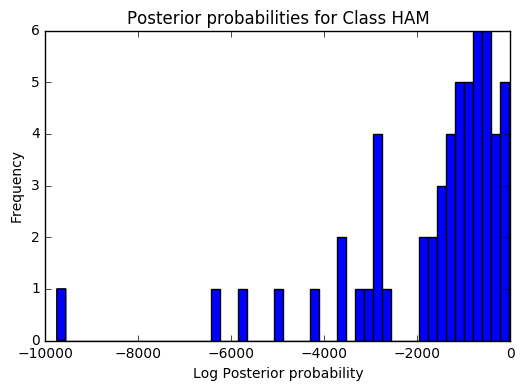

44 documents with log posterior probability = -infinity have been removed from above histogram



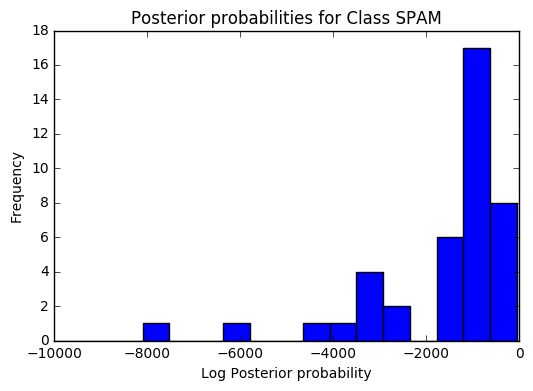

56 documents with log posterior probability = -infinity have been removed from above histogram


In [361]:
%matplotlib inline
import matplotlib.pyplot as plt

# START STUDENT CODE HW234PLOT

# Make sure to remove the results directiry
!hdfs dfs -rm -r HW2.3.4hist/classifications

# Run job - only mapper to emit posterior probabilites of documents
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes,NaiveBayes.txt \
  -mapper NaiveBayes/mapper_classify_postprob.py \
  -input /user/nbclassify/enronemail_1h.txt \
  -output HW2.3.4hist/classifications  \

# Log Posterior probabilities into a file
!hdfs dfs -cat HW2.3.4hist/classifications/part-0000* > NaiveBayes/postprob.txt

# Read probabilities file and plot histogram
post_logprob_ham = []
post_logprob_spam = []
with open("NaiveBayes/postprob.txt") as prob_text:
    for line in prob_text.readlines():
        line = line.strip()
        docID, true_class, predicted, logprob_ham, logprob_spam = line.split("\t")
        logprob_ham = float(logprob_ham)
        logprob_spam = float(logprob_spam)
        post_logprob_ham.append(logprob_ham)
        post_logprob_spam.append(logprob_spam)

length1 = len(post_logprob_ham)
length2 = len(post_logprob_spam)
        
# Note: cannot plot "-inf" on histogram, so document with probabilites = "-inf" are removed
# from the plot
post_logprob_ham = [i for i in post_logprob_ham if i != float("-inf")]
post_logprob_spam = [i for i in post_logprob_spam if i != float("-inf")]

length1_inf = length1 - len(post_logprob_ham)
length2_inf = length2 - len(post_logprob_spam)

plt.hist(post_logprob_ham, bins=50)
plt.xlim([-10000,0])
plt.title("Posterior probabilities for Class HAM")
plt.xlabel("Log Posterior probability")
plt.ylabel("Frequency")
plt.show()
print length1_inf, "documents with log posterior probability = -infinity have been removed from above histogram"
print""

plt.hist(post_logprob_spam, bins=50)
plt.title("Posterior probabilities for Class SPAM")
plt.xlim([-10000,0])
plt.xlabel("Log Posterior probability")
plt.ylabel("Frequency")
plt.show()
print length2_inf, "documents with log posterior probability = -infinity have been removed from above histogram"


# END STUDENT CODE HW234PLOT

Summary of histograms: both histograms have a similar shape. From the histograms, most posterior probabilities from the Naive Bayes are a very small number (e.g. log probability = -1000 means the posterior probability is exp(-1000) which is close to zero) and without the log transformation, the float underflow can quickly become an issue (the very small posterior probabilites will be rounded to zero) and affect the classification accuracy of the model.

## 3.  HW2.4 Use Laplace plus-one smoothing  <a name="2.4"></a>
[Back to Table of Contents](#TOC)

Repeat HW2.3 with the following modification: use Laplace plus-one smoothing.  **Please replace code tags like  HW231HADOOP_CLASSIFY with HW241HADOOP_CLASSIFY through out for your submission.**
In addition, compare the misclassifcation error rates for 2.3 versus 2.4 and explain the differences.

### cut and paste MULTIPLE CELLS
**NOTE** for **Jupyter lovers**, you can now cut and paste MULTIPLE CELLS: press the ESC key and the press the SHIFT key in conjunction with UP or DOWN arrow key to select the cells you wish to copy (or delete). Then press ESC-C (to copy). Then select the cell where you wish to copy the cells (in the buffer) and press ESC-V to insert the cells in the buffer below the selected cell.



### modelling phase

#### Changes in modelling phase from 2.3 no smoothing:
- mapper_model to mapper_model_smooth.py : no change  
- reducer_model to reducer_model_smooth.py : change to integrate smoothing  
- model file NaiveBayes.txt to NaiveBayesSmoothing.txt : change to integrate smoothing

In [251]:
%%writefile NaiveBayes/mapper_model_smooth.py
#!/usr/bin/python
import sys, re, string

# Init mapper phase 
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    # docID, docClass,title,body = line.split("\t",3)
    # Some issues with split "\t" from empty fields instead of NA so changed above codes
    # to merge title and body in the same variable since both title and body are used
    # 
    docID, docClass,title_body = line.split("\t",2)
    
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower())  #replace each punctuation with a space
    #emailStr = regex.sub(' ', title + " " +body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

# START STUDENT CODE HW241MAPPER_MODEL

# define regex for punctuation removal

# increase counters
# write the results to STDOUT (standard output);
# what we output here will be the input for the
# Reduce step, i.e. the input for reducer.py
#
# tab-delimited; the trivial word count is 1

    for word in words:
        print '%s\t%s\t%s\t%s' % (word, 1, docID, docClass)  # word as key to sort outputs by words
        
# END STUDENT CODE HW241MAPPER_MODEL            

Writing NaiveBayes/mapper_model_smooth.py


In [262]:
%%writefile NaiveBayes/reducer_model_smooth.py
#!/usr/bin/python
from operator import itemgetter
import sys, operator
# import numpy as np  # commented since not used

# START STUDENT CODE HW241REDUCER_MODEL

current_word = None
smooth_factor = 1 # with smoothing
current_count = [smooth_factor, smooth_factor] #with smoothing
msgIDs = {}
word = None
wordcount = {}


# input comes from STDIN
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # parse the input we got from mapper.py
    word, count, docID, docClass = line.split("\t",3)
    # convert count and spam flag (currently a string) to int
    docClass = int(docClass)
    count = int(count)

    # handle msgID - store all IDs as we don't have too much
    # not the best way to get prior, a two-level MapReduce jobs (ID - word) would be optimal
    if docID not in msgIDs:
        msgIDs[docID] = [1-docClass,docClass]
    
    if current_word == word:
        current_count[0] += count * (1-docClass)
        current_count[1] += count * docClass
    else:
        if current_word:
            wordcount[current_word] = current_count
        current_count = [count * (1-docClass) + smooth_factor, count * docClass + smooth_factor]
        current_word = word
        
# Output the last word if needed
if current_word == word:
    wordcount[current_word] = current_count
        

# calculate NB parameters, and write the dictionary to a file for the classification job
# prior probabilities
ham_docs = sum([i[0] for i in msgIDs.values()])  # total number of HAM docs ham
spam_docs = sum([i[1] for i in msgIDs.values()])  # total number of SPAM docs
total_docs = ham_docs + spam_docs
pr_ham_docs = float(ham_docs) / float(total_docs)
pr_spam_docs = float(spam_docs) / float(total_docs)
print '%s\t%s,%s,%s,%s' % ('ClassPriors', ham_docs, spam_docs, pr_ham_docs, pr_spam_docs)
                           
# conditional probability
total_unique_words = len(wordcount)
ham_words = sum([i[0] for i in wordcount.values()]) + total_unique_words * smooth_factor
spam_words = sum([i[1] for i in wordcount.values()]) + total_unique_words * smooth_factor

for modelword, counts in wordcount.items():
    pr_cond_ham = float(counts[0])/float(ham_words)
    pr_cond_spam = float(counts[1])/float(spam_words)
    print '%s\t%s,%s,%s,%s' % (modelword, counts[0], counts[1], pr_cond_ham, pr_cond_spam)
    
# END STUDENT CODE HW241REDUCER_MODEL    

Overwriting NaiveBayes/reducer_model_smooth.py


In [263]:
!cat nbtest.txt | python NaiveBayes/mapper_model_smooth.py | sort -k1,1 | python NaiveBayes/reducer_model_smooth.py

ClassPriors	1,1,0.5,0.5
a	2,1,0.0740740740741,0.0416666666667
thank	2,2,0.0740740740741,0.0833333333333
farm	2,1,0.0740740740741,0.0416666666667
rankings	1,2,0.037037037037,0.0833333333333
tree	2,1,0.0740740740741,0.0416666666667
re	1,2,0.037037037037,0.0833333333333
pictures	2,1,0.0740740740741,0.0416666666667
not	2,1,0.0740740740741,0.0416666666667
you	1,2,0.037037037037,0.0833333333333
christmas	2,1,0.0740740740741,0.0416666666667


In [253]:
!chmod a+x NaiveBayes/mapper_model_smooth.py
!chmod a+x NaiveBayes/reducer_model_smooth.py

### classification phase


#### Changes in classification phase from 2.3 no smoothing:
- mapper_classify to mapper_classify_smooth.py :  
    1. change model file from NaiveBayes.txt to NaiveBayesSmooth.txt
    2. posterior prob calculation to log formula  
- reducer_model to reducer_model_smooth.py : no change  

In [290]:
%%writefile NaiveBayes/mapper_classify_smooth.py
#!/usr/bin/python
from NaiveBayesModel import NaiveBayesModel
import sys, re, string, subprocess
import sys, operator, math 
#import numpy as np

# Init mapper phase 

# read the MODEL into memory
# The model file resides the local disk (make sure to ship it home from HDFS).
# In the Hadoop command linke be sure to add the follow the -files commmand line option
NBModel = NaiveBayesModel("NaiveBayes/NaiveBayesSmooth.txt") 
# define regex for punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))

# inner loop mapper phase: process each record
# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    docID, docClass,title_body = line.split("\t",2)
    # use subject and body 
    # remove punctuations, only have white-space as delimiter
    emailStr = regex.sub(' ', title_body.lower()) #replace each punctuation with a space
    emailStr = re.sub( '\s+', ' ', emailStr )            # replace multiple spaces with a space
    # split the line into words
    words = emailStr.split()

# START STUDENT CODE HW241MAPPER_CLASSIFY
    # Option 1: using log(probability)
    # Note: log to avoid overflow is not used in this exercise given that some probabilities 
    #       were = 0 (zero count of some words given small training size and no smoothing)
    #       and log(0) will result in an error
    PrHamGivenDoc_log, PrSpamGivenDoc_log = NBModel.classifyInLogs(words)
    #PrHamGivenDoc, PrSpamGivenDoc = exp(PrHamGivenDoc_log), exp(PrSpamGivenDoc_log)
    predicted_class = 0
    if PrHamGivenDoc_log >= PrSpamGivenDoc_log:
        predicted_class = 0
    else:
        predicted_class = 1
    
    # Option 2: not using log if no smoothing
    #PrHamGivenDoc, PrSpamGivenDoc = NBModel.classify(words)
    #predicted_class = 0
    #if PrHamGivenDoc >= PrSpamGivenDoc:
    #    predicted_class = 0
    #else:
    #    predicted_class = 1
        
    print '%s\t%s\t%s' %(docID, docClass, predicted_class)


# END STUDENT CODE HW241MAPPER_CLASSIFY

Overwriting NaiveBayes/mapper_classify_smooth.py


In [268]:
%%writefile NaiveBayes/reducer_classify_smooth.py
#!/usr/bin/python
from operator import itemgetter
import sys, operator, math
#import numpy as np

numberOfRecords = 0
NumberOfMisclassifications=0
classificationAccurary = 0

# START STUDENT CODE HW241REDUCER_CLASSIFY

# input comes from STDIN
for line in sys.stdin:
    line = line.strip()
    docID, true_class, predicted_class = line.split('\t')
    true_class = int(true_class)
    predicted_class = int(predicted_class)
    
    numberOfRecords += 1
    
    if true_class <> predicted_class:
        NumberOfMisclassifications += 1
        
classificationAccurary = (float(numberOfRecords)-float(NumberOfMisclassifications)) / float(numberOfRecords)

# END STUDENT CODE HW241REDUCER_CLASSIFY

print 'Multinomial Naive Bayes Classifier Results are %d,%d,%f' % (numberOfRecords, NumberOfMisclassifications, classificationAccurary) 

Overwriting NaiveBayes/reducer_classify_smooth.py


In [285]:
!chmod a+x NaiveBayes/mapper_classify_smooth.py
!chmod a+x NaiveBayes/reducer_classify_smooth.py
!chmod a+x NaiveBayes/NaiveBayesModel.py

### Run Map Reduce Job to learn a multinomical Naive Model from data

In [287]:
# START STUDENT CODE HW241HADOOP_MODEL
# STEP 1: make input directory on HDFS - already done in HW 2.3.1
#!hdfs dfs -mkdir -p /user/nbmodel 

# STEP2:  upload data to HDFS - already done in HW 2.3.1
#!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/nbmodel/enronemail_1h.txt

# STEP3: Make sure to remove the results directiry
!hdfs dfs -rm -r HW2.4.1/model

# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes/mapper_model_smooth.py,NaiveBayes/reducer_model_smooth.py \
  -mapper mapper_model_smooth.py \
  -reducer reducer_model_smooth.py \
  -input /user/nbmodel/enronemail_1h.txt \
  -output HW2.4.1/model  \
  -numReduceTasks 1


# END STUDENT CODE HW241HADOOP_MODEL

Deleted HW2.4.1/model
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob4021462574003087708.jar tmpDir=null
17/01/23 13:52:31 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 13:52:31 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 13:52:32 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 13:52:32 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 13:52:32 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0063
17/01/23 13:52:32 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0063
17/01/23 13:52:33 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0063/
17/01/23 13:52:33 INFO mapreduce.Job: Running job: job_1484782722670_0063
17/01/23 13:52:40 INFO mapreduce.Job: Job job_1484782722670_0063 running in uber mode : false
17/01/23 13:52:40 INFO mapreduce

In [289]:
# Naive Bayes model output with Smoothing
!hdfs dfs -cat HW2.4.1/model/part-0000* > NaiveBayes/NaiveBayesSmooth.txt
!head NaiveBayes/NaiveBayesSmooth.txt

ClassPriors	56,44,0.56,0.44
stock	4,3,0.000159159637116,0.000100999899
limited	5,11,0.000198949546395,0.000370332963
entergyr	2,1,7.9579818558e-05,3.3666633e-05
mcsherry	2,1,7.9579818558e-05,3.3666633e-05
additionally	2,2,7.9579818558e-05,6.73332660001e-05
doubts	1,2,3.9789909279e-05,6.73332660001e-05
dynamic	3,1,0.000119369727837,3.3666633e-05
externally	1,3,3.9789909279e-05,0.000100999899
yellow	1,2,3.9789909279e-05,6.73332660001e-05


### Run Map Reduce Job to classify data

In [291]:
# START STUDENT CODE HW241HADOOP_CLASSIFY

# STEP 1: make input directory on HDFS - already done in HW 2.3.1
#!hdfs dfs -mkdir -p /user/nbclassify

# STEP2:  upload data to HDFS - already done in HW 2.3.1
#!hdfs dfs -put NaiveBayes/enronemail_1h.txt /user/nbclassify/enronemail_1h.txt

# STEP3: Make sure to remove the results directory
!hdfs dfs -rm -r HW2.4.1/classifications

# STEP4: Run job
!hadoop jar /usr/lib/hadoop-0.20-mapreduce/contrib/streaming/hadoop-streaming-2.6.0-mr1-cdh5.8.0.jar \
  -files NaiveBayes \
  -mapper NaiveBayes/mapper_classify_smooth.py \
  -reducer NaiveBayes/reducer_classify_smooth.py \
  -input /user/nbclassify/enronemail_1h.txt \
  -output HW2.4.1/classifications  \
  -numReduceTasks 1

# END STUDENT CODE HW241HADOOP_CLASSIFY

Deleted HW2.4.1/classifications
packageJobJar: [] [/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.8.0.jar] /tmp/streamjob4952407999837703009.jar tmpDir=null
17/01/23 13:57:30 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 13:57:30 INFO client.RMProxy: Connecting to ResourceManager at /0.0.0.0:8032
17/01/23 13:57:31 INFO mapred.FileInputFormat: Total input paths to process : 1
17/01/23 13:57:31 INFO mapreduce.JobSubmitter: number of splits:2
17/01/23 13:57:32 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1484782722670_0064
17/01/23 13:57:32 INFO impl.YarnClientImpl: Submitted application application_1484782722670_0064
17/01/23 13:57:32 INFO mapreduce.Job: The url to track the job: http://quickstart.cloudera:8088/proxy/application_1484782722670_0064/
17/01/23 13:57:32 INFO mapreduce.Job: Running job: job_1484782722670_0064
17/01/23 13:57:38 INFO mapreduce.Job: Job job_1484782722670_0064 running in uber mode : false
17/01/23 13:57:38 INFO

### Display the  accuracy measure

In [292]:
# START STUDENT CODE HW241HADOOP_CLASSIFY_RESULTS
# (you may or may not need to add anything else in this block depending on your implementation)

!hdfs dfs -cat HW2.4.1/classifications/part-00000 > NaiveBayes/classification_result_smooth.txt
!cat NaiveBayes/classification_result_smooth.txt

# END STUDENT CODE HW241HADOOP_CLASSIFY_RESULTS

Multinomial Naive Bayes Classifier Results are 100,0,1.000000	


Difference between smoothing and non smoothing

In the case without any smoothing, when a word wi is not in the training data in both classes (e.g. a word that was in the training data in a document labelled "ham" but was not in any document labelled "spam") then the conditional probability of {Word=wi|Class=class_i} will result in 0. Consequently, any posterior probability of P(Class=class_i|document with words including wi) will always be 0. Thus, smoothing will help to handle cases like this by avoiding such zero conditional probabilities for not encountered word from test set in the training set. In this homework, such case will not exist since the training dataset is used as the test data set.

The difference between the accuracies from smoothing(100%) and no smoothing(66%) is from the float underflow problem in posterior probabilities in the non smoothing model. In the non smoothing model, some words would result in a zero conditional probability if that word is not found in both classes. Thus the log transformation of the posterior probabilities to handle extremely small numbers could not be used in the non smoothing case and using directly the posterior probabilities resulted in losing some decimals and wrongly rounded to zero. This resulted in a lower accuracy for model with no smoothing.
